<h1 style='text-align: center;'>House Price Prediction </h1>

### Introduction: 
<p style='text-align: justify;'>This notebook contains the code and analysis for a assignment related to building a regression model for a US-based housing company, Surprise Housing, entering the Australian market, using data analytics to buy houses below market value and sell them at a profit. They've gathered Australian housing data in a CSV file and need a regression model with regularization to predict property values, aiding investment decisions. The company aims to identify significant variables influencing house prices, assess their impact, and determine optimal lambda values for ridge and lasso regression. In this notebook contains two assignment parts:</p>

#### Part-I:
<p style='text-align: justify;'>In this section, we will focus on building a regression model using regularization to predict house prices. The company aims to understand which variables are significant in predicting price of house and how well these variables describe the house prices. Futher, we will determine the optimal values of lambda for ridge and lasso regression.</p>

#### Part-II:
<p style='text-align: justify;'>This section includes specific questions related to the analysis made in Part-I. Each question is answered concisely.</p>

### Objectives:  
<div align="justify"> The main objective is to create a model that predicts house prices based on the given independent variables. The management will use this model to analyze the variations in prices associated with these variables. This insight will enable them to adjust the firm's strategy, focusing on areas that promise higher returns. Further, the model serves as a valuable tool for the management to comprehend the pricing dynamics in a new market.</div>

### Analysis Approach:  
<div align="justify">To tackle this problem effectively, I have established a structured data analysis approach.<br>

- Data Preprocessing:<br> It includes understanding, cleaning, and preparing the data for analysis, handling missing values, encoding categorical variables, dropping unnecessary columns, and standardizing data.

- Exploratory Data Analysis (EDA):<br>Exploring the dataset to identify patterns, trends, and relationships in the dataset. This will involve univariate, and bivariate analysis.

- Feature Importance:<br>Identifying key variables that strongly influence target variables using statistical methods such as Exploratory Data Analysis (EDA).

- Feature Engineering:<br> It Explore opportunities for creating new features that might enhance model performance and transform variables to better suit the regression models.

- Visualizations:<br>It includes creating visual representations of the data to facilitate a better understanding of the insights, trends, and relationships.

- Model Building:<br>It includes splitting the data into training and testing sets, performing scaling, partition the data into features (X) and the target variable (Y) and performing Ridge and Lasso regression analysis on the dataset.

- Model Evaluation:<br>It includes evaluating, validating, comparing the performance of Ridge and Lasso Regression models and examining the R-squared values. And analyzing which model provides better insights into house price prediction.</div>

### Assignment Part-I:

### Utilizing a python libraries for comprehensive analysis:

In [1]:
## Importing necessary Python libraries:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics

In [2]:
## To suppress warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## To set display limits:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Data Loading and Understanding:

In [4]:
# To load data from CSV file, from the "train.csv" file and displays the first few rows:
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
## To check the number of rows and columns:
print("Total Number of Rows = ", df.shape[0])
print("Total Number of Columns = ", df.shape[1])

Total Number of Rows =  1460
Total Number of Columns =  81


#### Observations: The dataset comprises 1460 rows and 81 columns.

In [6]:
# To check all columns in the DataFrame:
column_names = df.columns

# To display the column names:
print("Column names:")
for column in column_names:
    print(f"- {column}")

Column names:
- Id
- MSSubClass
- MSZoning
- LotFrontage
- LotArea
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- MasVnrArea
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinSF1
- BsmtFinType2
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- Heating
- HeatingQC
- CentralAir
- Electrical
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- KitchenQual
- TotRmsAbvGrd
- Functional
- Fireplaces
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageCars
- GarageArea
- GarageQual
- GarageCond
- PavedDrive
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- PoolQC
- Fence
- MiscFeature
- MiscVal
- MoSold
- YrSold
- SaleTy

In [7]:
# To display the DataFrame's descriptive statistics:
print("DataFrame Description:")
print(df.describe(include='all'))

DataFrame Description:
                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley Lot

In [8]:
# To display the information about the DataFrame:
print("DataFrame Information:")
print(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

In [9]:
# To check duplicate value:
print("The total number of Duplicate:" , df.duplicated().sum())

The total number of Duplicate: 0


### Description of Data:
Here is description of all the variables or features used in CSV file:-

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


Observations: These categorical columns have a category named NA, and which could potentially be inaccurately interpreted as a missing value by pandas. So it is necessary to substitute these with 'None' before identifying missing values:
- Alley :  NA =  No alley access
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
- FireplaceQu : NA = No Fireplace
- GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
- PoolQC : NA = No Pool
- Fence : NA = No Fence
- MiscFeature : NA = None

So we need to read the csv file again and set the parameter 'keep_default_na' to False

In [10]:
# To read the CSV file to prevent 'NA' being interpreted as 'NaN' by pandas:
df = pd.read_csv("train.csv", keep_default_na=False)

# To display the first few rows of the DataFrame for a quick overview:
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [11]:
# To replace all 'NA' of all above mentioned columns by 'None':
columns_to_replace_na_value = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[columns_to_replace_na_value] = df[columns_to_replace_na_value].replace("NA", "None")

# T display the first few rows of the DataFrame after replacing 'NA' with 'None':
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [12]:
# To display information about the DataFrame, including data types, non-null counts, and memory usage:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### Observations: After checking the data types and comparing them with the column descriptions, we can found that we need to change the types of MSSubClass, OverallQual, and OverallCond to object and the data type of LotFrontage and MasVnrArea to numeric.

In [13]:
# To convert specific columns to 'object' type:
columns_need_to_convert = ['MSSubClass', 'OverallQual', 'OverallCond']
df[columns_need_to_convert] = df[columns_need_to_convert].astype('object')

In [14]:
# To convert specific columns to 'numeric' type:
columns_need_to_convert_to_numeric = ['LotFrontage', 'MasVnrArea']

# Using pd.to_numeric with 'coerce' option to convert to numeric and handle errors:
df[columns_need_to_convert_to_numeric] = df[columns_need_to_convert_to_numeric].apply(pd.to_numeric, errors='coerce')

In [15]:
# To check the data types of columns:
changed_data_types = df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

# To display the result:
print(changed_data_types)

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object


In [16]:
# To displaying statistical summary of numerical columns:
df_description = df.describe()
print(df_description)

                Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       

#### Observations: The mean values of certain variables are significantly differ from their respective median values, indicating skewed distributions.

In [17]:
# To count the missing values in each column:
missing_values_count = df.isna().sum()

# To sort the missing values count in ascending order:
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# To display the sorted count of missing values:
print(missing_values_count_sorted)

LotFrontage      259
MasVnrArea         8
Id                 0
KitchenAbvGr       0
GarageYrBlt        0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
BedroomAbvGr       0
GarageCars         0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
GarageFinish       0
GarageArea         0
Electrical         0
PoolQC             0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolArea           0
GarageQual         0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
1stFlrSF           0
HeatingQC          0
CentralAir         0
LandSlope          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType     

#### Observations: Only two columns, namely LotFrontage and MasVnrArea, have missing values. We will address these missing values through a treatment process.

### Exploration of Data:

#### Univariate Analysis:

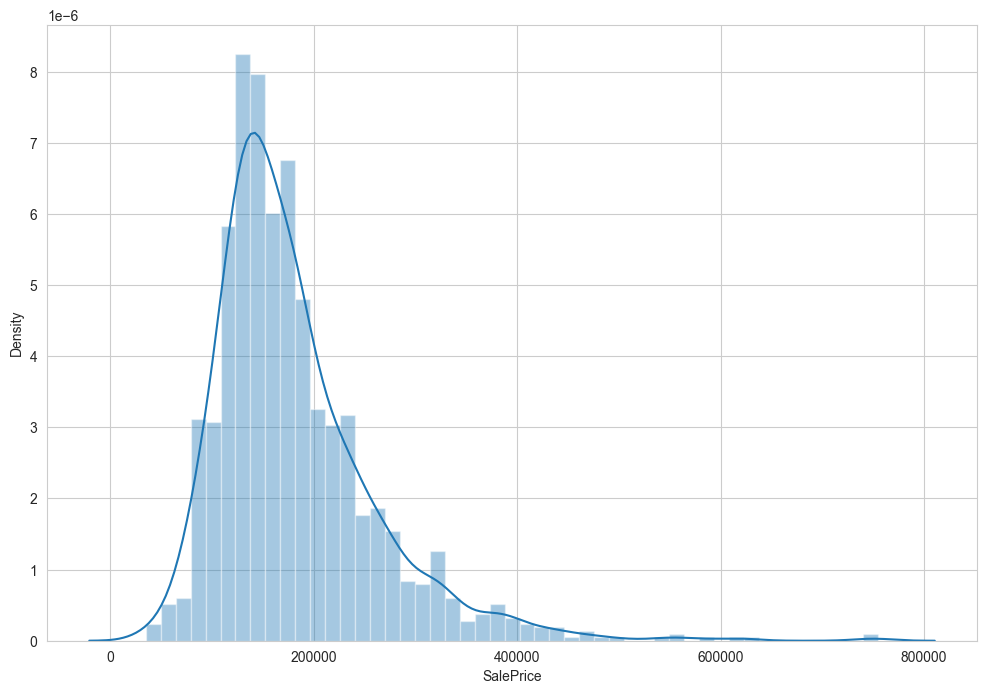

In [18]:
## Let's begin the analysis by examining the target variable 'SalePrice.':
# To set the figure size:
plt.figure(figsize=[12, 8])

# To set the seaborn style to 'whitegrid':
sns.set_style('whitegrid')

# To plot the distribution of the target variable 'SalePrice':
sns.distplot(df['SalePrice'])

# To display the plot:
plt.show()

#### Observations: The target variable exhibits a right-skewed distribution.

In [19]:
# To check the skewness of target variable:
df['SalePrice'].skew()

1.8828757597682129

#### Observations: The skewness is greater than 1, so the target variable is highly skewed.

In [20]:
# To calculate the skewness of the target variable 'SalePrice':
skewness_of_sale_price = df['SalePrice'].skew()

# To display the skewness value:
print("skewness of sale price:", skewness_of_sale_price)

skewness of sale price: 1.8828757597682129


#### Observations: It shows the right-skewed and highly peaked distribution with a kurtosis greater than 1, we will apply a log transformation to the target variable.

In [21]:
# To apply a log transformation to the target variable 'SalePrice':
df['SalePrice'] = np.log(df['SalePrice'])

In [22]:
# To check the skewness of the target variable 'SalePrice' after log transformation:
skewness_after_log_transformation = df['SalePrice'].skew()

# To display the skewness value:
print("skewness after log transformation is: ",skewness_after_log_transformation)

skewness after log transformation is:  0.12133506220520406


In [23]:
# To check the kurtosis of the target variable 'SalePrice' after log transformation:
kurtosis_after_log_transformation = df['SalePrice'].kurt()

# To display the kurtosis value:
print("kurtosis after log transformation is :",kurtosis_after_log_transformation)

kurtosis after log transformation is : 0.8095319958036296


#### Observations: After applying the log transformation to the target variable, both skewness and kurtosis are now less than 1.

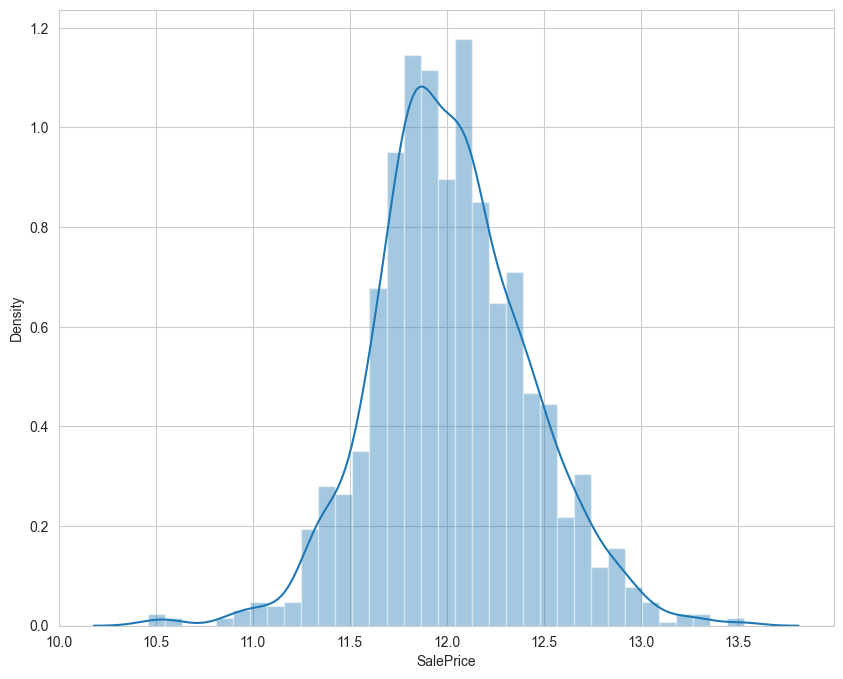

In [24]:
# To plot the spread of the transformed target variable 'SalePrice':
plt.figure(figsize=[10, 8])
sns.set_style('whitegrid')
sns.distplot(df['SalePrice'])

# To display the plot:
plt.show()

#### Observations: The log transformation has made the distribution of the target variable more symmetric, reducing both skewness and kurtosis. It has moved closer to a normal distribution.

In [25]:
# To separate the dataframe df into numerical and categorical columns for EDA:
# To extract numerical columns for analysis:
df_num = df.select_dtypes(include=['int64', 'float64'])

# To display the first few rows of the numerical columns dataframe:
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [26]:
# To extract categorical columns for analysis:
df_cat = df.select_dtypes(include='object')

# To display the first few rows of the categorical columns DataFrame:
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

### Exploratory Data Analysis (EDA) on numerical columns:

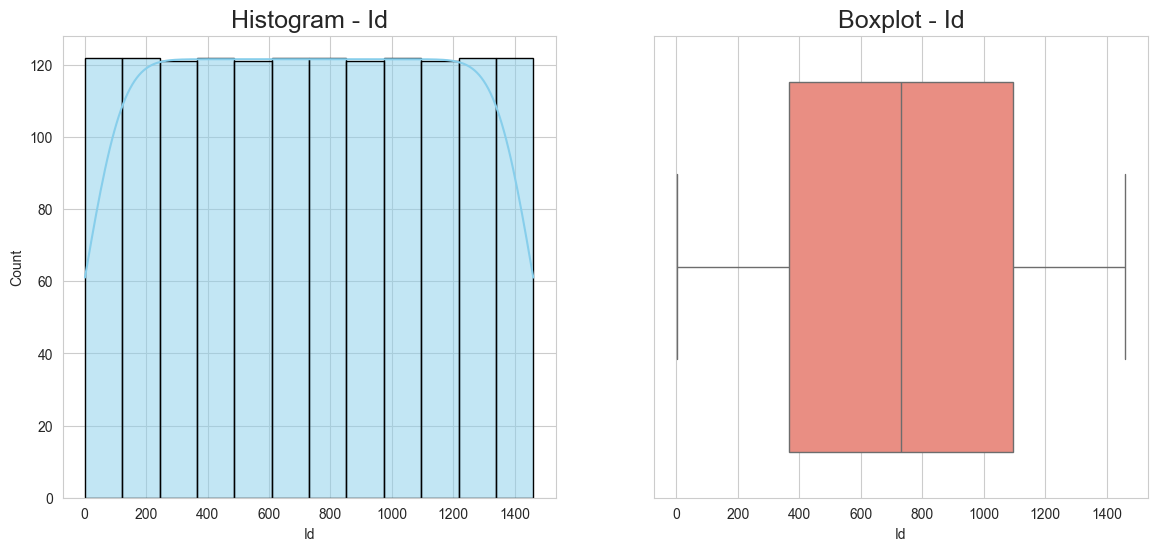

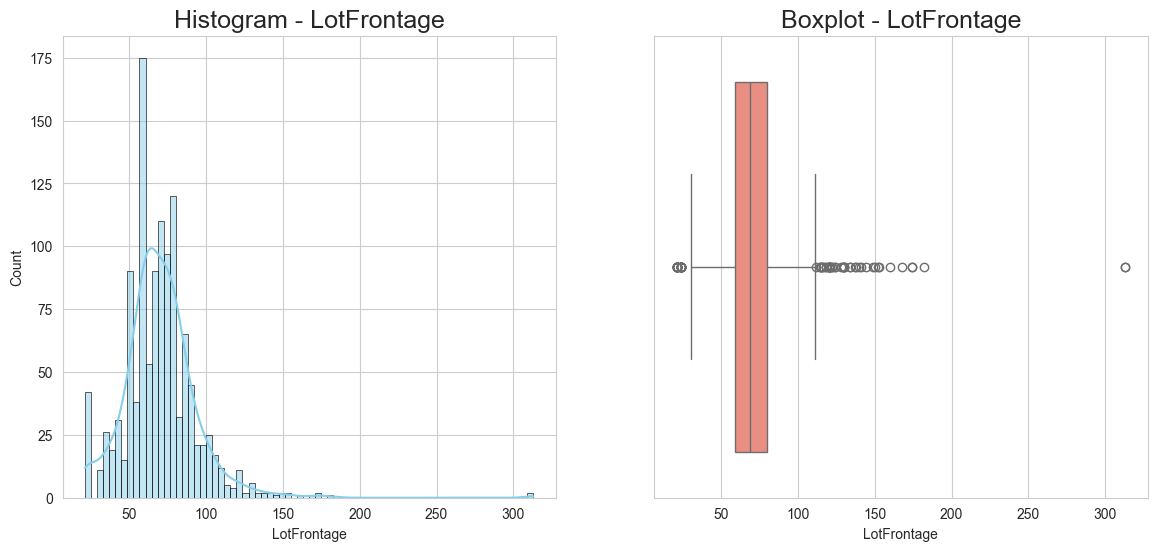

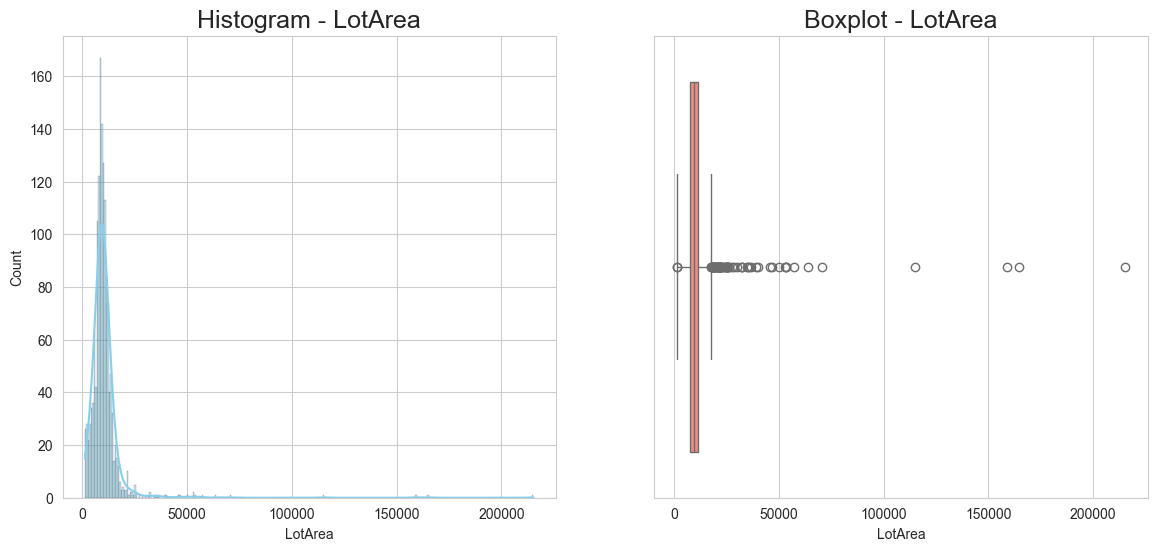

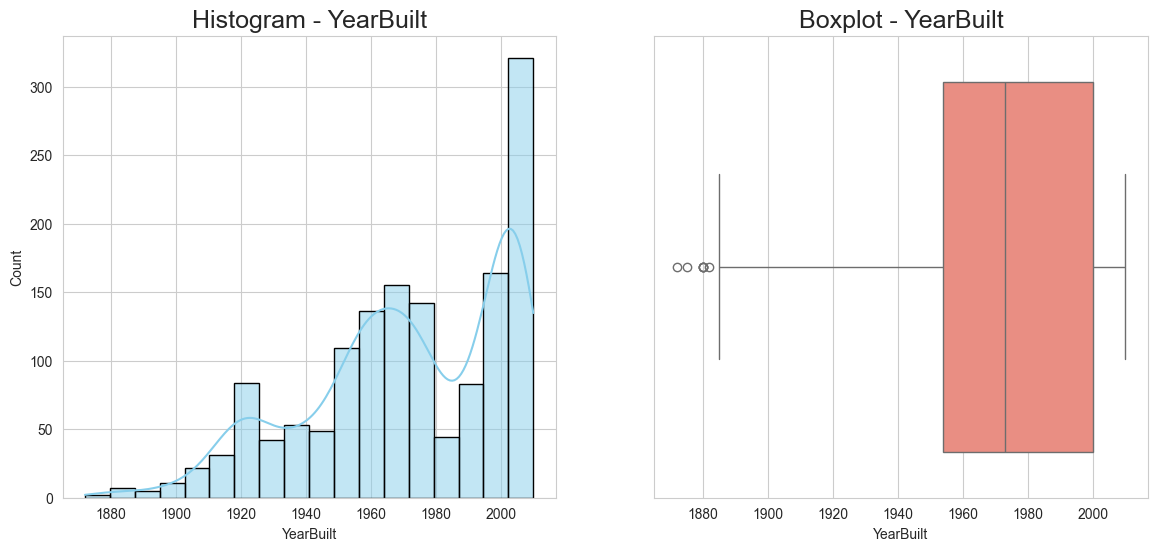

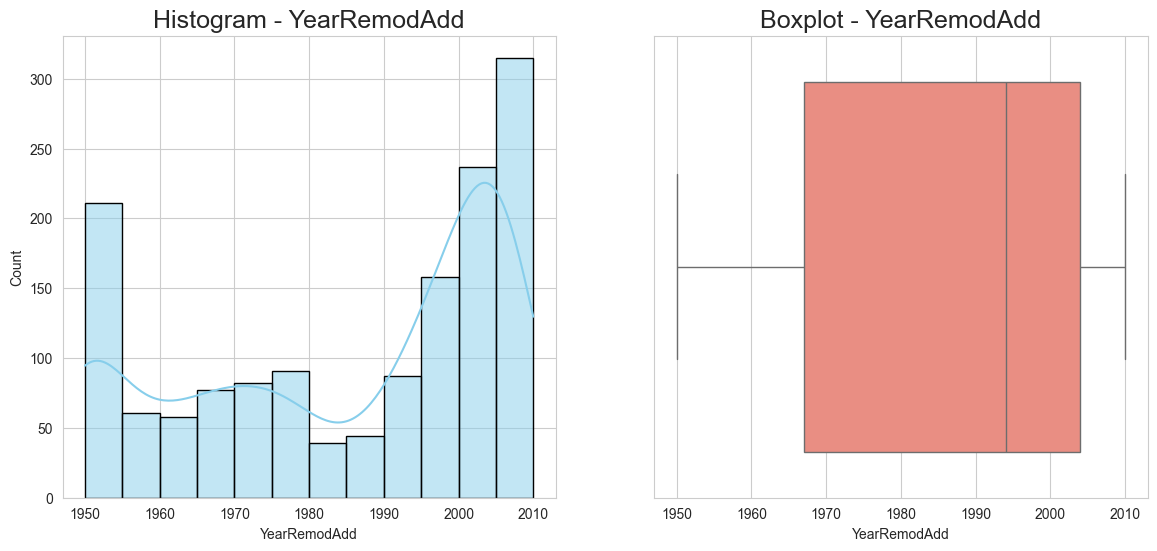

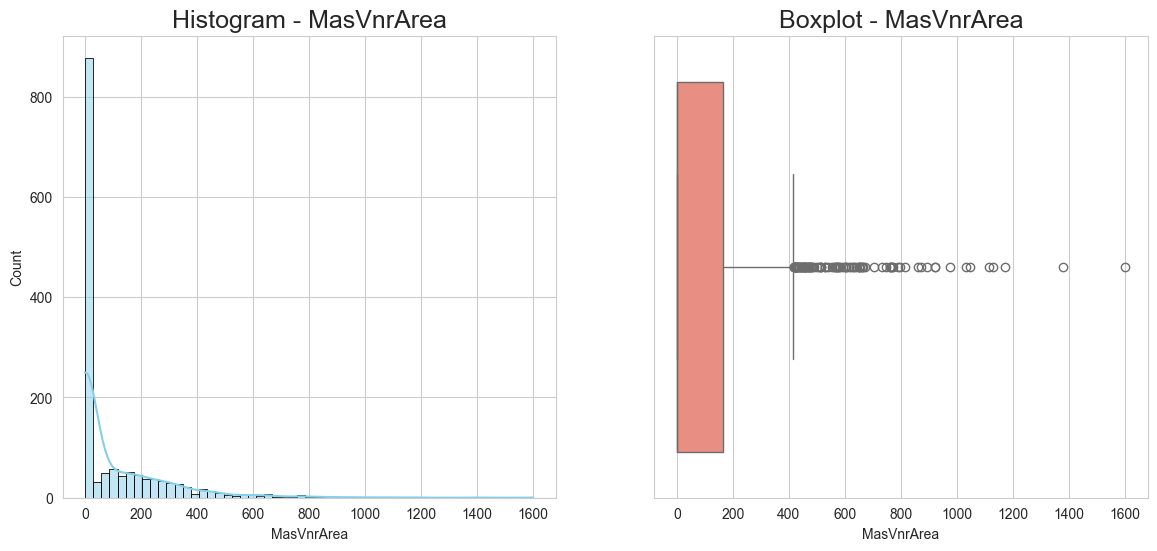

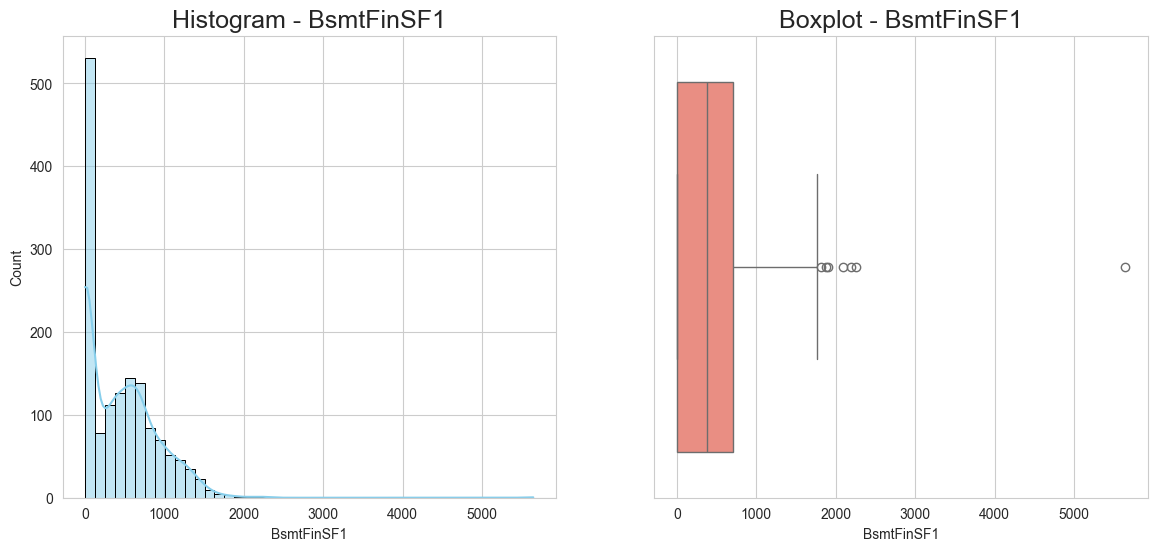

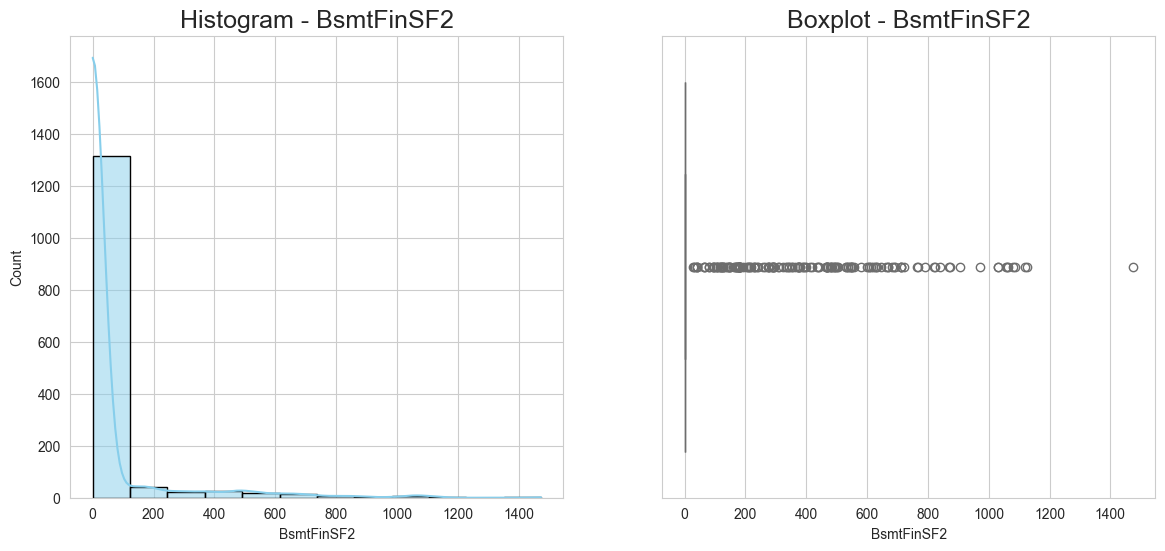

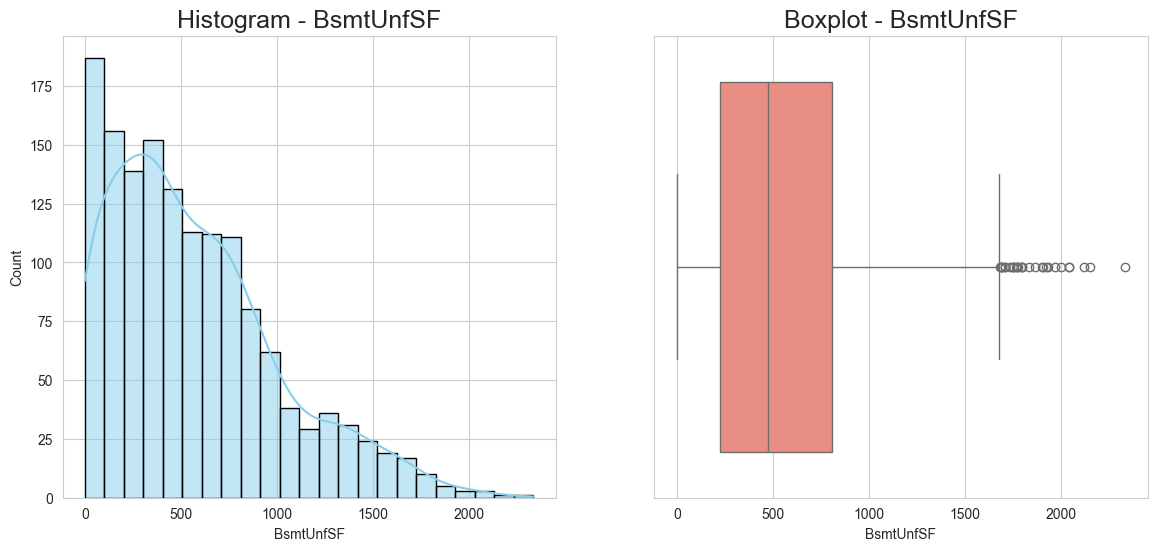

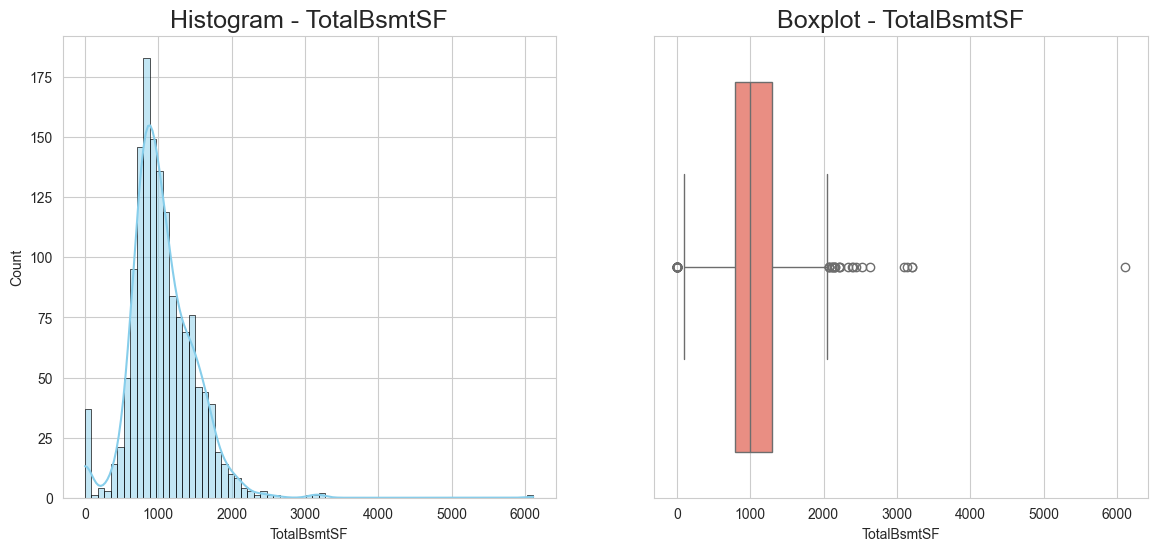

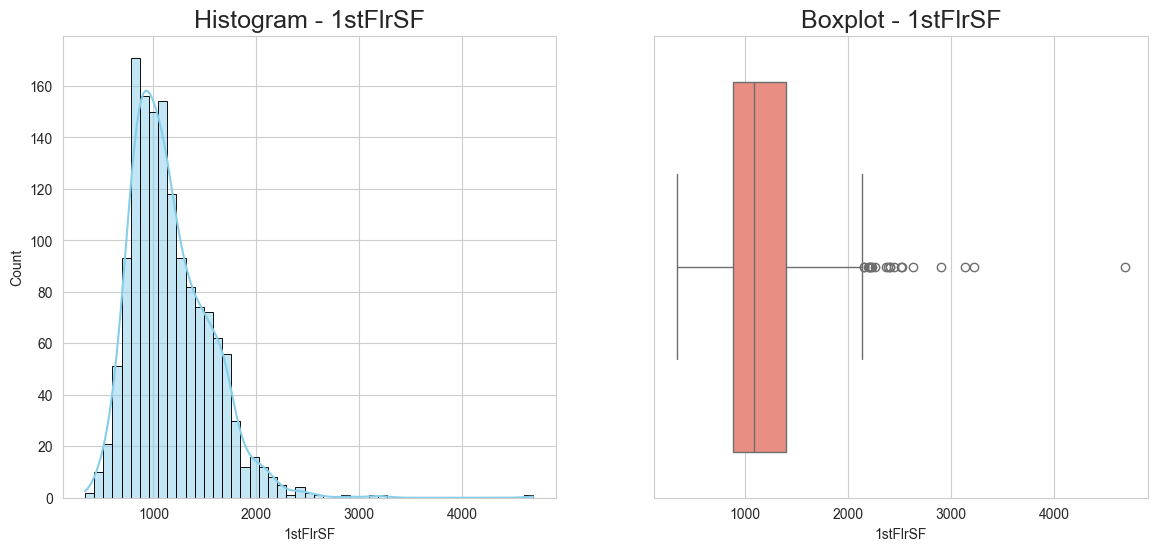

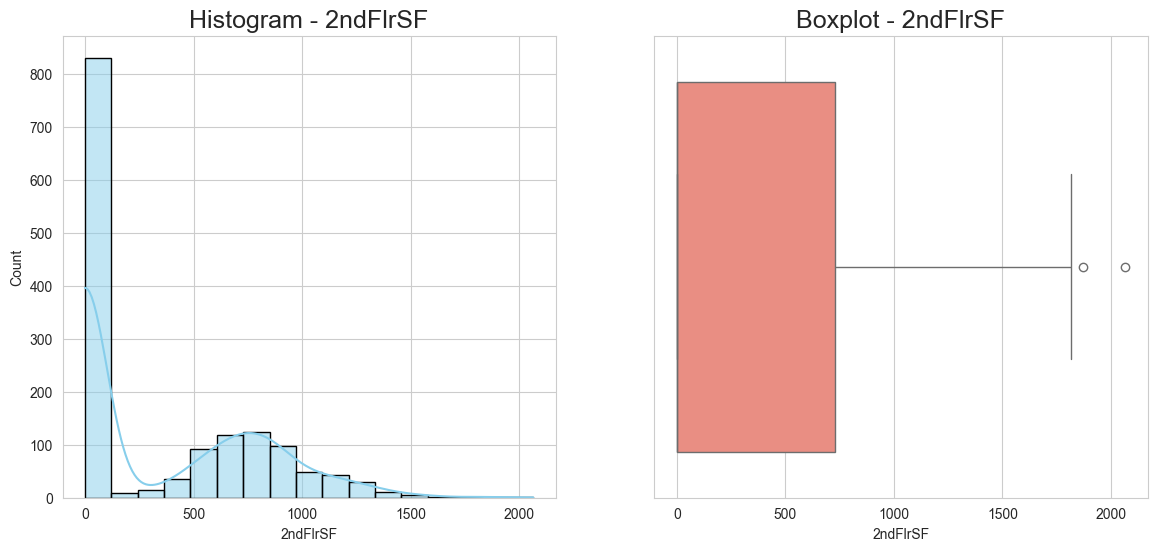

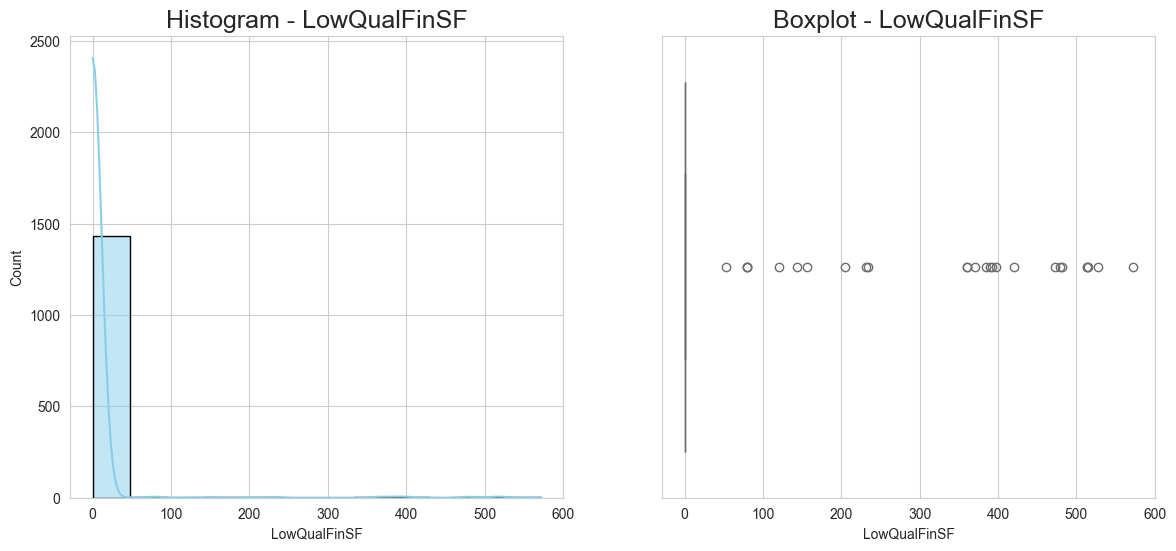

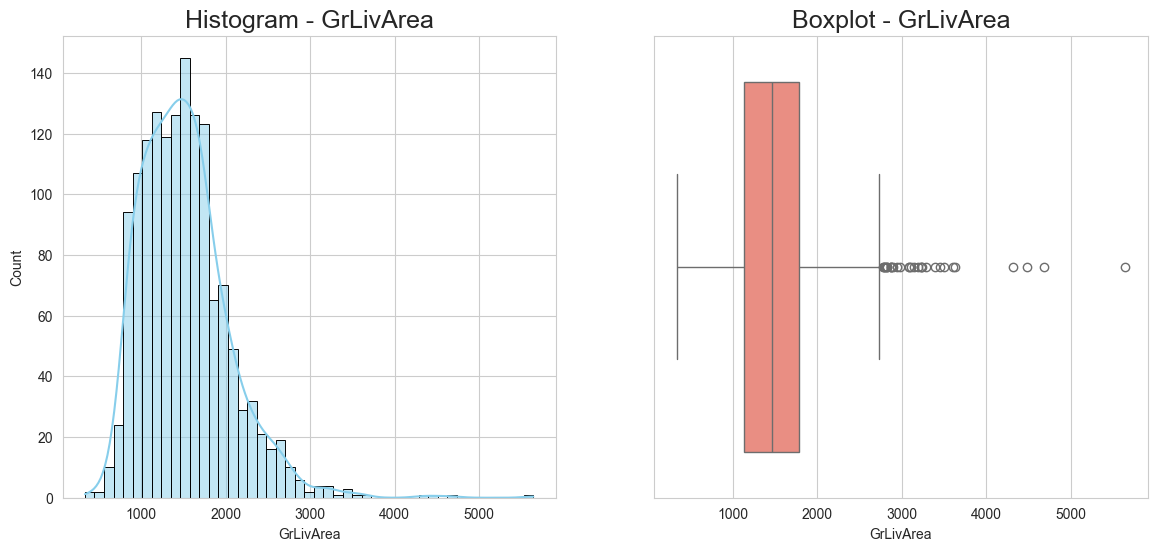

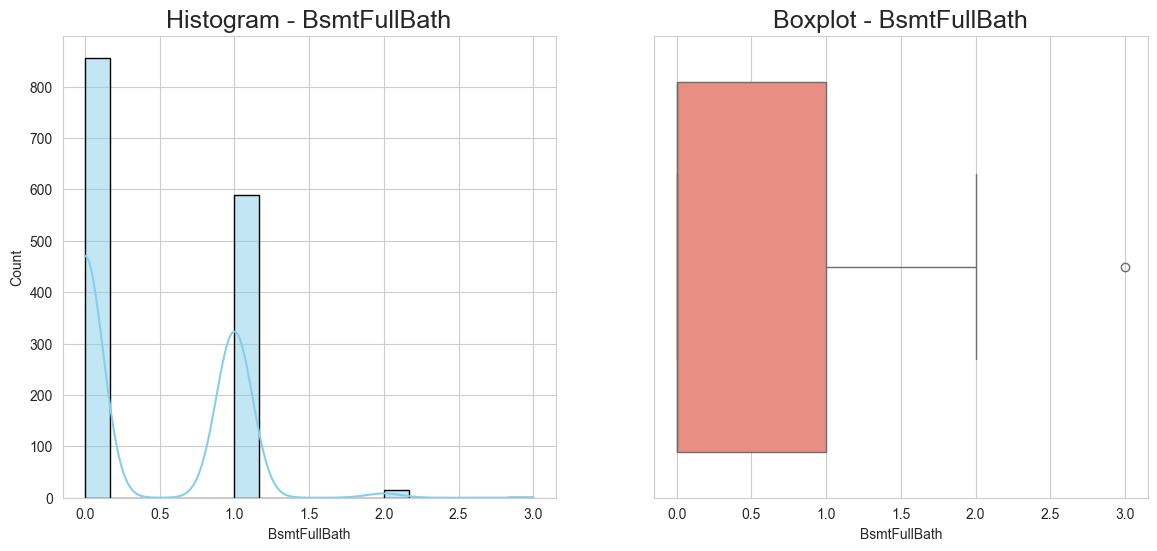

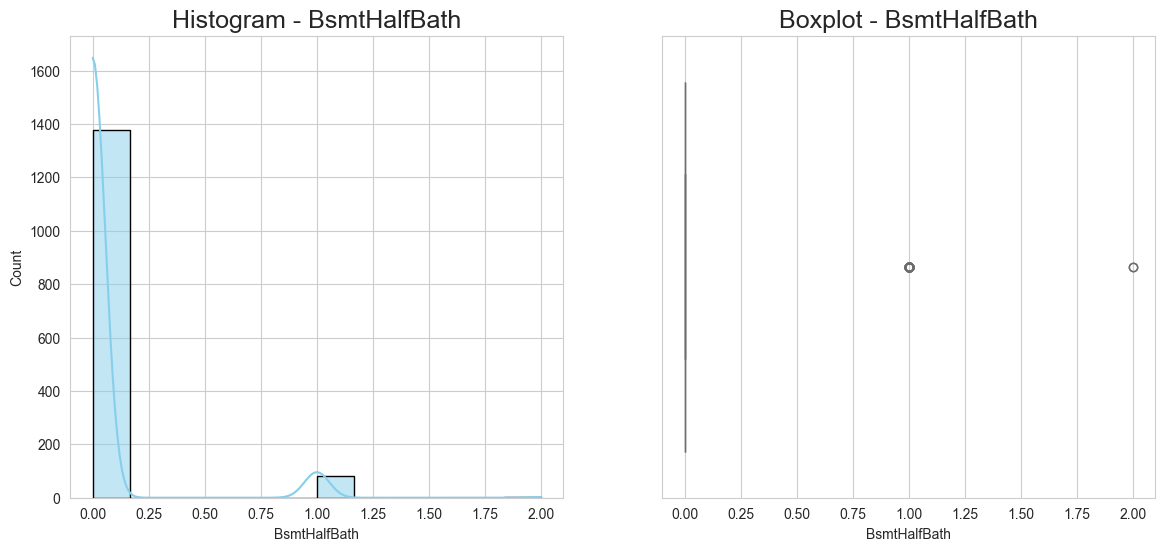

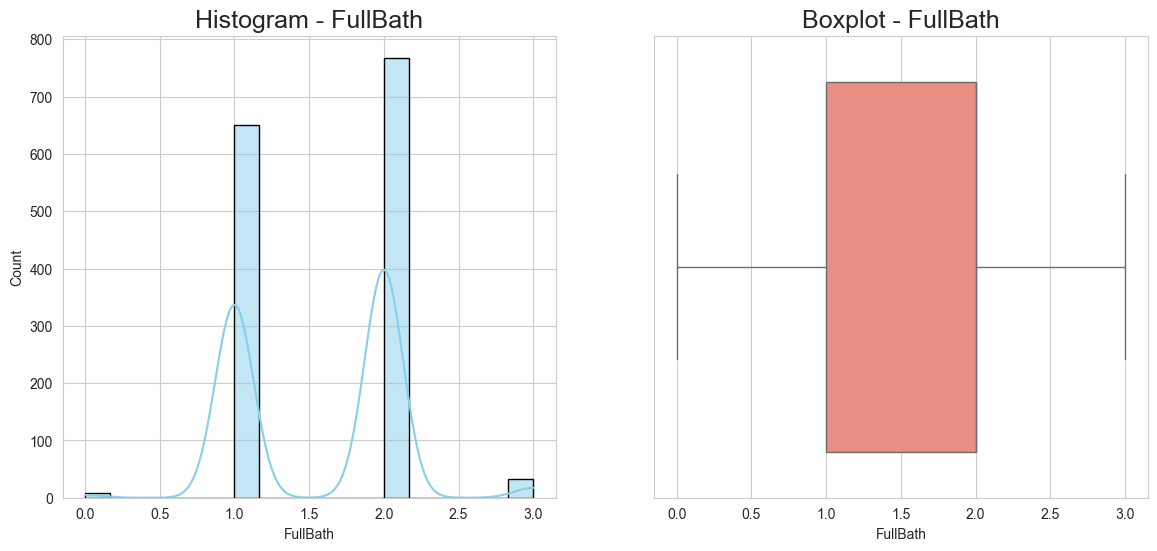

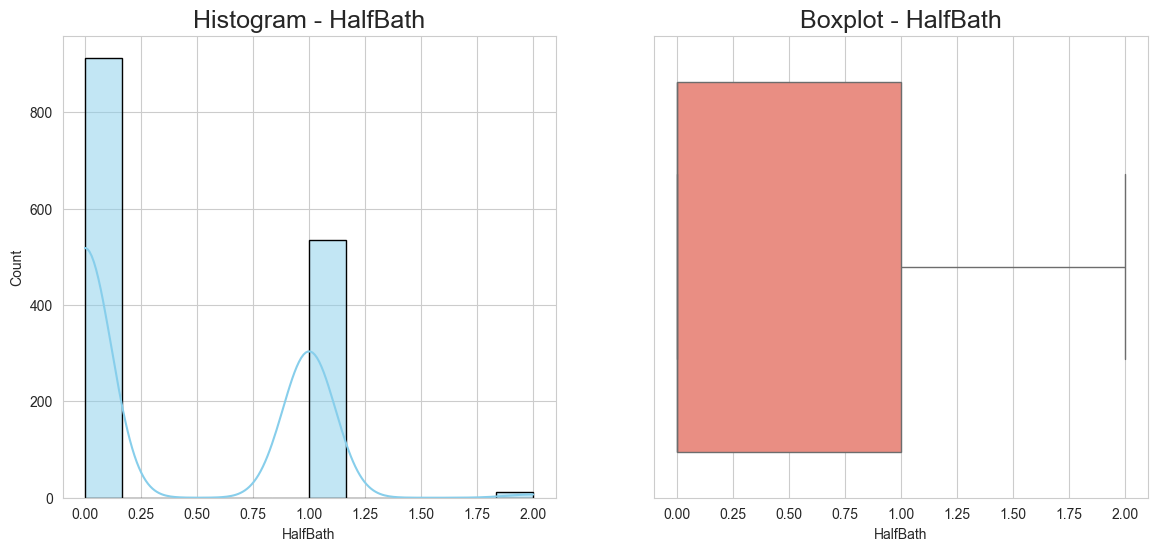

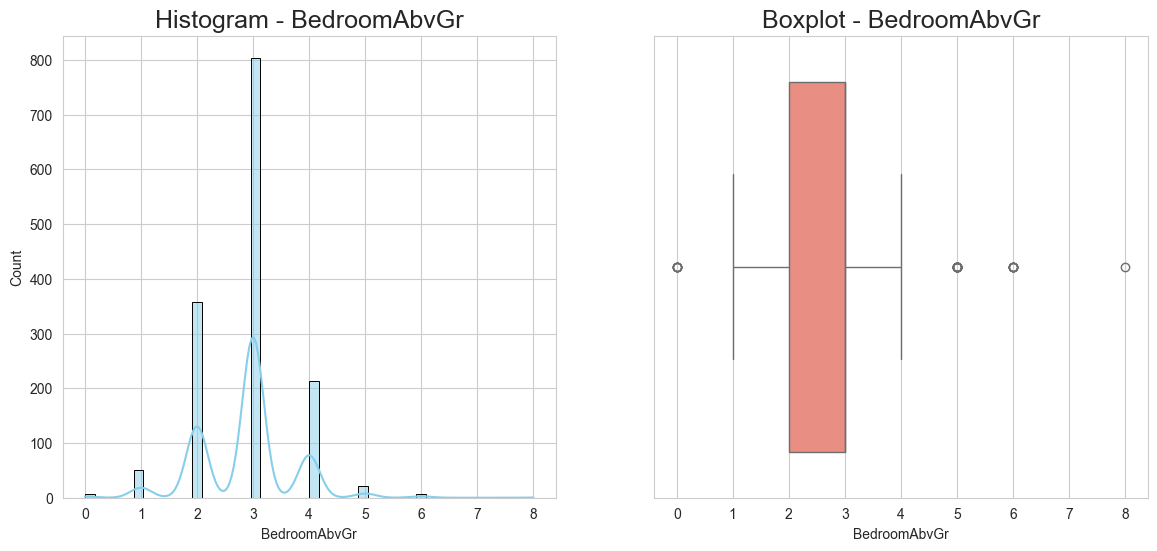

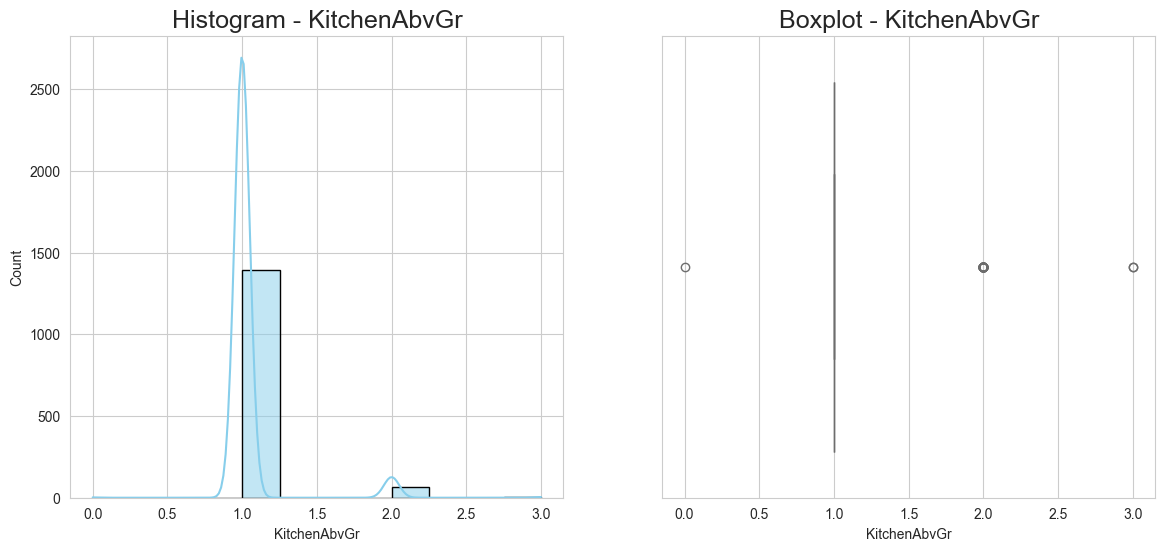

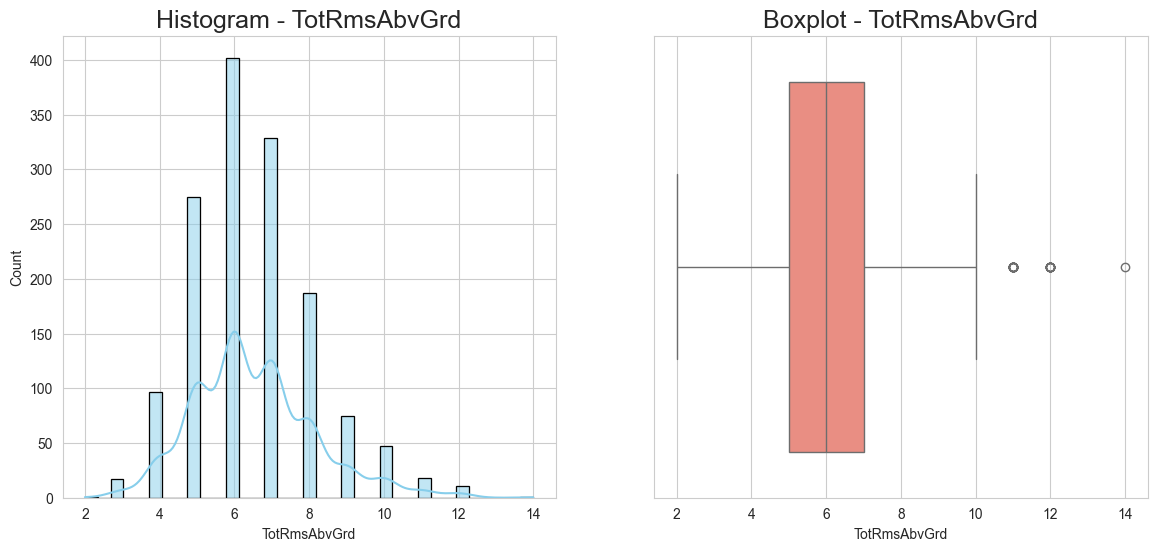

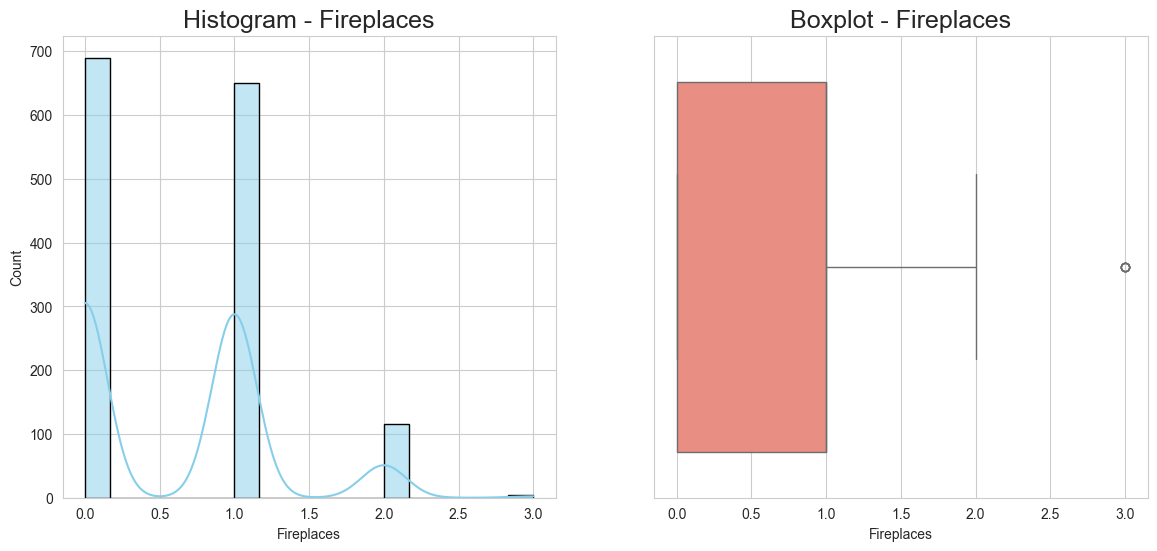

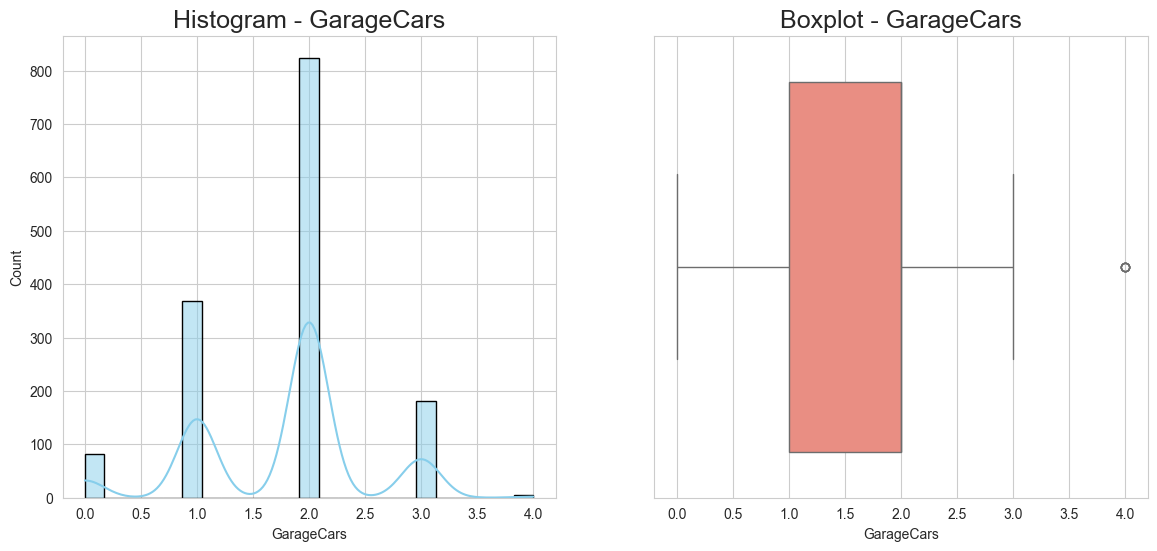

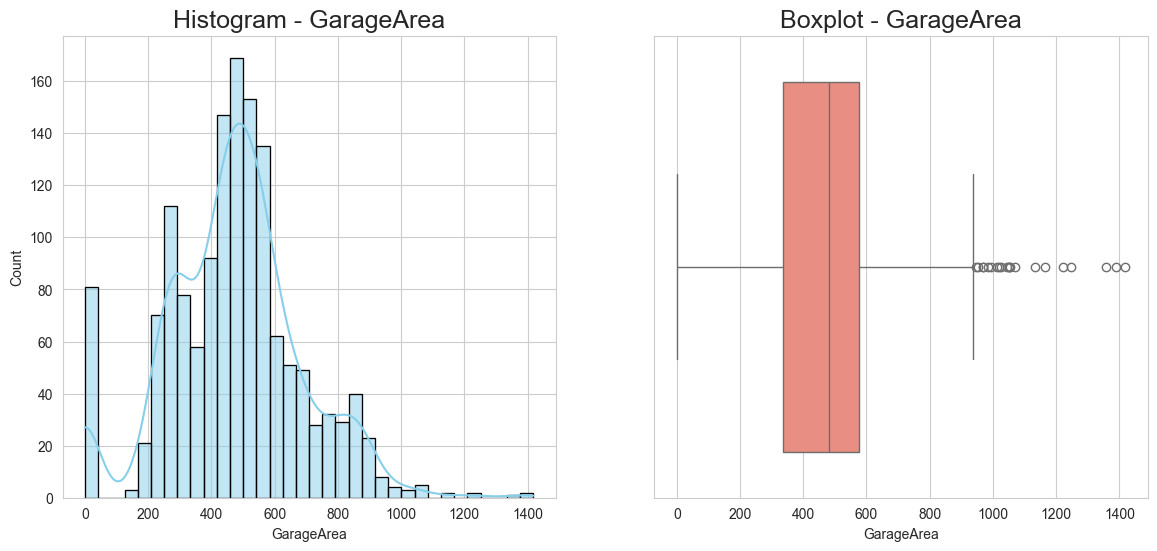

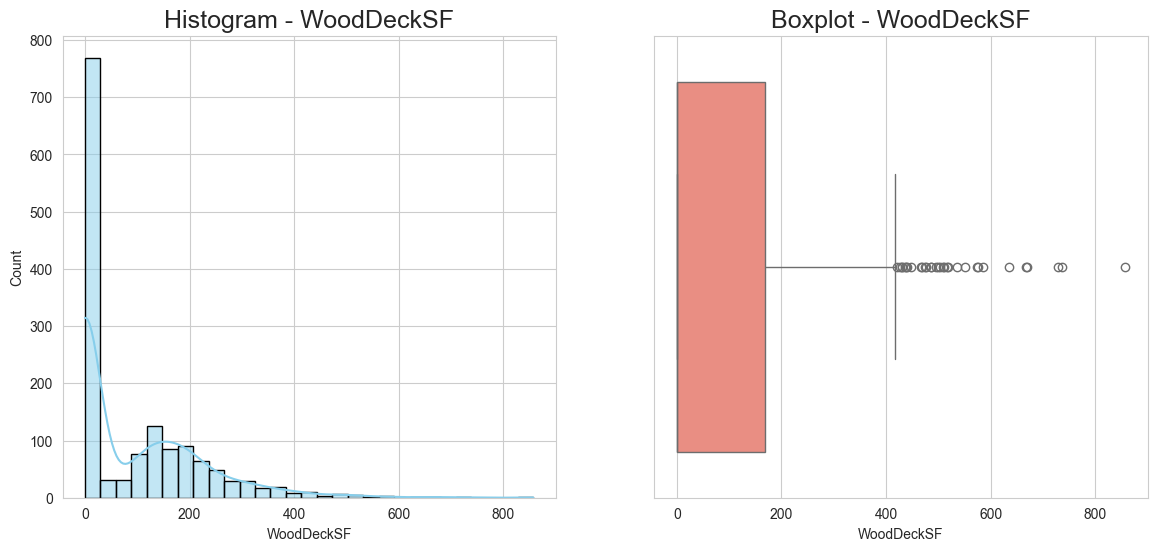

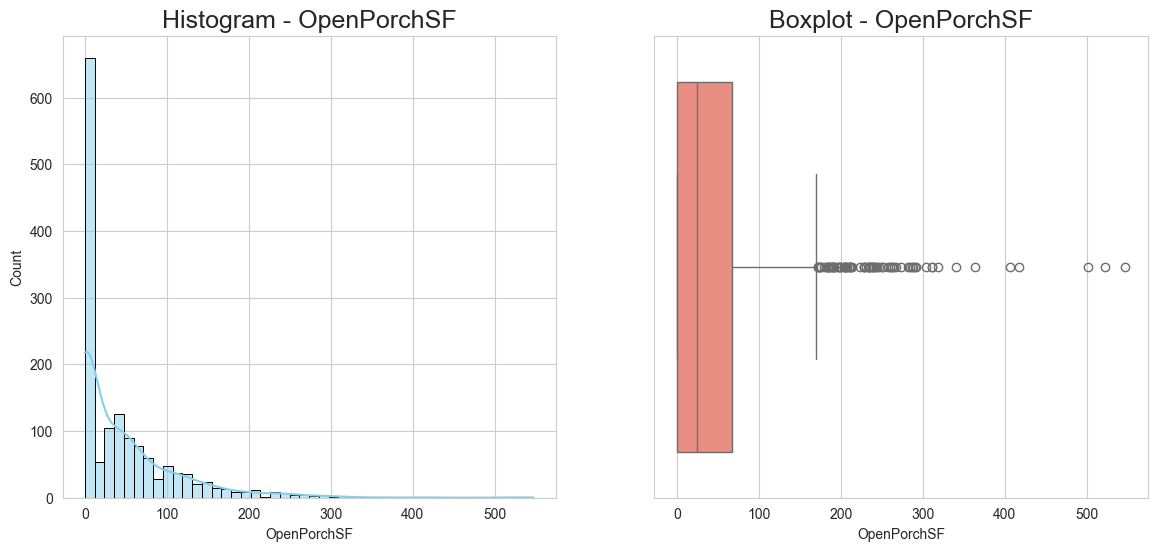

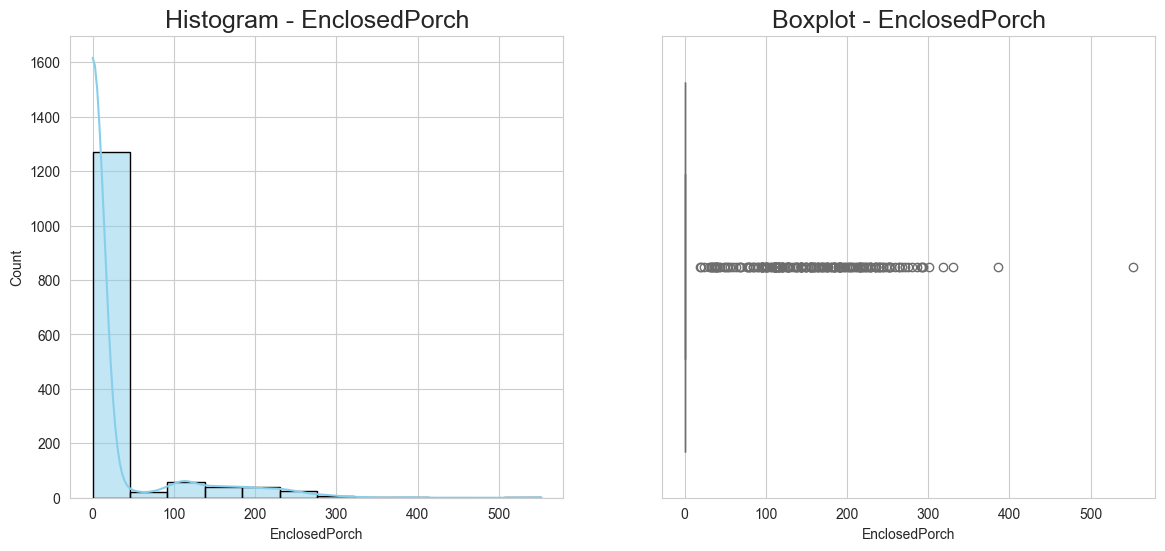

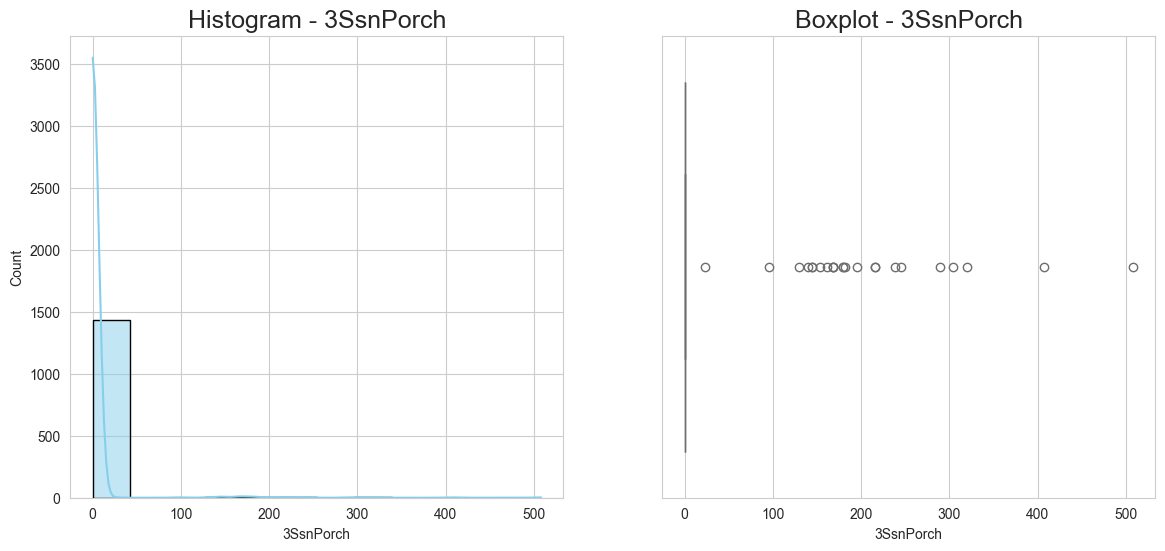

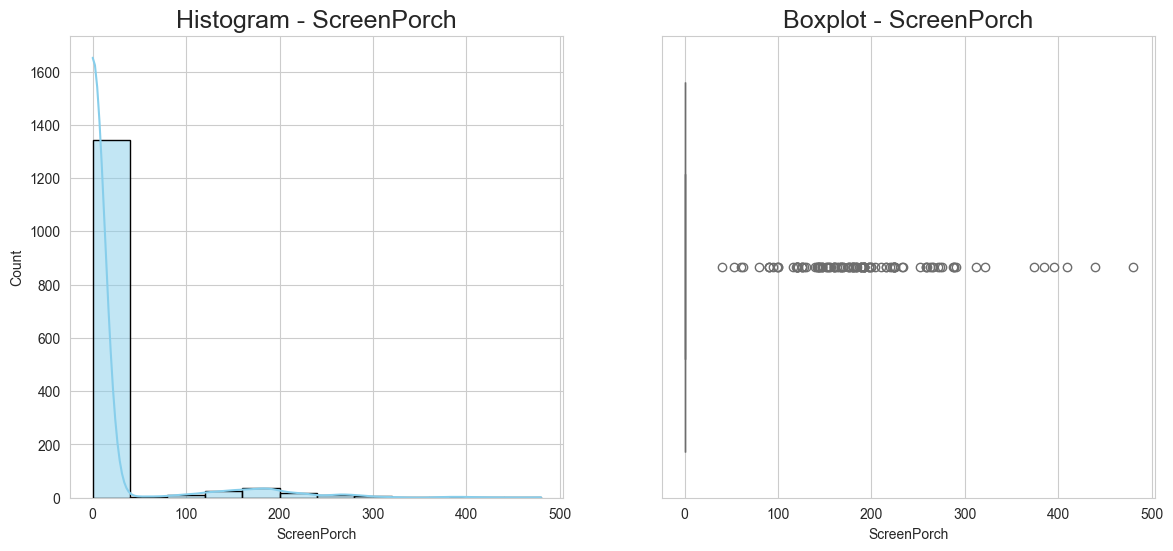

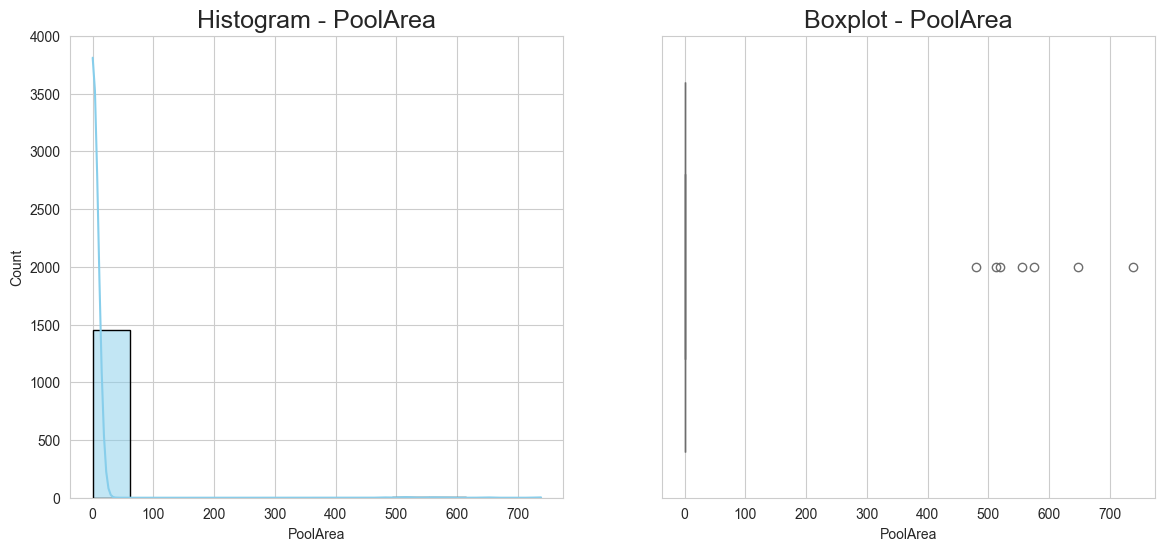

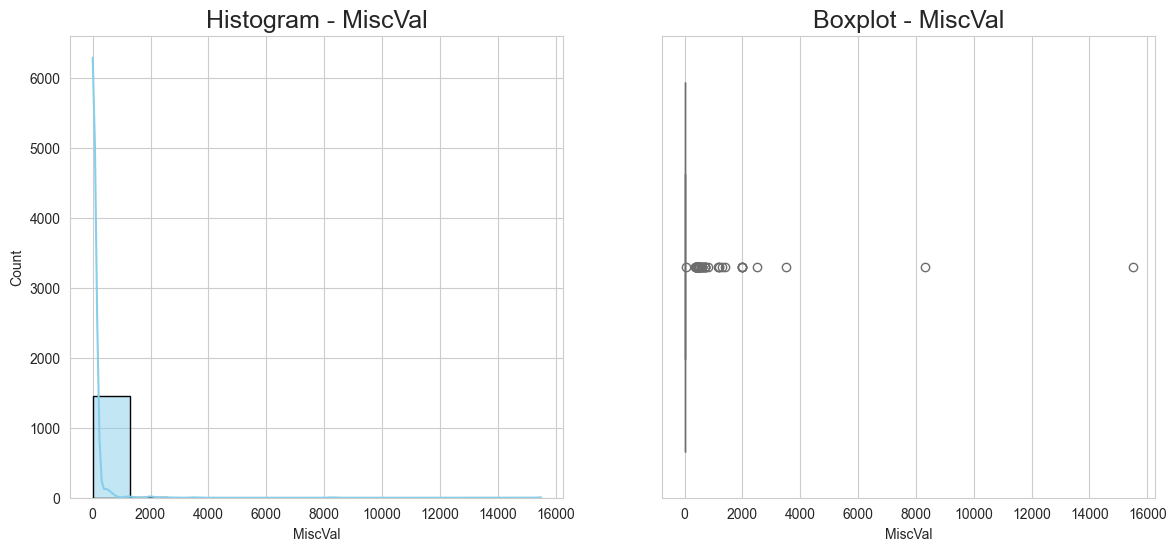

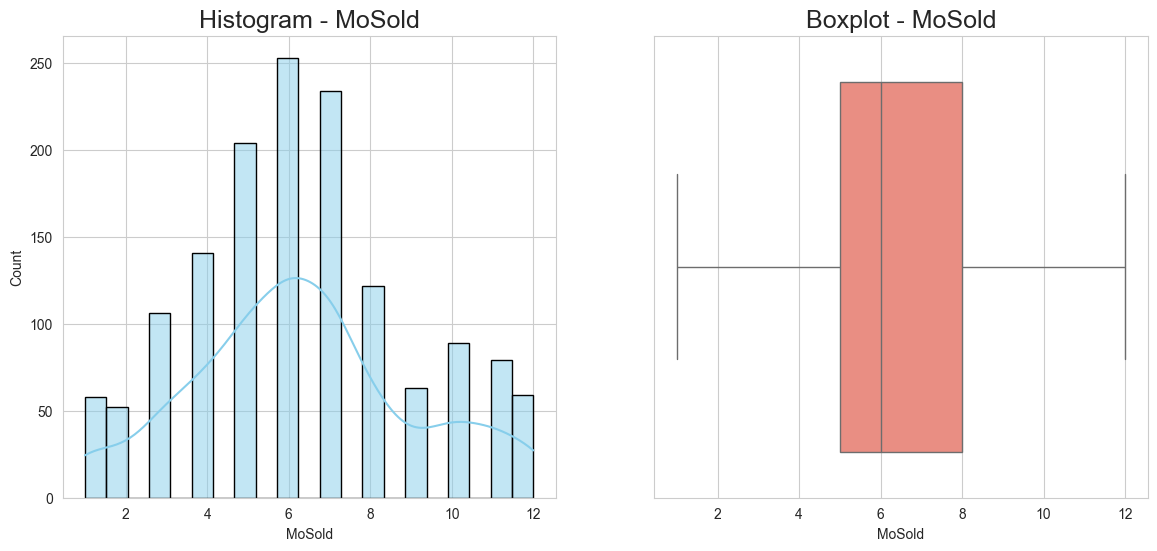

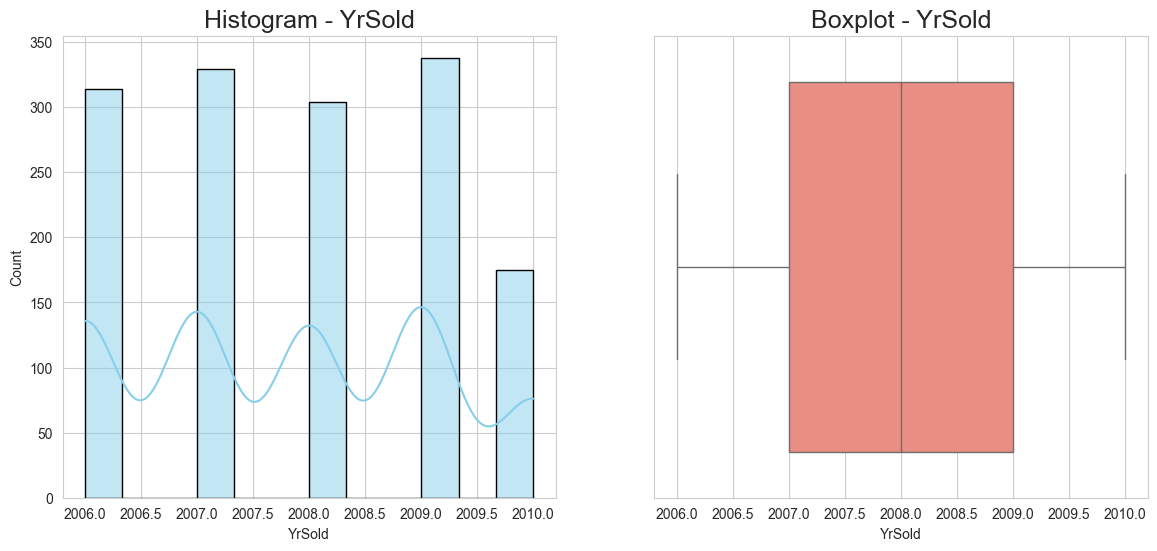

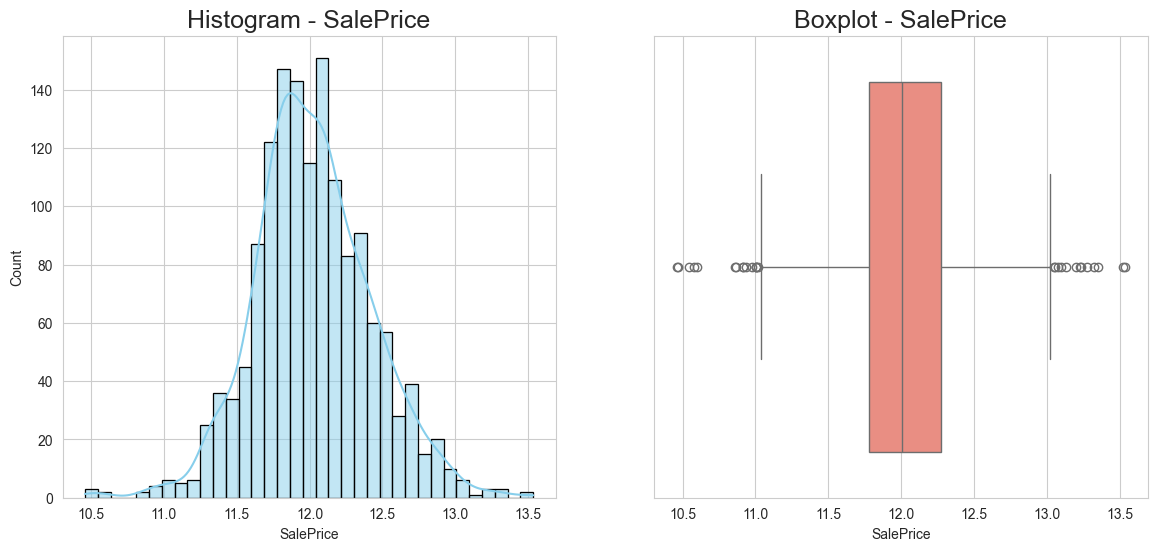

In [27]:
# EDA: To check the distribution of all numeric variables using histograms and boxplots:
# To iterate through each numeric column:
for col in df_num.columns:
    # To create a new figure for each numeric variable:
    plt.figure(figsize=(14, 6))
    
    # To plot histogram on the left side:
    plt.subplot(1, 2, 1)
    plt.title(f'Histogram - {col}', fontdict={'fontsize': 18})
    sns.histplot(df_num[col], kde=True, color='skyblue', edgecolor='black')
    
    # To plot boxplot on the right side:
    plt.subplot(1, 2, 2)
    plt.title(f'Boxplot - {col}', fontdict={'fontsize': 18})
    sns.boxplot(data=df_num, x=col, color='salmon')
    
    # To display the plots:
    plt.show()


#### Observations:
- Several numerical columns display distributions that are not normal.
- The presence of outliers is observed in a majority of the columns.So, it is necessary to perform outlier treatment. 

### Exploratory Data Analysis (EDA) on Categorical Columns:

In [28]:
# To check the unique values of all categorical columns:
# To iterate through each categorical column:
for col in df_cat.columns:
    # To print the column name:
    print(f"Unique values in '{col}':")
    
    # To print the unique values for the current categorical column:
    unique_values = df[col].unique()
    print(unique_values, '\n')

Unique values in 'MSSubClass':
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

Unique values in 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Unique values in 'Street':
['Pave' 'Grvl'] 

Unique values in 'Alley':
['None' 'Grvl' 'Pave'] 

Unique values in 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3'] 

Unique values in 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS'] 

Unique values in 'Utilities':
['AllPub' 'NoSeWa'] 

Unique values in 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Unique values in 'LandSlope':
['Gtl' 'Mod' 'Sev'] 

Unique values in 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Unique values in 'Condition1':
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Unique values in 'Condition2':
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RR

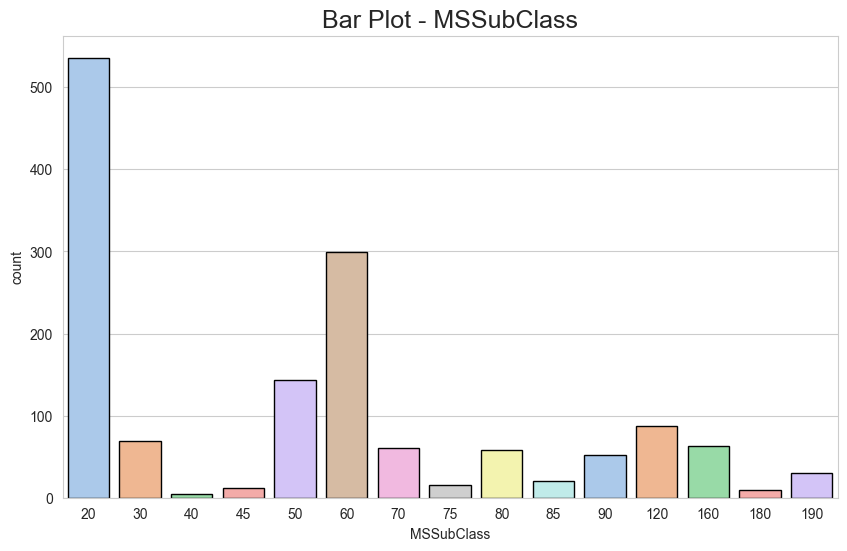

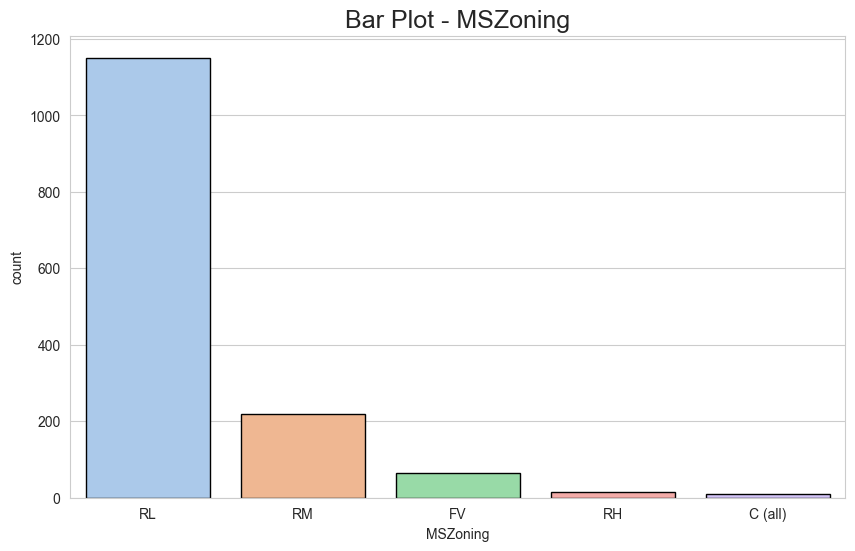

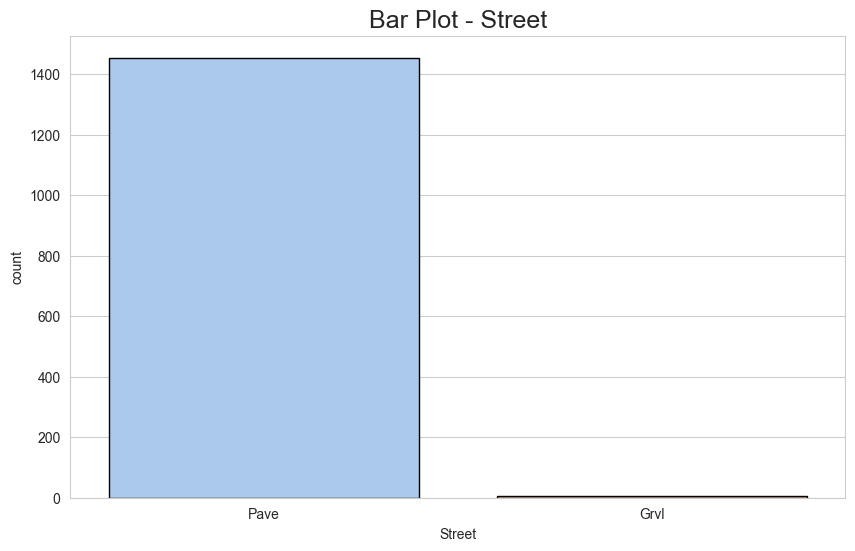

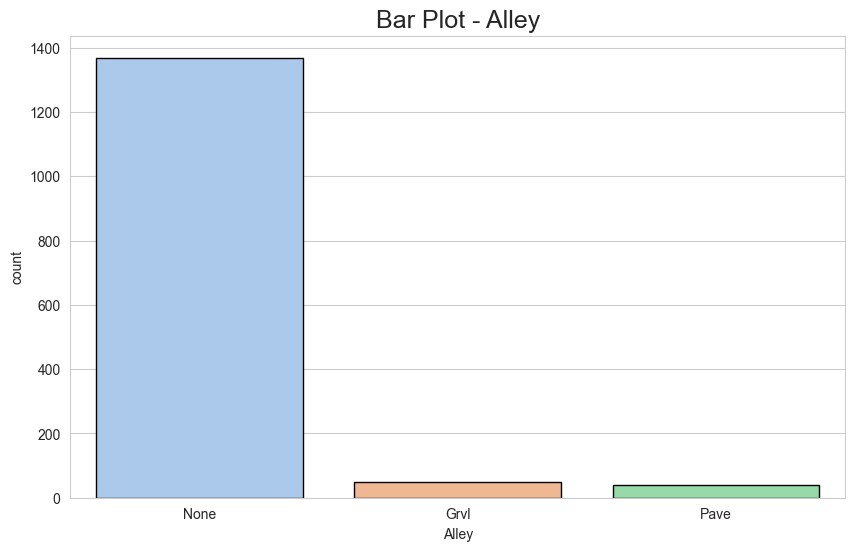

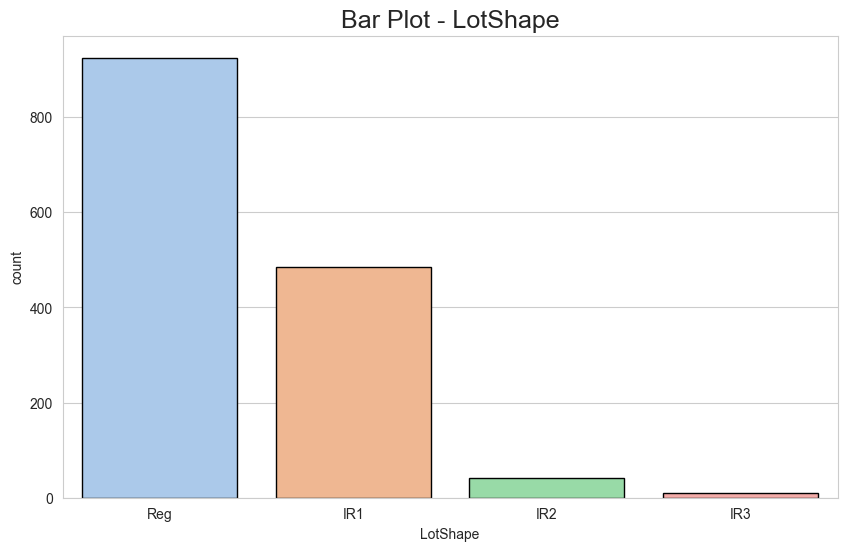

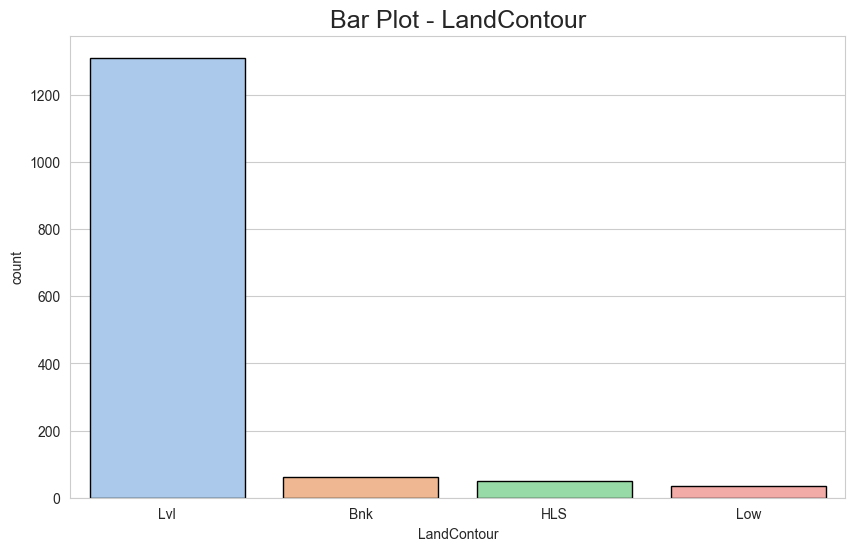

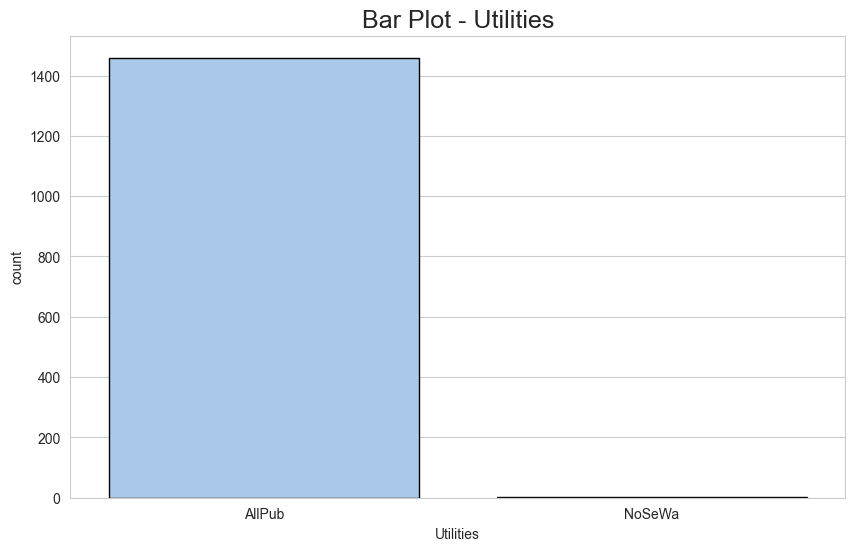

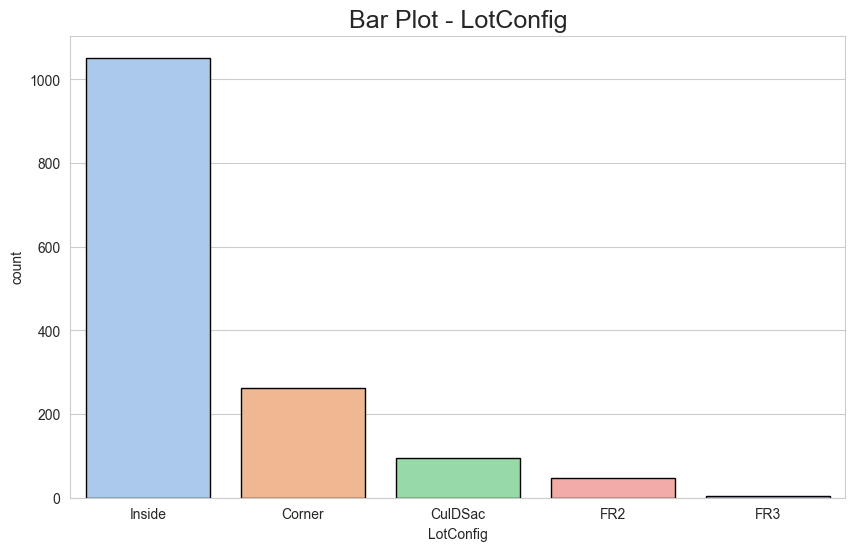

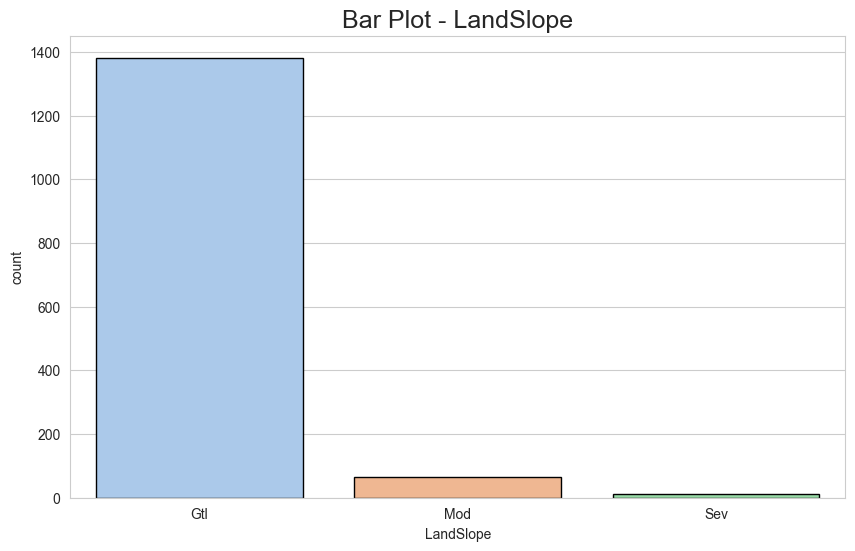

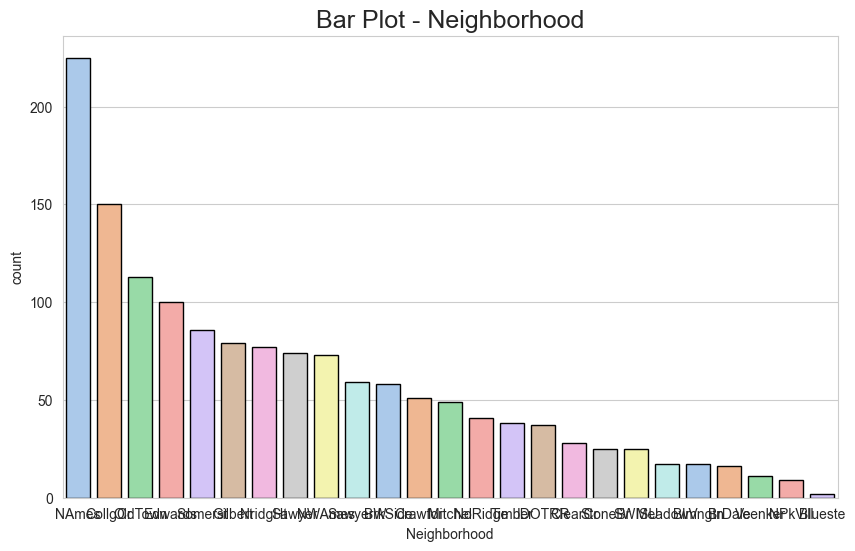

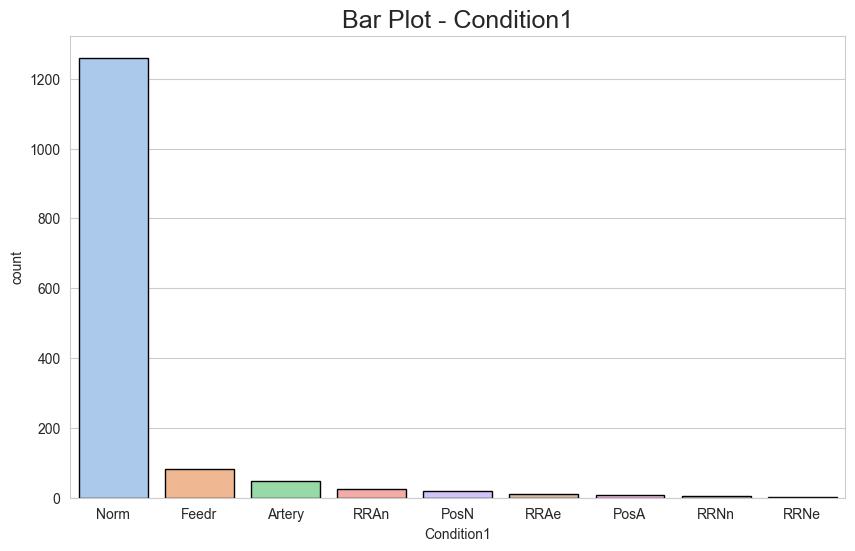

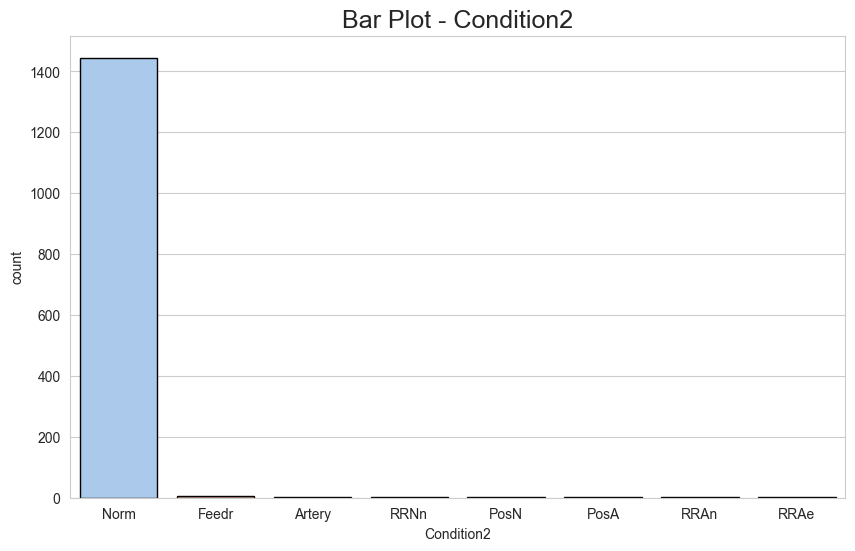

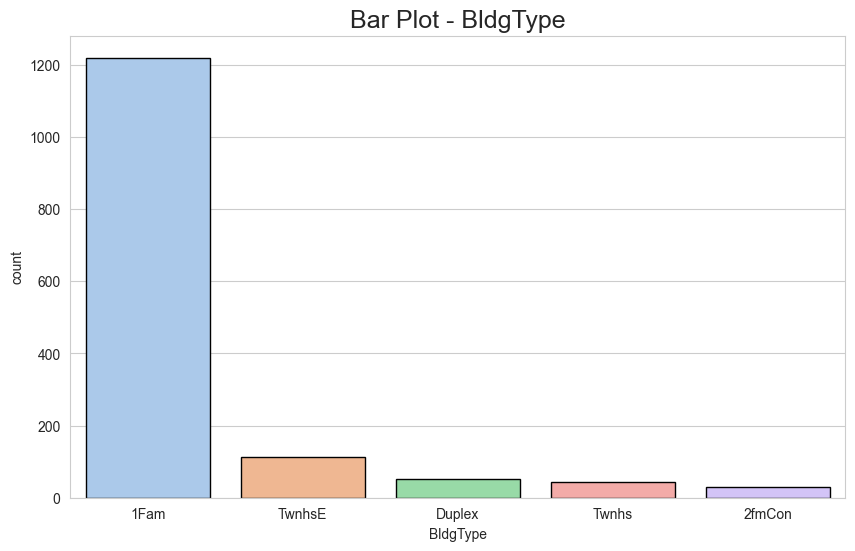

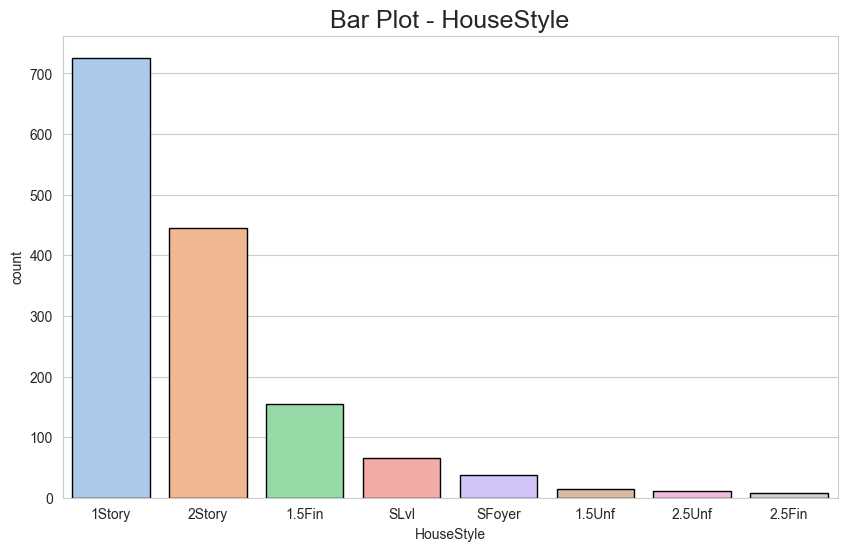

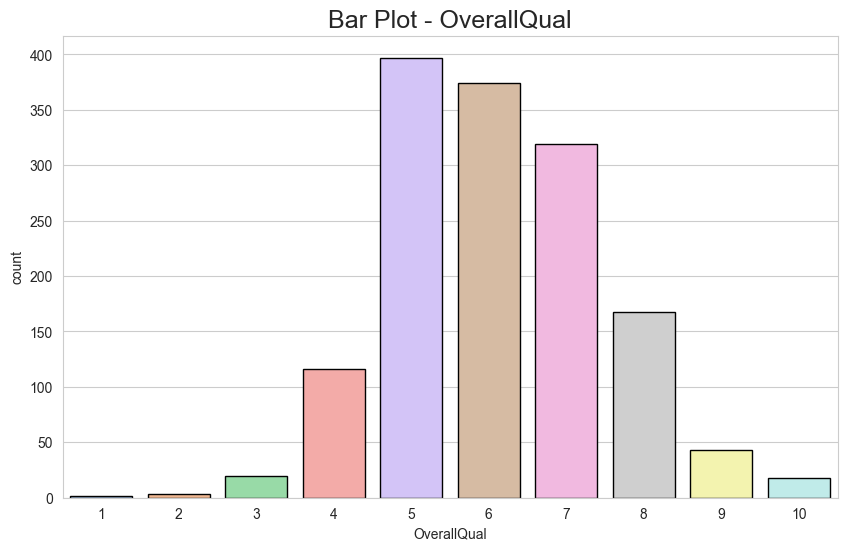

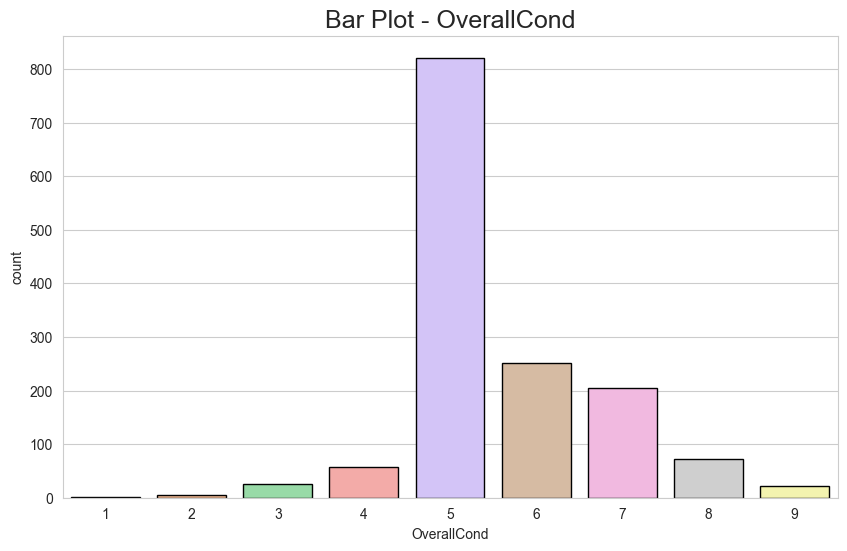

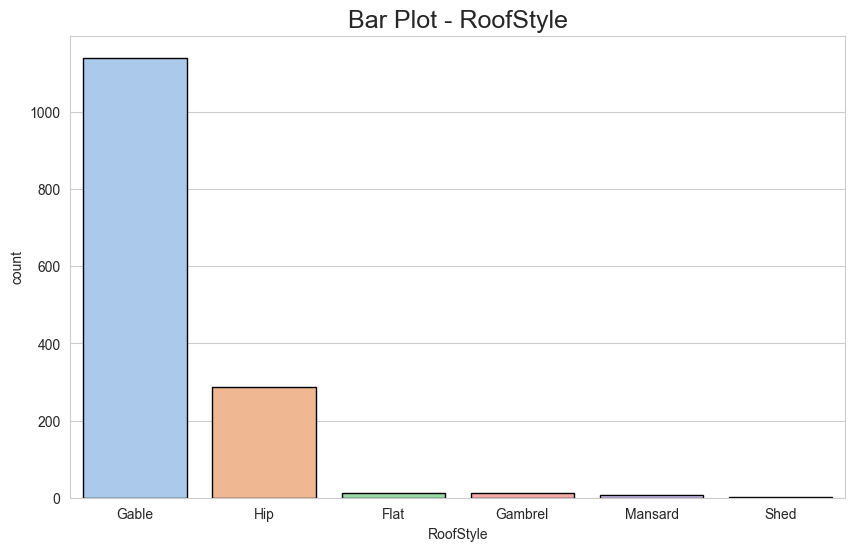

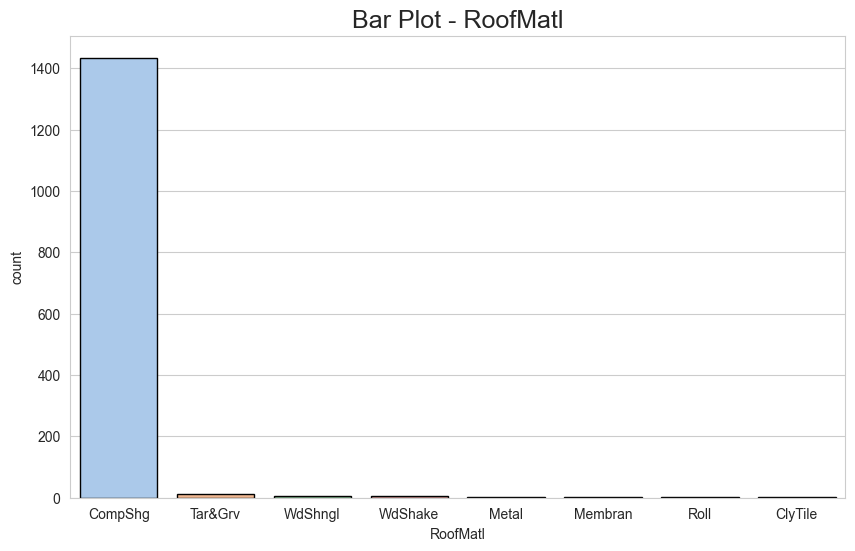

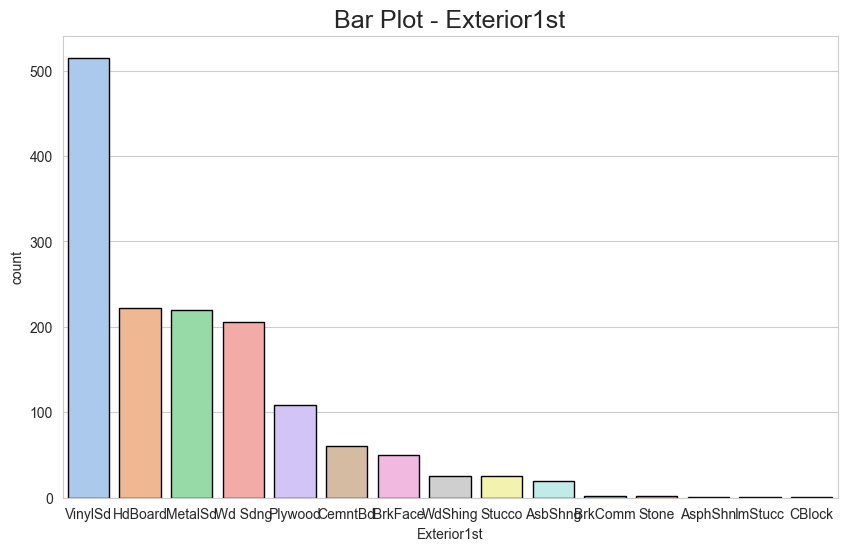

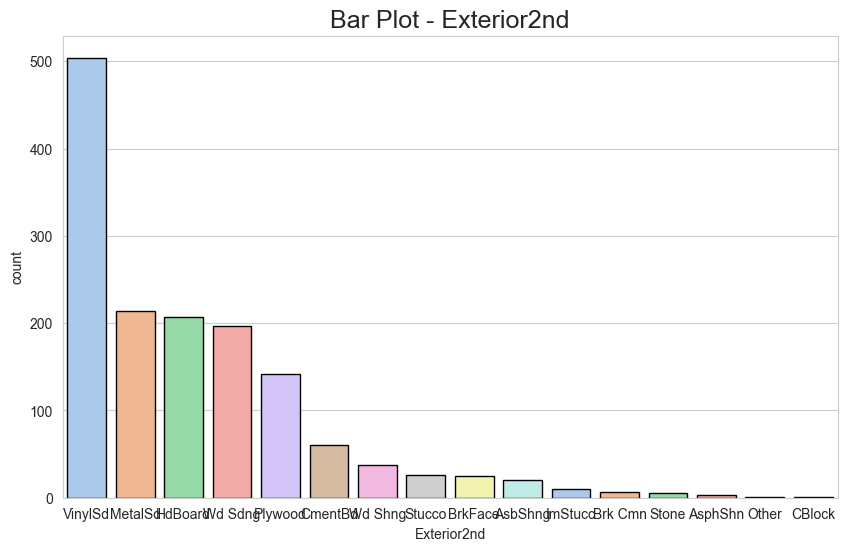

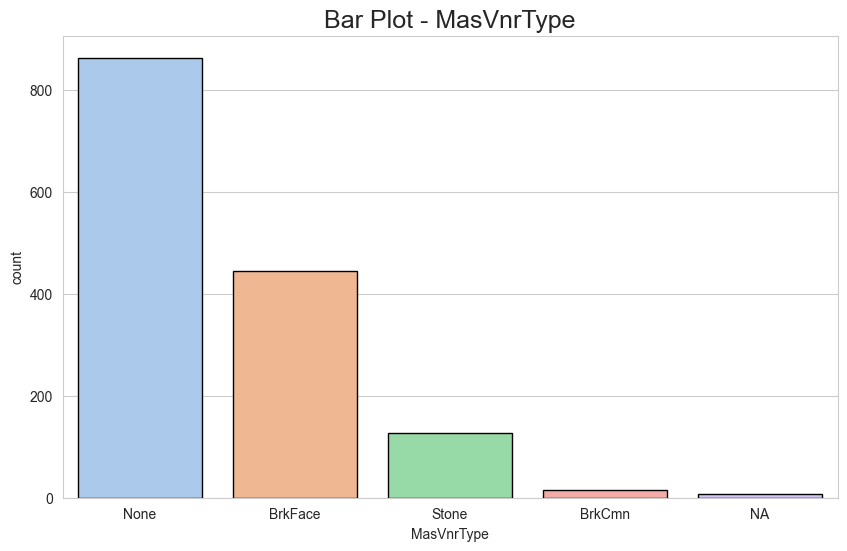

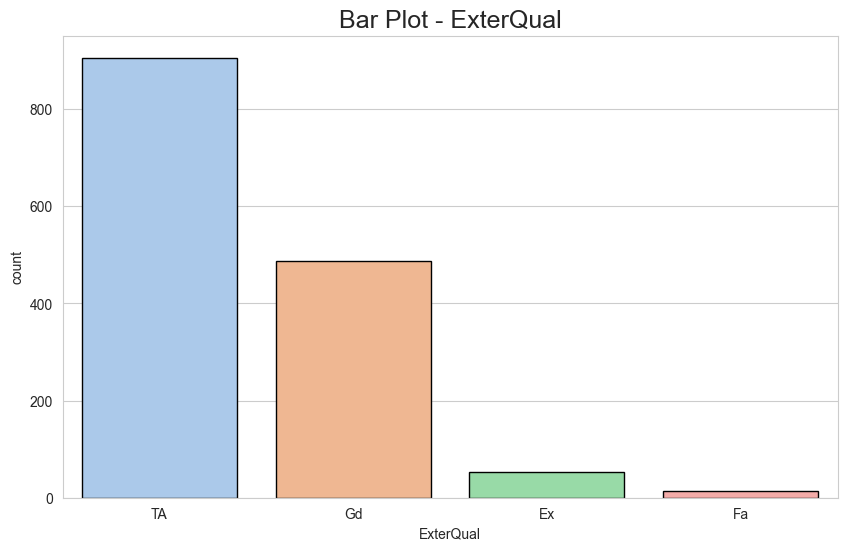

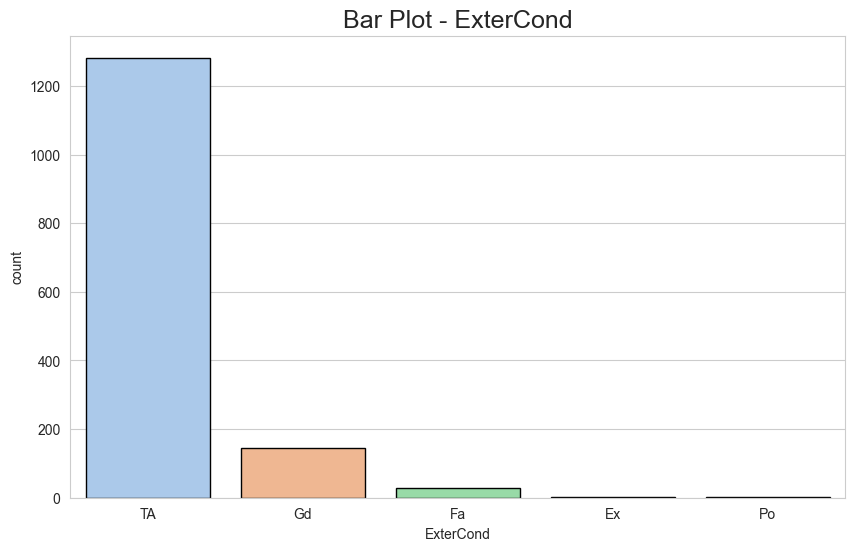

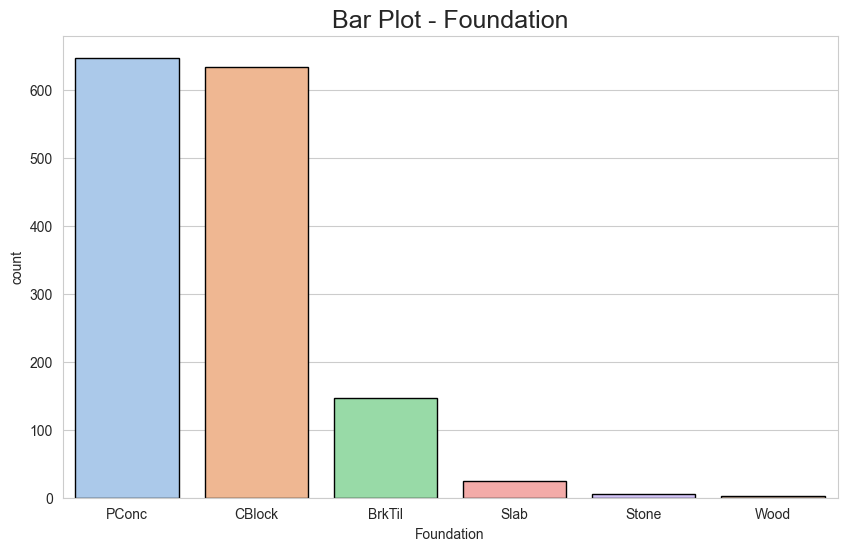

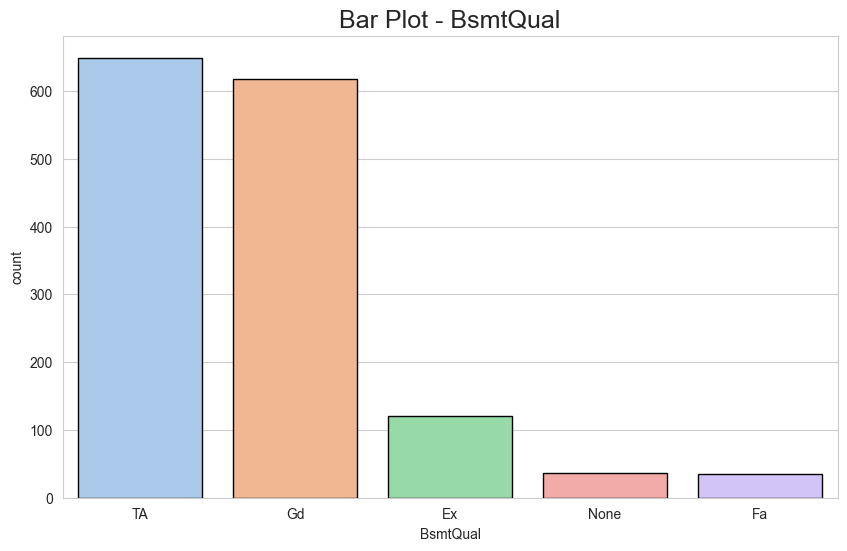

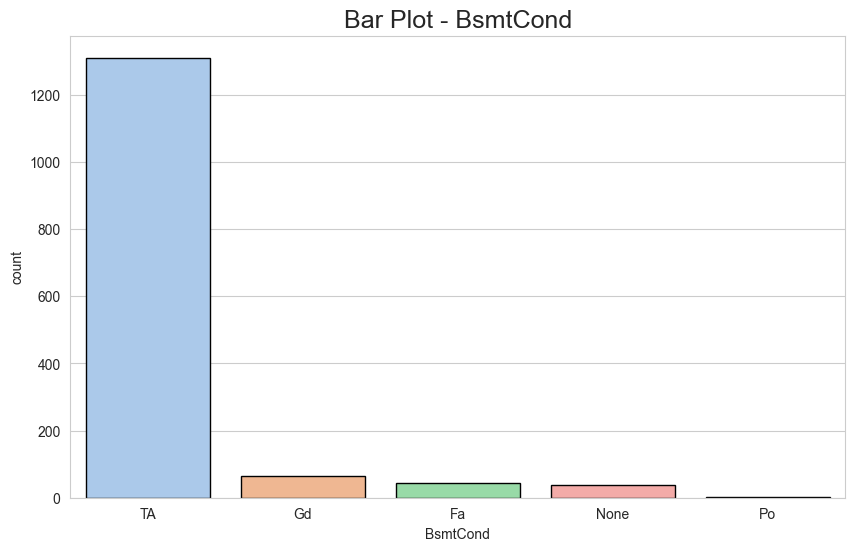

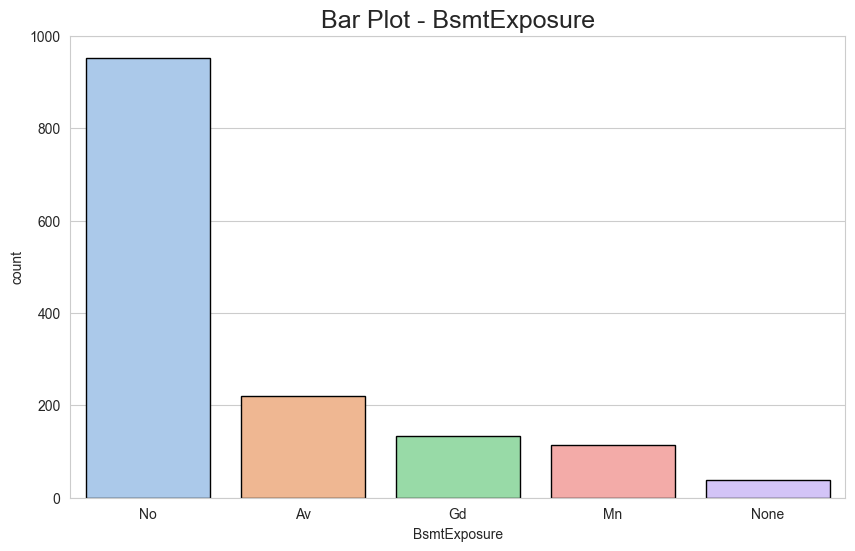

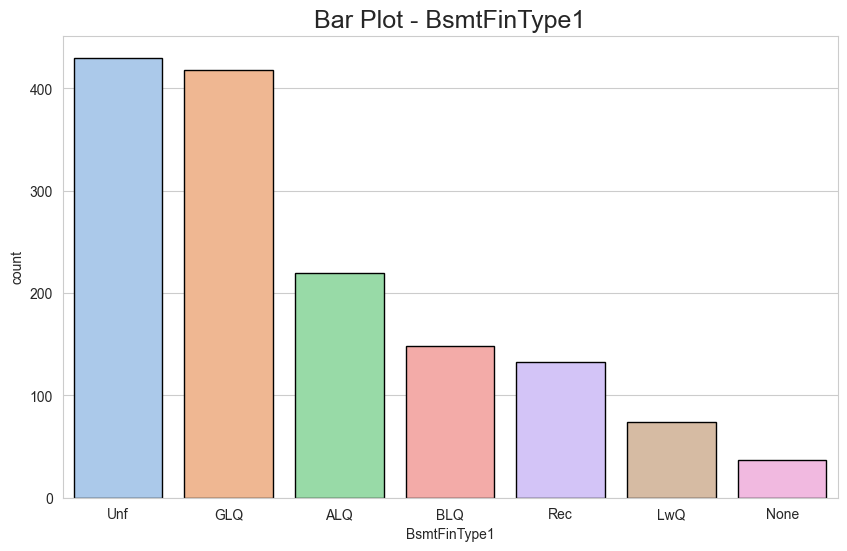

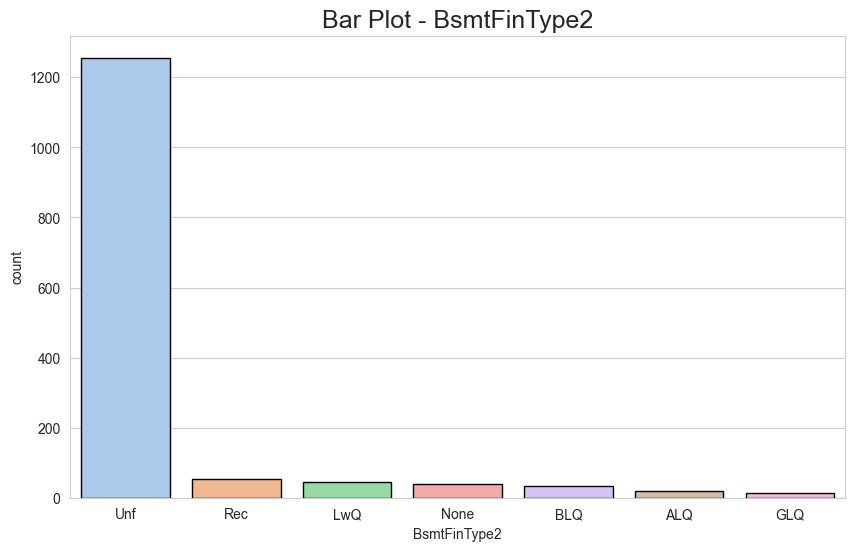

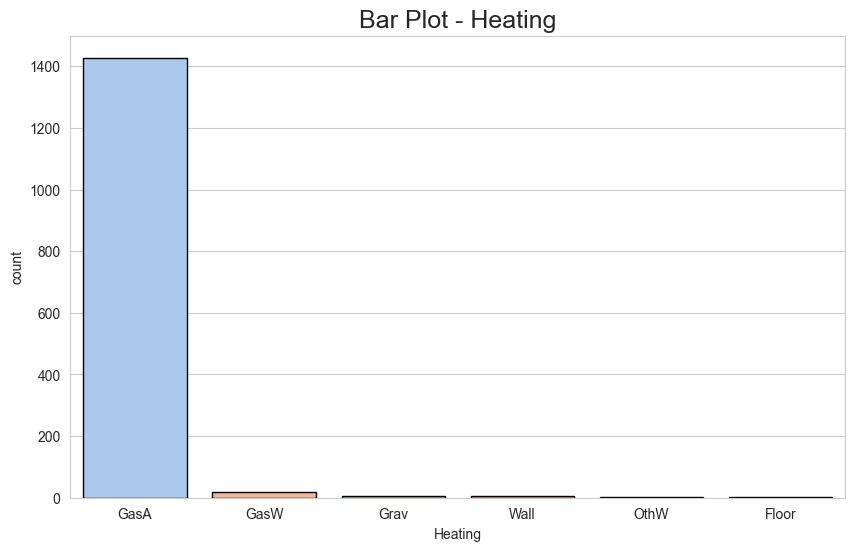

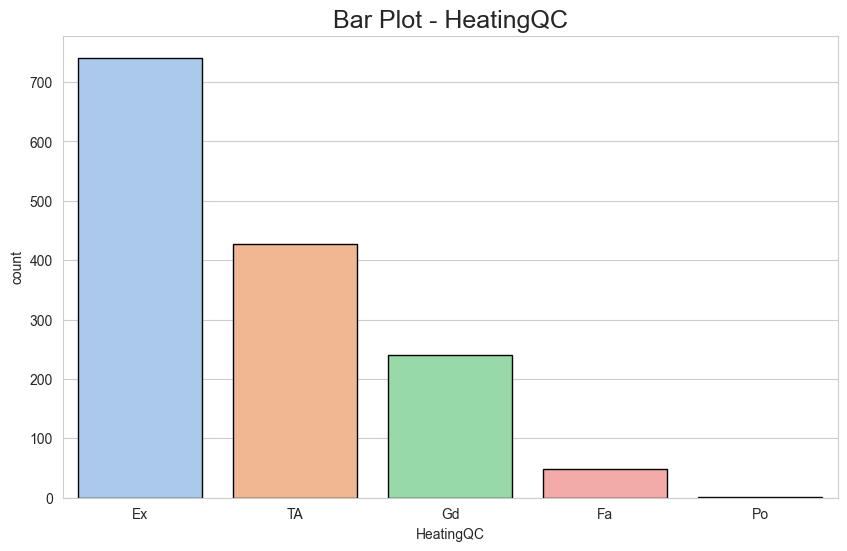

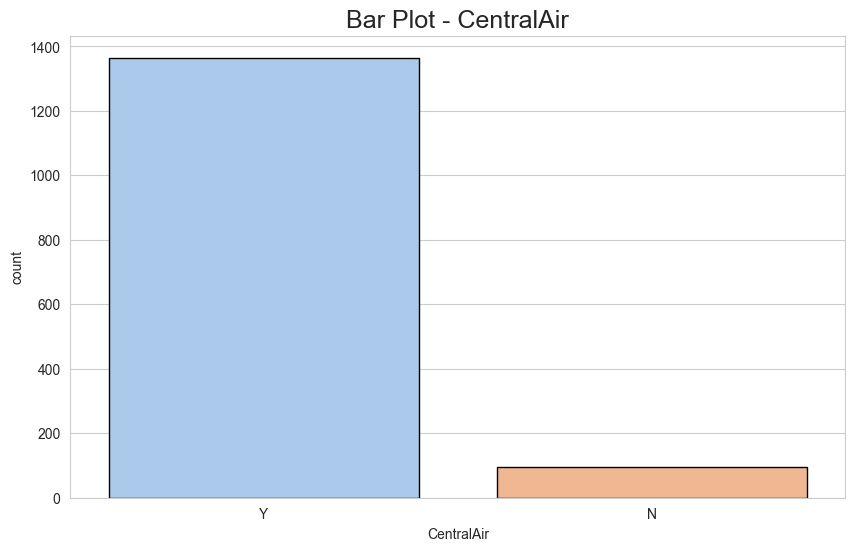

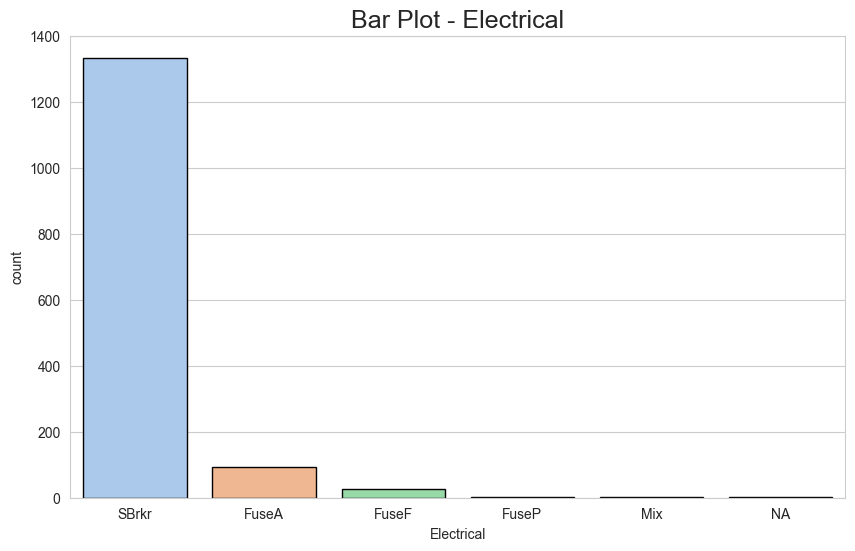

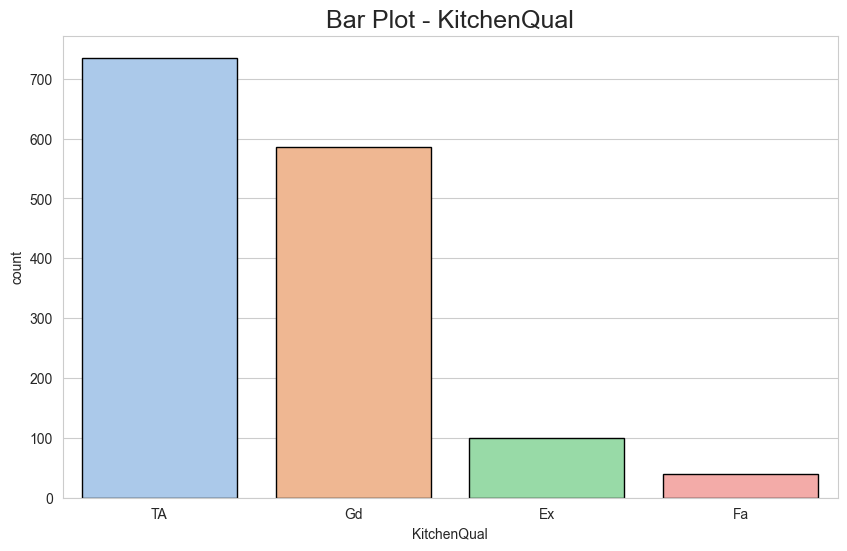

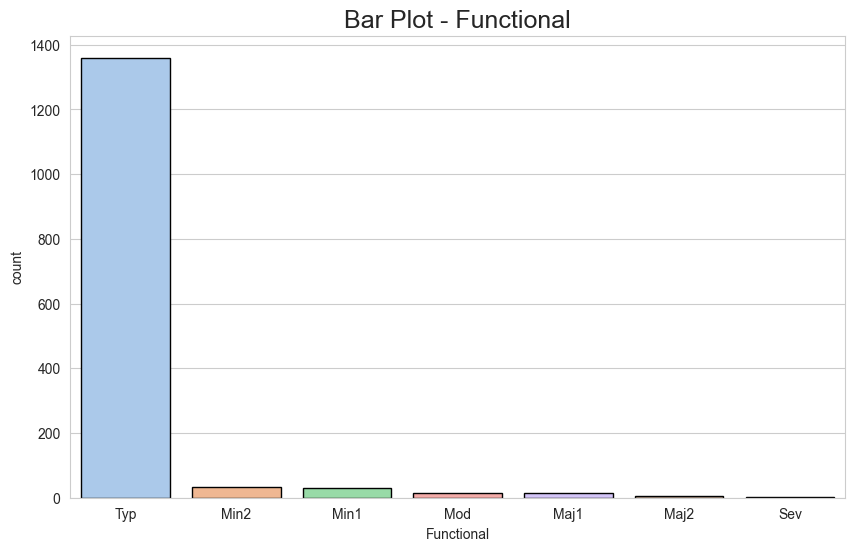

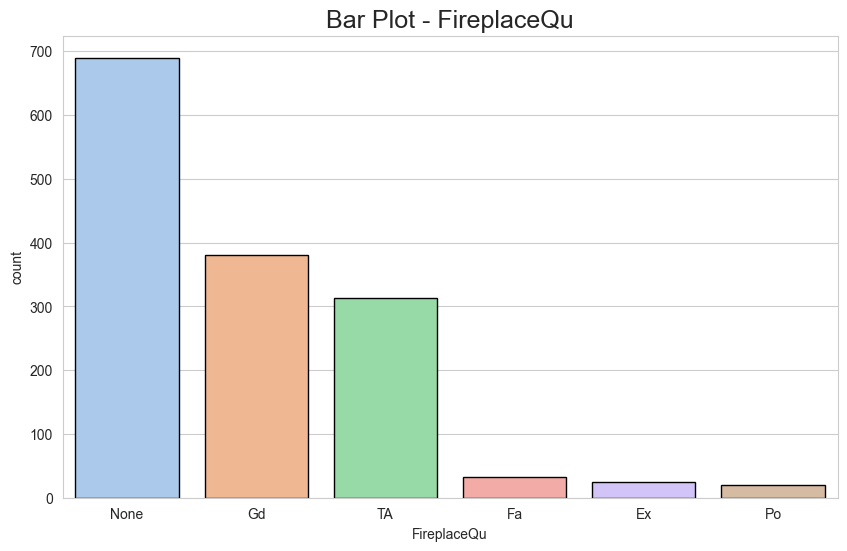

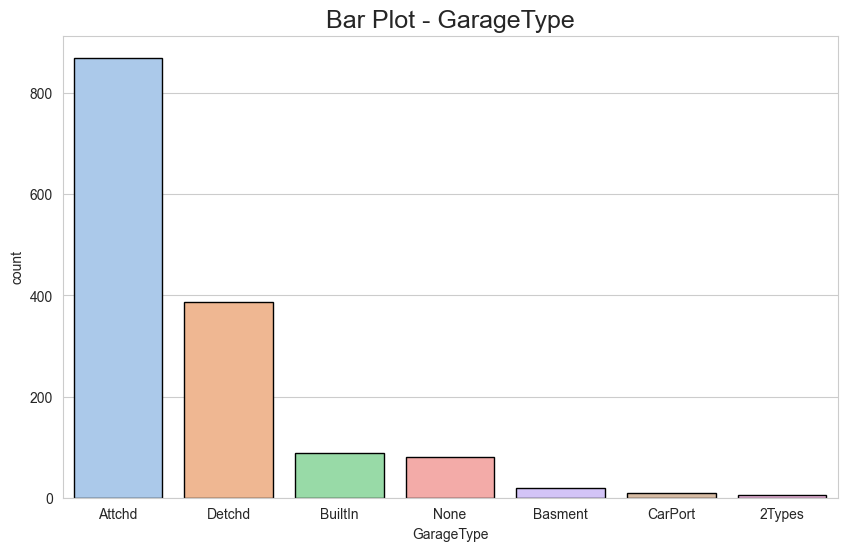

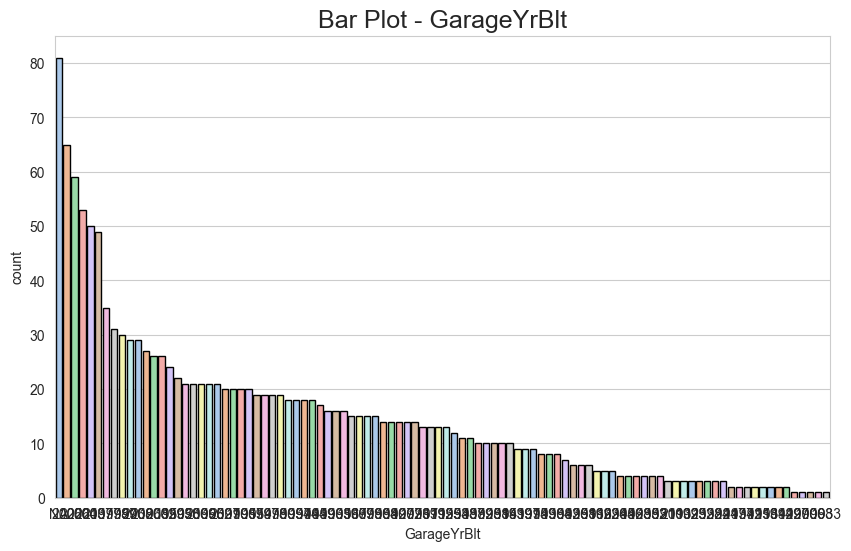

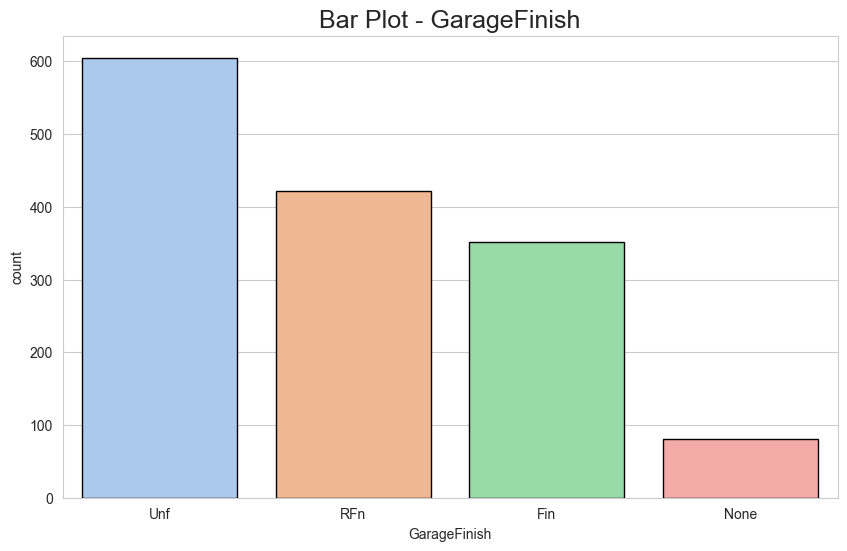

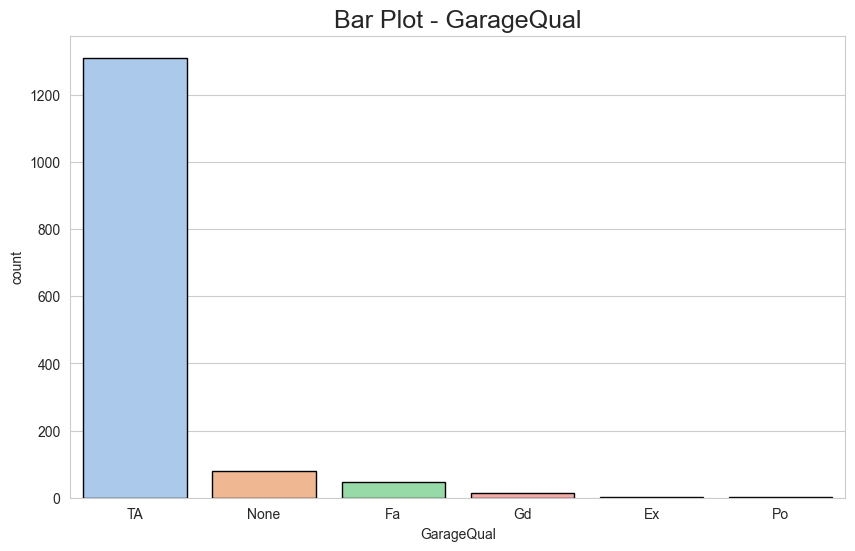

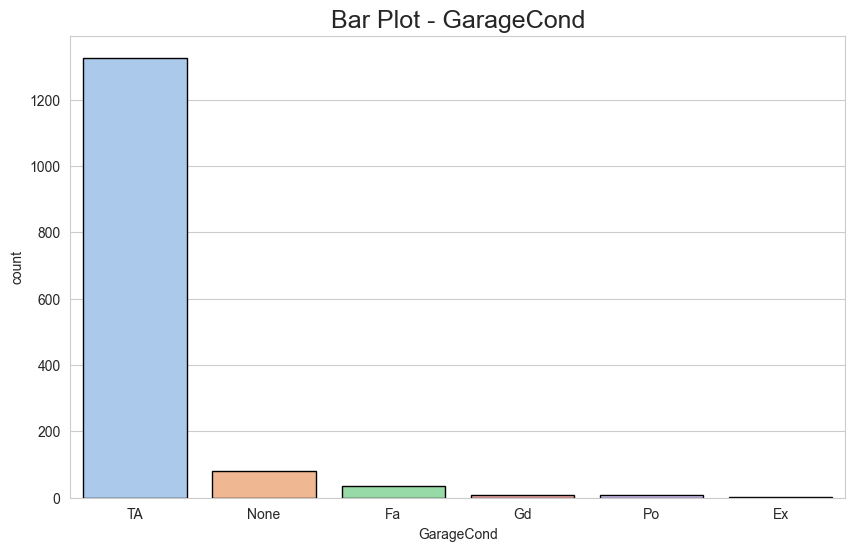

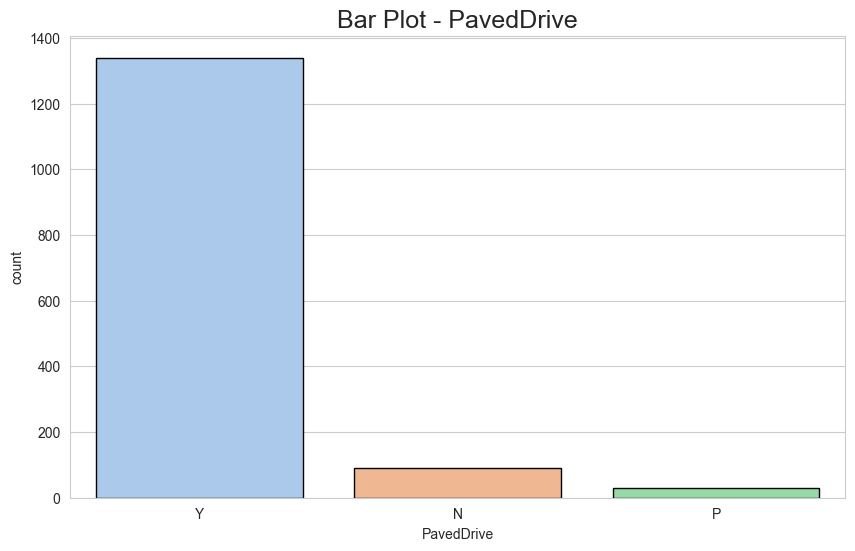

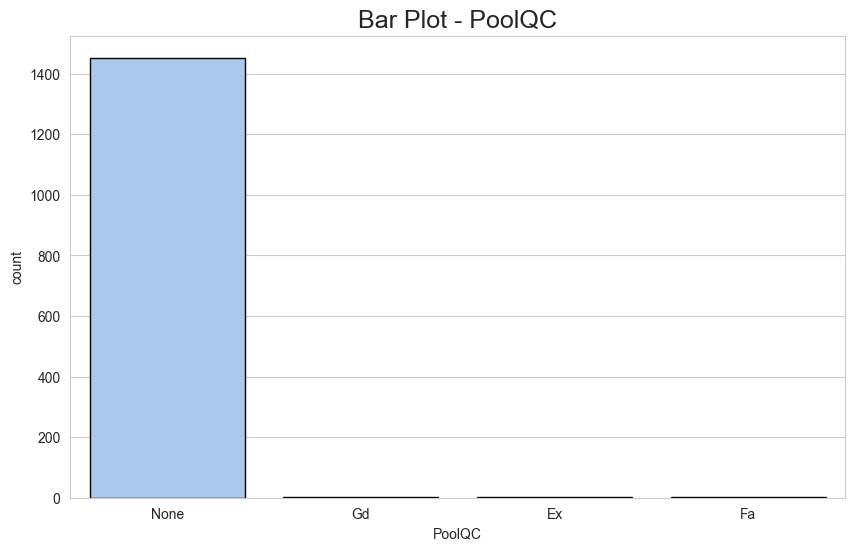

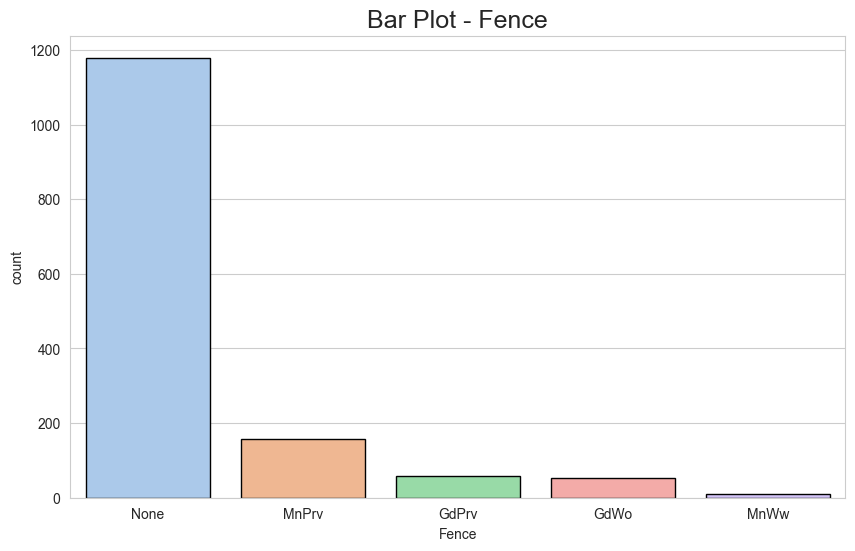

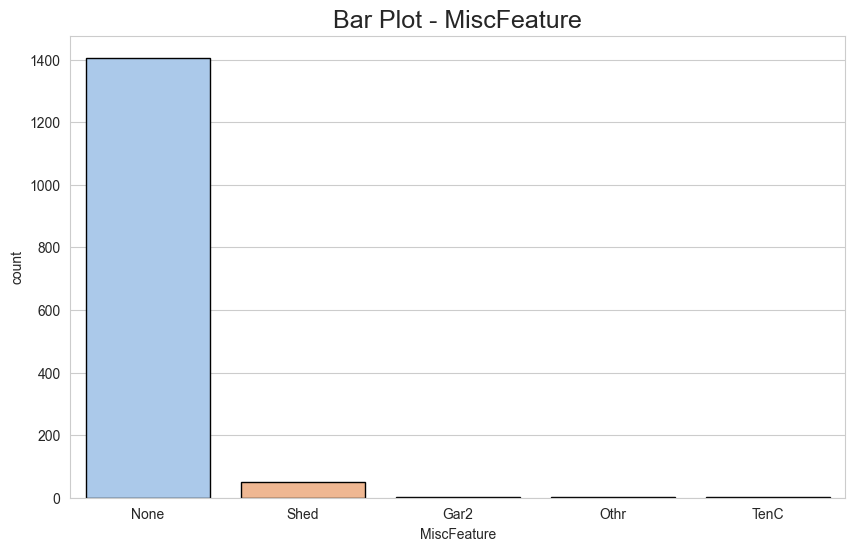

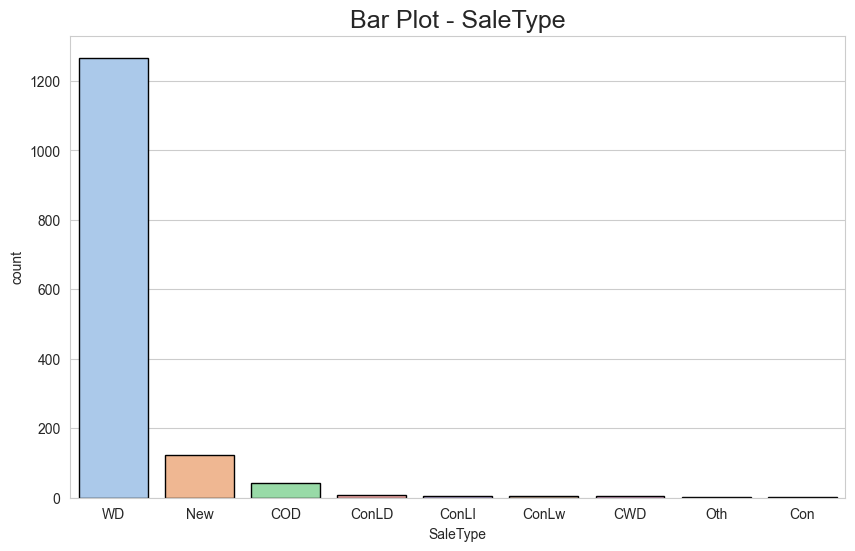

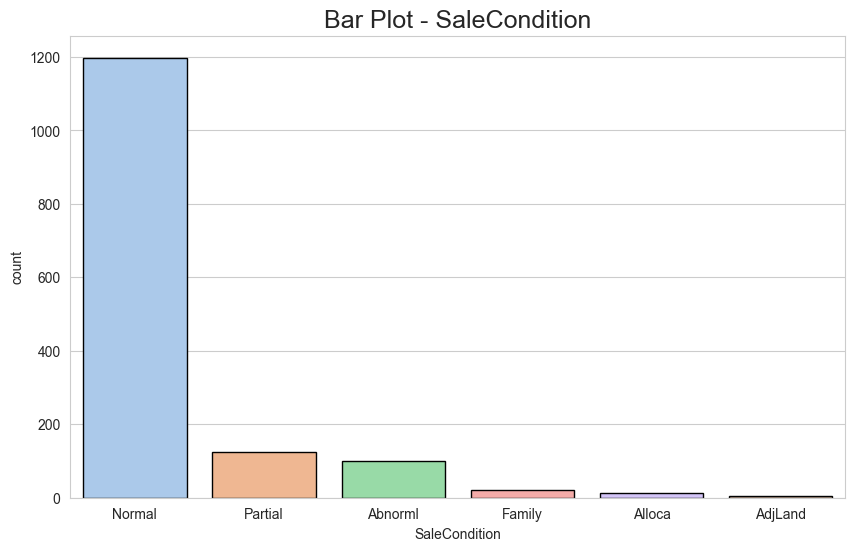

In [29]:
# EDA: Visualizing the levels of categorical columns using bar plots:
# To iterate through each categorical column:
for col in df_cat.columns:
    # To create a new figure for each categorical variable:
    plt.figure(figsize=(10, 6))
    
    # To set the title for the bar plot:
    plt.title(f'Bar Plot - {col}', fontdict={'fontsize': 18})
    
    # To create a bar plot:
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts(), palette='pastel', edgecolor='black')
    
    # To display the plot
    plt.show()


#### Observations: Upon examining the value counts and bar plots above, it is apparent that none of the columns has a singular unique value that can be eliminated.

### Bivariate Analysis:

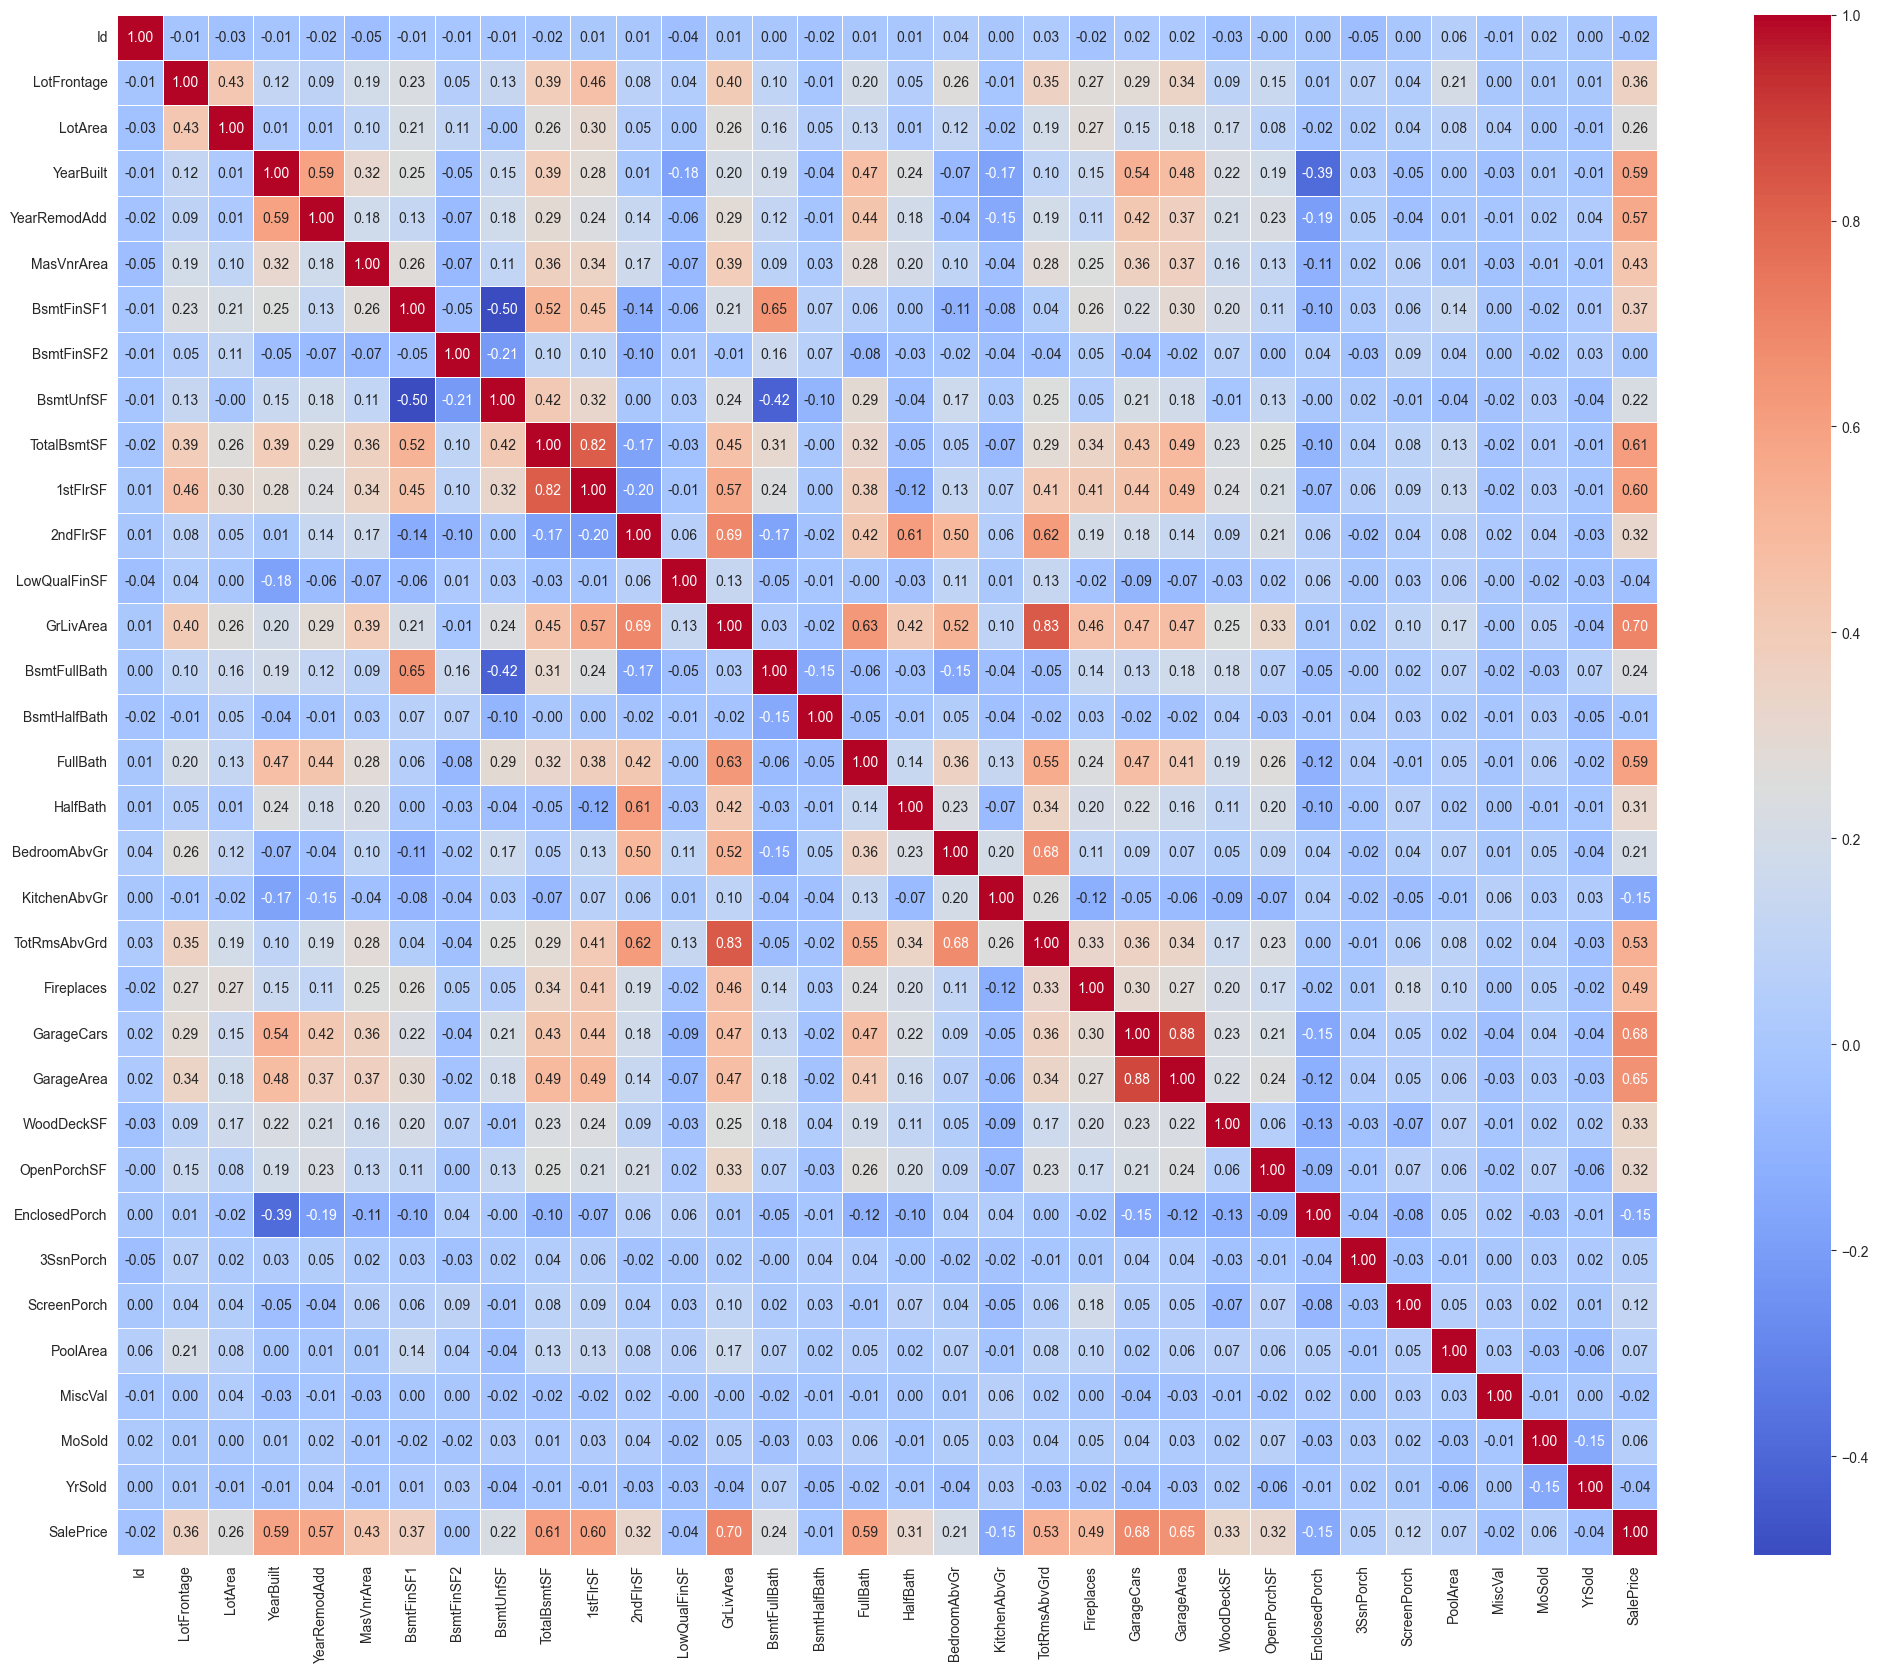

In [30]:
# EDA: Plotting heatmap to detect correlations among numerical variables: 
# To set the figure size:
plt.figure(figsize=(25, 20))

# To create a heatmap of the correlation matrix with annotations:
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)

# To display the plot:
plt.show()


#### Observations:
- The target variable, SalePrice, shows a strong correlation with GrLivArea, GarageCars, and GarageArea.  
- Many columns show significant correlation with each other.
- As there is multicollinearity among predictors in data set, it would be good to use Ridge and Lasso Regression.


### Feature Engineering:

In [31]:
# Feature Engineering: To create a new column for the age of the house:
# To calculate the age of the house by subtracting the construction year from the year sold:
df['Age'] = df['YrSold'] - df['YearBuilt']

In [32]:
# Feature Engineering: To drop the columns used to calculate the age of the house:
# To drop the 'YrSold' and 'YearBuilt' columns:
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [33]:
# Display the first few rows of the updated DataFrame
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

### Data Preprocessing:

#### Missing Value Treatment:

In [34]:
# To check for missing values in all features and arrange in descending order:
missing_values = df.isna().sum().sort_values(ascending=False)

# To display the count of missing values for each feature in descending order:
print(missing_values)

LotFrontage      259
MasVnrArea         8
Id                 0
KitchenAbvGr       0
GarageYrBlt        0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
BedroomAbvGr       0
GarageCars         0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
GarageFinish       0
GarageArea         0
Electrical         0
PoolQC             0
SalePrice          0
SaleCondition      0
SaleType           0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolArea           0
GarageQual         0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
1stFlrSF           0
CentralAir         0
MSSubClass         0
LandSlope          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType     

#### Observations: Only the columns LotFrontage and MasVnrArea have missing values. Since these columns are numeric, we'll fill in the missing values with the mean of their respective columns.    

In [35]:
# Impute missing values in 'LotFrontage' column with its mean:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

# Impute missing values in 'MasVnrArea' column with its mean:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [36]:
# To check for missing values in all features after imputing with means:
missing_values_after_imputation = df.isna().sum()

# To display the count of missing values for each feature:
print(missing_values_after_imputation)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### Observations:The dataset has been cleaned.

### Creating Dummy Variable:

In [37]:
# To separate the categorical and numerical features from the updated DataFrame:
# To extract numerical columns:
df_num = df.select_dtypes(include=['int64', 'float64'])

# To extract categorical columns:
df_cat = df.select_dtypes(include='object')

In [38]:
# To Perform one-hot encoding on categorical columns:
df_cat_var_encoded = pd.get_dummies(df_cat, drop_first=True)

# To display the first few rows of the one-hot encoded categorical columns DataFrame:
df_cat_var_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False          False          False          False           True   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3           True          False          False          False          False   
4          False          False          False          False          False   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        False        False         True        False         True   
1        False        False         True        False         True   
2        False        False         True        False         True   
3        False        False         True        False         True   
4        False        False         True        False         True   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0        True       False         False         False          True   
1        True       False         False         False          True   
2        True       False         False         False         False   
3        True       False         False         False         False   
4        True       False         False         False         False   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0            False            False             True             False   
1            False            False             True             False   
2            False            False             True             False   
3            False            False             True             False   
4            False            False             True             False   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0              False          False          False              True   
1              False           True          False             False   
2              False          False          False              True   
3              False          False          False             False   
4              False           True          False             False   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0          False          False                 False                False   
1          False          False                 False                False   
2          False          False                 False                False   
3          False          False                 False                False   
4          False          False                 False                False   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                 False                 False                  True   
1                 False                 False                 False   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                 False   

   N

In [39]:
# To check the dimensions of the one-hot encoded categorical columns DataFrame:
dimensions = df_cat_var_encoded.shape

# To display the dimensions (number of rows and columns):
print(dimensions)

(1460, 353)


### Checking for Outliers:

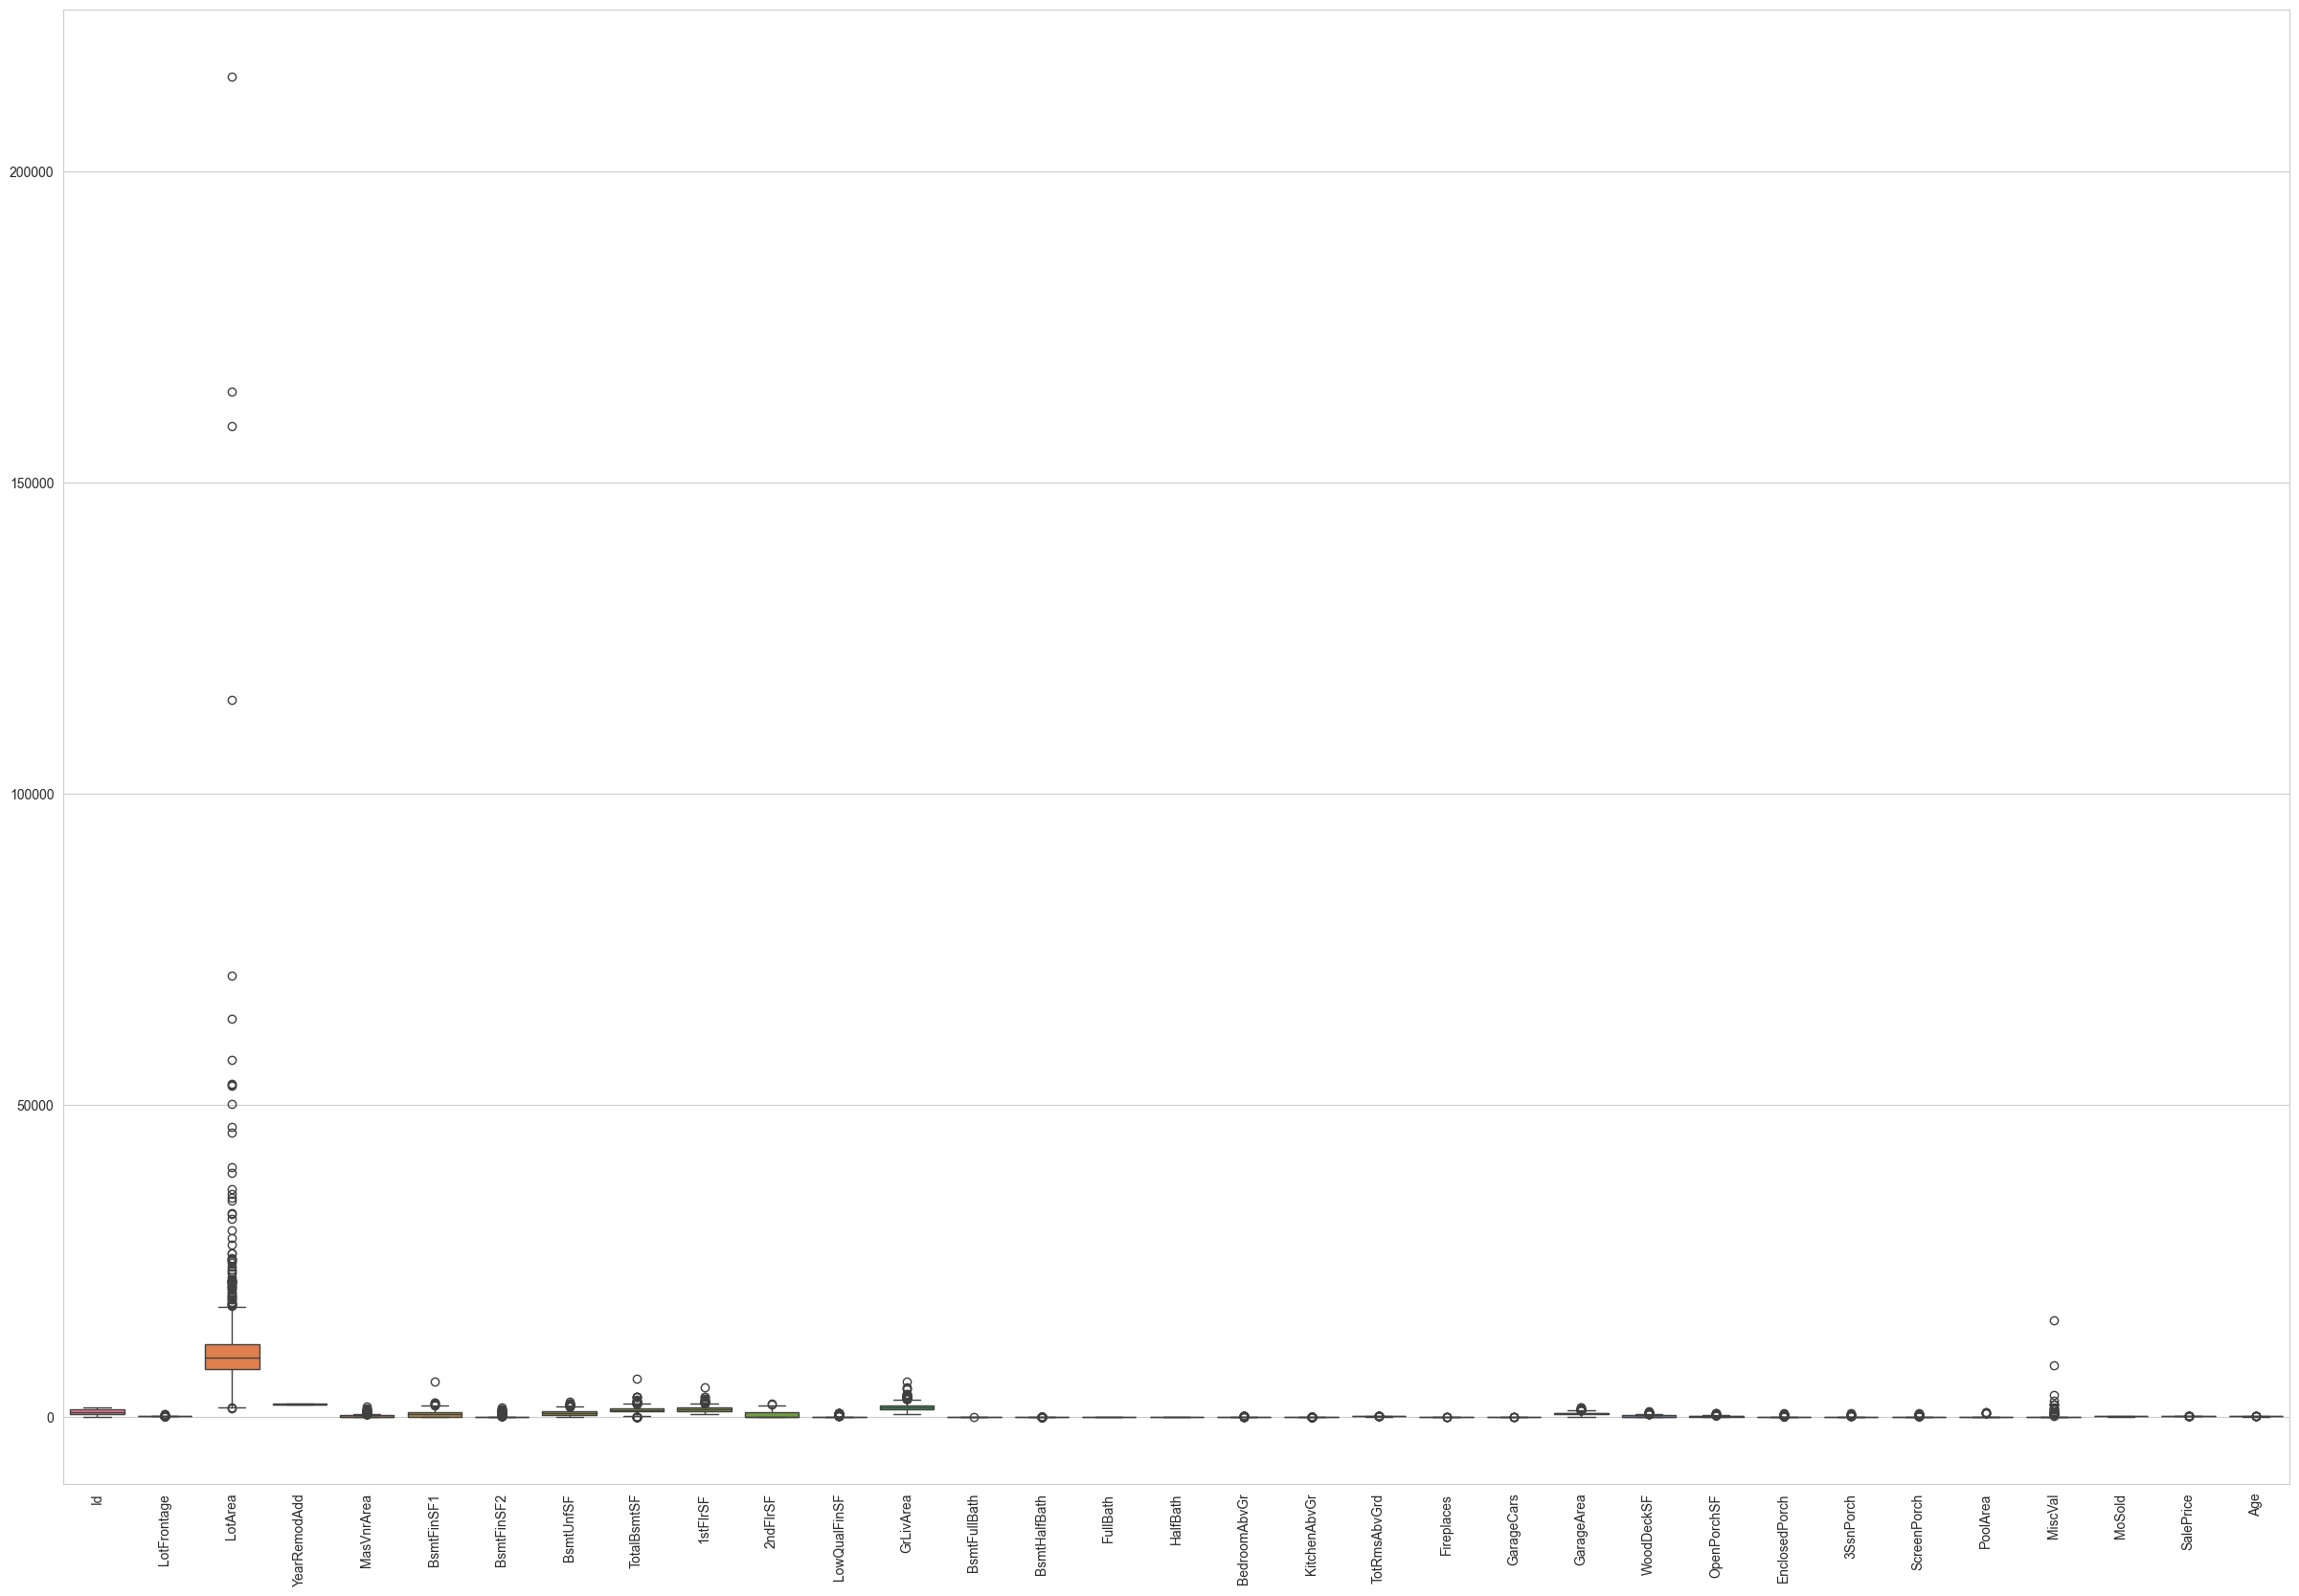

In [40]:
# EDA: To check boxplots to view outliers in numerical columns:
# To set the figure size:
plt.figure(figsize=[30, 20])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Create boxplots for numerical columns
sns.boxplot(data=df_num)

# Display the plot
plt.show()


In [41]:
# Outlier Handling: Capping outliers to 5% at lower bound and 95% at upper bound:
# To iterate through each numerical column:
for col in df_num.columns:
    # To cap values below 5th percentile:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    
    # To cap values above 95th percentile:
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)


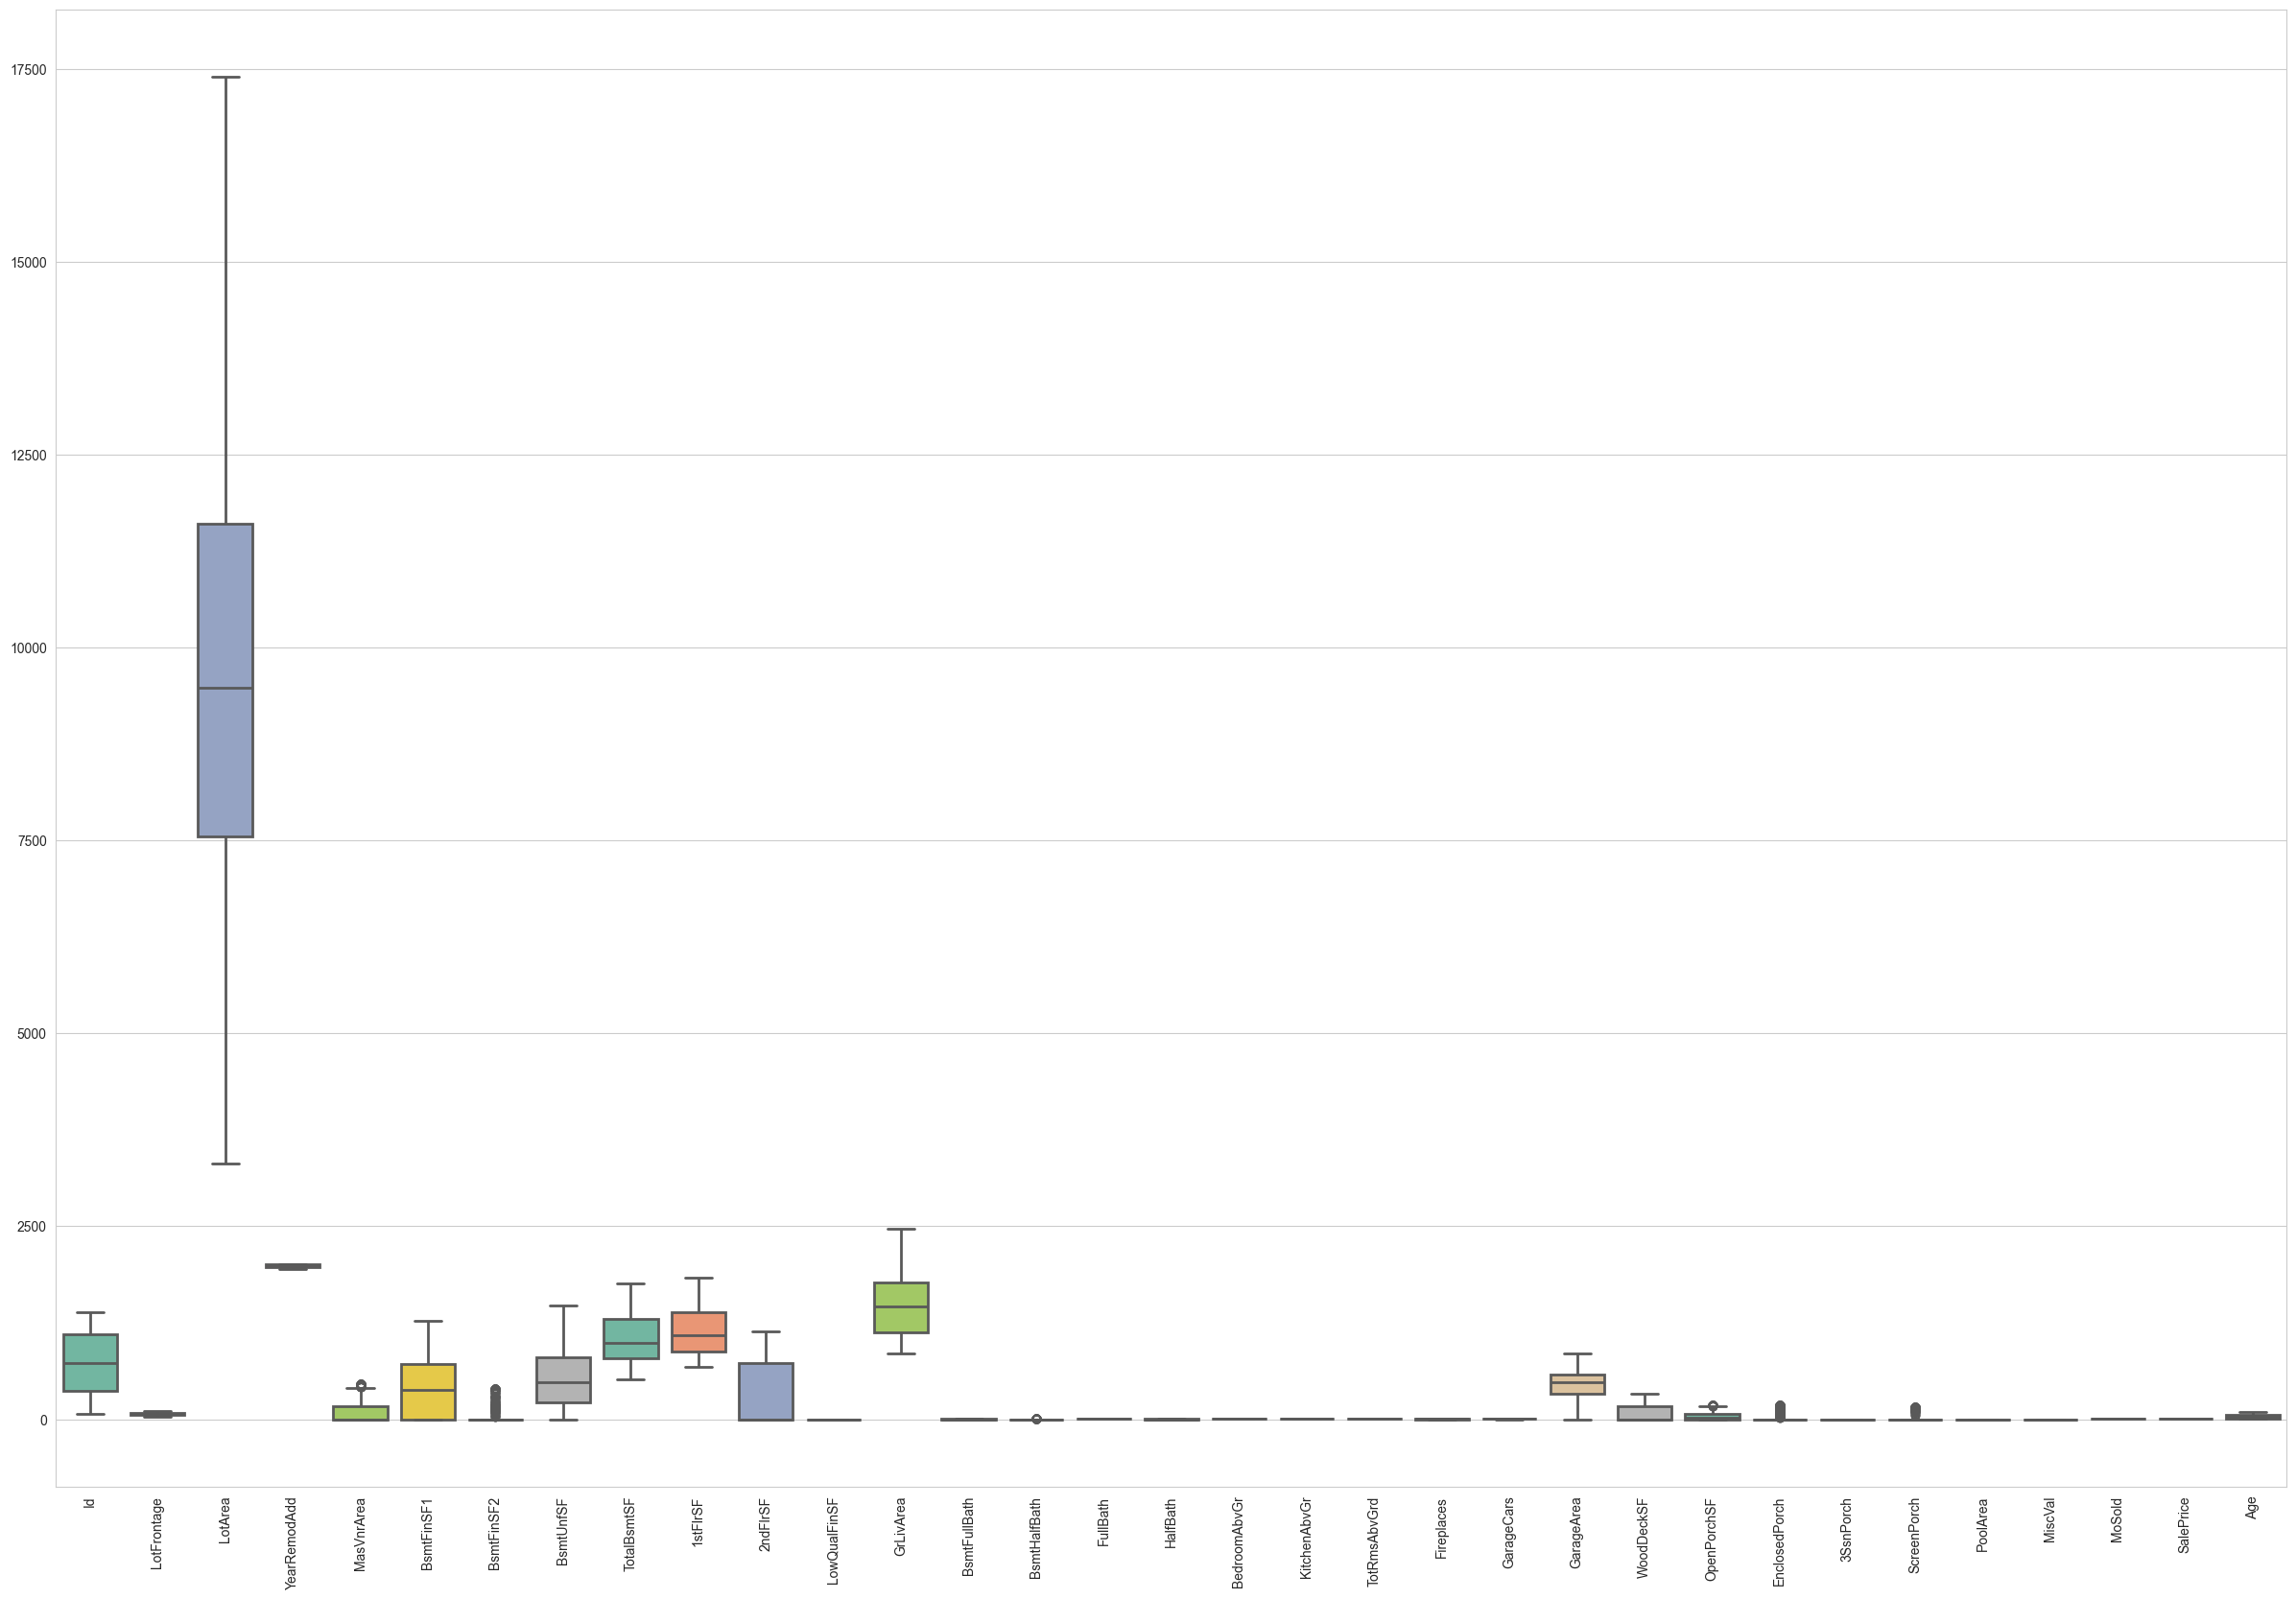

In [42]:
# EDA: To check boxplots again to see if outliers have been treated or not:
# To set the figure size:
plt.figure(figsize=[30, 20])

# To rotate x-axis labels for better readability:
plt.xticks(rotation=90)

# To create boxplots for numerical columns after outlier treatment:
sns.boxplot(data=df_num, palette='Set2', linewidth=2)

# To display the plot:
plt.show()

#### Observations: All outliers have been eliminated from the dataset's numerical columns.

In [43]:
# To concatenate outlier-treated numerical columns with one-hot encoded categorical columns:
# To concatenate along the columns:
df = pd.concat([df_num, df_cat_var_encoded], axis=1)

# Display the first few rows of the resulting DataFrame
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5          False          False          False   
1       5  12.109011   31          False          False          False   
2       9  12.317167    7          False          False          False   
3       2  11.849398   91          False          False          False   
4      11  12.429216    8          False          False          False   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0          False           True          False          False          False   
1          False          False          False          False          False   
2          False           True          False          False          False   
3          False          False           True          False          False   
4          False           True          False          False          False   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0          False          False           False           False   
1          False          False           False           False   
2          False          False           False           False   
3          False          False           False           False   
4          False          False           False           False   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0           False           False        False        False         True   
1           False           False        False        False         True   
2           False           False        False        False         True   
3           False           False        False        False         True   


#### Observations: The dataframe is now prepared for model building.

### Model Building, Tuning and Evaluation:

#### Splitting the Data into Dependent and Independent variables:

In [44]:
# To define X with all independent variables for predictions, excluding 'Id' and 'SalePrice':
# To drop 'Id' and 'SalePrice' columns:
X = df.drop(["Id", "SalePrice"], axis=1).copy()

# To display the first few rows of the independent variables DataFrame:
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False          False          False          False           True   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3           True          False          False          False          False   
4          False          False          False          False          False   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        False        False         True        False         True   
1        False        False         True        False         True   
2        False        False         True        False         True   
3        Fals

In [45]:
# To separate the target variable 'SalePrice' as y:
# To extract 'SalePrice' column
y = df["SalePrice"].copy()

# Display the first few values of the target variable y:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Splitting the Data into Training and Testing Sets:

In [46]:
# To split X and y into 80% train data and 20% test data:
# Using train_test_split function from scikit-learn:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [47]:
# To display dimensions of the training data:
# To print the shape of X_train (features in the training set):
print("Shape of X_train:", X_train.shape)

# Print the shape of y_train (target variable in the training set):
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1168, 384)
Shape of y_train: (1168,)


In [48]:
# To display dimensions of the test data:
# To print the shape of X_test (features in the test set):
print("Shape of X_test:", X_test.shape)

# To print the shape of y_test (target variable in the test set):
print("Shape of y_test:", y_test.shape)

Shape of X_test: (292, 384)
Shape of y_test: (292,)


### Scaling:

In [49]:
# To identify numerical columns for scaling:
# To extract numerical columns from the training set:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Display the list of numerical columns:
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [50]:
# Feature Scaling: To create a scaling instance and scale numerical columns:
# To create a StandardScaler instance:
scaler = StandardScaler()

# To fit and transform numerical columns in the training set:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# To transform numerical columns in the test set using the same scaler:
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Building Model 1: Ridge Regression

In [51]:
# Creating function for calculations:
'''
    To evaluate regression model performance and display various metrics.

    Parameters:
    - y_true_train : True values of the target variable for the training set.
    - y_pred_train : Predicted values of the target variable for the training set.
    - y_true_test : True values of the target variable for the test set.
    - y_pred_test : Predicted values of the target variable for the test set.

    Returns:
    - metrics (list): A list containing the following metrics:
      1. R-Squared (Train)
      2. R-Squared (Test)
      3. Residual Sum of Squares (Train)
      4. Residual Sum of Squares (Test)
      5. Mean Squared Error (Train)
      6. Mean Squared Error (Test)
      7. Root Mean Squared Error (Train)
      8. Root Mean Squared Error (Test)
'''

def show_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test):
    
    # To initialize an empty list to store metrics:
    metrics = []

    # For R-squared of train and test data:
    r2_train = r2_score(y_true_train, y_pred_train)
    r2_test = r2_score(y_true_test, y_pred_test)
    metrics.extend([r2_train, r2_test])

    # For Residual Sum of Squares of train and test data:
    rss_train = np.sum(np.square(y_true_train - y_pred_train))
    rss_test = np.sum(np.square(y_true_test - y_pred_test))
    metrics.extend([rss_train, rss_test])

    # For Mean Squared Error of train and test data:
    mse_train = mean_squared_error(y_true_train, y_pred_train)
    mse_test = mean_squared_error(y_true_test, y_pred_test)
    metrics.extend([mse_train, mse_test])

    # For Root Mean Squared Error for train and test data:
    rmse_train = mse_train**0.5
    rmse_test = mse_test**0.5
    metrics.extend([rmse_train, rmse_test])

    # Print the calculated metrics
    print("R-Squared (Train) =", '%.2f' % r2_train)
    print("R-Squared (Test) =", '%.2f' % r2_test)
    print("Residual Sum of Squares (Train) =", '%.2f' % rss_train)
    print("Residual Sum of Squares (Test) =", '%.2f' % rss_test)
    print("Mean Squared Error (Train) =", '%.2f' % mse_train)
    print("Mean Squared Error (Test) =", '%.2f' % mse_test)
    print("Root Mean Squared Error (Train) =", '%.2f' % rmse_train)
    print("Root Mean Squared Error (Test) =", '%.2f' % rmse_test)

    return metrics


In [52]:
# Ridge Regression with Cross-Validation:
# To define the range of alpha values to be tested:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# To create a Ridge Regression model:
ridge = Ridge()

# To perform cross-validation using GridSearchCV:
ridgeCV = GridSearchCV(estimator=ridge, 
                       param_grid=params, 
                       scoring='neg_mean_absolute_error',  
                       cv=5, 
                       return_train_score=True,
                       verbose=1, 
                       n_jobs=-1)

# To fit the model to the training data:
ridgeCV.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# To check the optimal value of alpha selected by cross-validation:
optimal_alpha = ridgeCV.best_params_['alpha']
print("Optimal value of Alpha:", optimal_alpha)

Optimal value of Alpha: 10.0


#### Observations: With the optimal alpha value identified as 10, we will proceed to construct a Ridge Regression model using this parameter.

In [54]:
# To check the results of the cross-validation search:
cross_val_results = ridgeCV.cv_results_
cross_val_results

{'mean_fit_time': array([0.05579224, 0.05936203, 0.0674674 , 0.05612354, 0.05707955,
        0.05758123, 0.0568409 , 0.05572772, 0.06370988, 0.06424446,
        0.06219182, 0.05929542, 0.05946584, 0.05488052, 0.06276755,
        0.06165209, 0.06899414, 0.07185111, 0.06168752, 0.0592011 ,
        0.05938969, 0.0651371 , 0.05817161, 0.05725179, 0.06194921,
        0.06460466, 0.06384702, 0.04962821]),
 'std_fit_time': array([0.01142332, 0.02202401, 0.02069884, 0.01142139, 0.00907602,
        0.00256398, 0.00747754, 0.00446594, 0.00409469, 0.00993276,
        0.00309568, 0.00556182, 0.00890452, 0.00287739, 0.00280383,
        0.00570121, 0.00349851, 0.01151024, 0.00494059, 0.00465576,
        0.00365283, 0.00562856, 0.00222598, 0.00463586, 0.00653456,
        0.00576133, 0.00976069, 0.00355529]),
 'mean_score_time': array([0.01054568, 0.0107214 , 0.00974121, 0.01034784, 0.01162744,
        0.01172156, 0.00996618, 0.01170015, 0.01014924, 0.01566339,
        0.0102911 , 0.0096168 , 0.009545

In [55]:
# To create a Ridge Regression instance with the optimal value of alpha:
optimal_alpha = 10
ridge_model = Ridge(alpha=optimal_alpha)

In [56]:
# To fit the Ridge Regression model on the training data:
ridge.fit(X_train, y_train)

Ridge()

In [57]:
# To check the coefficients of the Ridge Regression fitted model:
ridge_coefficients = ridge.coef_
ridge_coefficients

array([ 6.93638612e-03,  2.00770962e-02,  2.08338453e-02, -2.41644786e-03,
       -4.74096239e-03, -7.86218673e-03, -2.68277011e-02,  6.44093294e-02,
       -9.48405952e-03,  2.03943830e-02,  0.00000000e+00,  1.08530669e-01,
        8.12887692e-03, -1.02330613e-03,  9.96882880e-03,  1.04542857e-02,
        6.04584169e-03,  0.00000000e+00, -2.08345377e-03,  1.87171103e-02,
        1.35879338e-02,  1.81093367e-02,  1.29119956e-02,  7.87049723e-03,
        3.03943942e-03,  0.00000000e+00,  1.05626874e-02,  0.00000000e+00,
        0.00000000e+00, -4.24753767e-04, -5.91938823e-02, -6.26666703e-02,
        2.04165535e-05,  2.80510058e-03,  1.37752339e-02, -3.39187709e-03,
        3.39521018e-02,  8.48139953e-02, -2.13440790e-02,  5.03546738e-04,
       -4.86383602e-02, -4.55250852e-04, -5.47501770e-02, -1.41054153e-02,
       -6.16204650e-03,  7.90474875e-02,  5.54554568e-02,  2.84372400e-02,
       -9.19329043e-03, -2.67206550e-02, -1.28925569e-02,  1.68231067e-02,
        6.39471924e-03, -

In [58]:
# To make predictions using the Ridge Regression model:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [59]:
# To check metrics for Ridge Regression predictions:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.91
Residual Sum of Squares (Train) = 7.05
Residual Sum of Squares (Test) = 3.66
Mean Squared Error (Train) = 0.01
Mean Squared Error (Test) = 0.01
Root Mean Squared Error (Train) = 0.08
Root Mean Squared Error (Test) = 0.11


### Let's check the R2 Score against various alpha values for both the training and test sets.

In [60]:
# To create a DataFrame to store Ridge Cross-Validation results:
# To extract and organize the results from cross-validation:
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)

# to display the DataFrame containing Ridge Cross-Validation results:
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.055792      0.011423         0.010546        0.001620      0.0001   
1        0.059362      0.022024         0.010721        0.003243       0.001   
2        0.067467      0.020699         0.009741        0.001802        0.01   
3        0.056124      0.011421         0.010348        0.002204        0.05   
4        0.057080      0.009076         0.011627        0.003560         0.1   
5        0.057581      0.002564         0.011722        0.004977         0.2   
6        0.056841      0.007478         0.009966        0.001684         0.3   
7        0.055728      0.004466         0.011700        0.000662         0.4   
8        0.063710      0.004095         0.010149        0.001084         0.5   
9        0.064244      0.009933         0.015663        0.005412         0.6   
10       0.062192      0.003096         0.010291        0.001168         0.7   
11       0.059295      0.005562         0.009617        0.001356         0.8   
12       0.059466      0.008905         0.009546        0.001064         0.9   
13       0.054881      0.002877         0.011604        0.003198         1.0   
14       0.062768      0.002804         0.011354        0.002681         2.0   
15       0.061652      0.005701         0.009838        0.000941         3.0   
16       0.068994      0.003499         0.012158        0.002763         4.0   
17       0.071851      0.011510         0.008982        0.001482         5.0   
18       0.061688      0.004941         0.010058        0.002079         6.0   
19       0.059201      0.004656         0.013001        0.005744         7.0   
20       0.059390      0.003653         0.009601        0.001588         8.0   
21       0.065137      0.005629         0.012591        0.004648         9.0   
22       0.058172      0.002226         0.011782        0.002921        10.0   
23       0.057252      0.004636         0.011904        0.003193          20   
24       0.061949      0.006535         0.009933        0.000738          50   
25       0.064605      0.005761         0.010994        0.002945         100   
26       0.063847      0.009761         0.008974        0.001252         500   
27       0.049628      0.003555         0.006273        0.001685        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081673          -0.101828   
1    {'alpha': 0.001}          -0.081586          -0.100936   
2     {'alpha': 0.01}          -0.080603          -0.098118   
3     {'alpha': 0.05}          -0.080104          -0.094781   
4      {'alpha': 0.1}          -0.079578          -0.092349   
5      {'alpha': 0.2}          -0.078602          -0.089576   
6      {'alpha': 0.3}          -0.077658          -0.087865   
7      {'alpha': 0.4}          -0.076766          -0.086746   
8      {'alpha': 0.5}          -0.075957          -0.085866   
9      {'alpha': 0.6}          -0.075217          -0.085126   
10     {'alpha': 0.7}          -0.074599          -0.084513   
11     {'alpha': 0.8}          -0.074151          -0.084037   
12     {'alpha': 0.9}          -0.073747          -0.083640   
13     {'alpha': 1.0}          -0.073381          -0.083293   
14     {'alpha': 2.0}          -0.070959          -0.081103   
15     {'alpha': 3.0}          -0.069506          -0.080140   
16     {'alpha': 4.0}          -0.068657          -0.079670   
17     {'alpha': 5.0}          -0.068032          -0.079504   
18     {'alpha': 6.0}          -0.067567          -0.079530   
19     {'alpha': 7.0}          -0.067257          -0.079612   
20     {'alpha': 8.0}          -0.067030          -0.079713   
21     {'alpha': 9.0}          -0.066859          -0.079824   
22    {'alpha': 10.0}          -0.066765          -0.079957   
23      {'alpha': 20}          -0.067106          -0.081396   
24      {'alpha': 50}          -0.070718          -0.085138   
25     {'alpha': 100}          -0.074230     

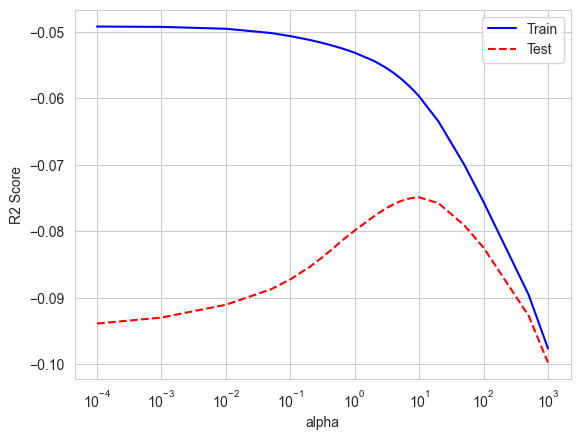

In [61]:
# Plotting R2 score vs alpha values for Ridge Regression:
# To plot R2 scores for the training set with a blue solid line:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train', color='blue', linestyle='-')

# To plot R2 scores for the test set with a red dashed line:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test', color='red', linestyle='--')

# To set plot labels and legend:
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.xscale('log')  # Using log scale for better visualization of alpha values.
plt.legend()

# To display the plot:
plt.show()

#### Observations: When alpha goes up, training error goes down, and we observe an initial increase followed by a decrease in test error.The graph also clearly indicates that the optimal alpha value is 10.

### Building Model 2: Lasso Regression:

In [62]:
# Lasso Regression with Cross-Validation:
# Defining the range of alpha values to be tested:
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                           2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# To create a Lasso Regression model:
lasso_model = Lasso()

# Perform cross-validation using GridSearchCV
lassoCV = GridSearchCV(estimator=lasso_model,
                       param_grid=lasso_params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1,
                       n_jobs=-1)

# To fit the model to the training data:
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# To find the optimal value of alpha selected by Lasso cross-validation:
optimal_alpha_lasso = lassoCV.best_params_['alpha']
print("The Optimal Vale of Alpha for Lasso:", optimal_alpha_lasso)

The Optimal Vale of Alpha for Lasso: 0.001


#### Observations: The optimal alpha value is determined to be 0.001. We will construct a lasso regression model using this value.

In [64]:
# To check the results of Lasso cross-validation search:
# To extract and organize the results from Lasso cross-validation:
lassoCV_results = pd.DataFrame(lassoCV.cv_results_)

# To display the DataFrame containing Lasso cross-validation results:
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.186333      0.037906         0.009820        0.001050      0.0001   
1        0.100770      0.028805         0.016990        0.016640       0.001   
2        0.068004      0.009614         0.007624        0.000852        0.01   
3        0.088831      0.017719         0.008519        0.001344        0.05   
4        0.077502      0.012479         0.011707        0.001992         0.1   
5        0.081219      0.013857         0.017272        0.008494         0.2   
6        0.080773      0.010186         0.013579        0.001789         0.3   
7        0.091852      0.009236         0.012040        0.001914         0.4   
8        0.089161      0.013430         0.012518        0.003333         0.5   
9        0.079642      0.003544         0.009828        0.000978         0.6   
10       0.070398      0.004588         0.012325        0.002399         0.7   
11       0.081462      0.009561         0.017772        0.011751         0.8   
12       0.072805      0.005121         0.011673        0.001548         0.9   
13       0.070951      0.006279         0.011705        0.004481         1.0   
14       0.072217      0.009088         0.012224        0.001962         2.0   
15       0.070439      0.009959         0.013739        0.006970         3.0   
16       0.079835      0.008146         0.015347        0.008313         4.0   
17       0.084563      0.014900         0.012269        0.002678         5.0   
18       0.083776      0.008197         0.010522        0.001413         6.0   
19       0.090152      0.005393         0.010925        0.002421         7.0   
20       0.078347      0.007586         0.016034        0.007181         8.0   
21       0.069482      0.002178         0.009693        0.001163         9.0   
22       0.071366      0.007277         0.012589        0.003681        10.0   
23       0.077780      0.008069         0.011477        0.002051          20   
24       0.083940      0.016139         0.009922        0.000520          50   
25       0.079991      0.004256         0.012371        0.002828         100   
26       0.085483      0.004479         0.010394        0.001192         500   
27       0.058996      0.006424         0.006070        0.001860        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069359          -0.081482   
1    {'alpha': 0.001}          -0.068861          -0.081934   
2     {'alpha': 0.01}          -0.091298          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

In [65]:
# Create a Lasso Regression instance with the optimal value of alpha
optimal_alpha_lasso = 0.001
lasso = Lasso(alpha=optimal_alpha_lasso)

In [66]:
# To fit the Lasso Regression model on the training data:
# To instantiate the Lasso Regression model:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [67]:
# To view the coefficients of the Lasso Regression fitted model:
# To extract and display the coefficients:
lasso_coefficients = lasso.coef_
lasso_coefficients

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [68]:
# Making predictions using the Lasso Regression model:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [69]:
# To check metrics for Lasso Regression predictions:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
Residual Sum of Squares (Train) = 11.29
Residual Sum of Squares (Test) = 2.92
Mean Squared Error (Train) = 0.01
Mean Squared Error (Test) = 0.01
Root Mean Squared Error (Train) = 0.10
Root Mean Squared Error (Test) = 0.10


#### We will check the R2 Score against different alpha values for both the training and test sets.

In [70]:
# To create a DataFrame to store Lasso Cross-Validation results:
# To extract and organize the results from Lasso cross-validation:
lassoCV_results = pd.DataFrame(lassoCV.cv_results_)

# To display the DataFrame containing Lasso Cross-Validation results:
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.186333      0.037906         0.009820        0.001050      0.0001   
1        0.100770      0.028805         0.016990        0.016640       0.001   
2        0.068004      0.009614         0.007624        0.000852        0.01   
3        0.088831      0.017719         0.008519        0.001344        0.05   
4        0.077502      0.012479         0.011707        0.001992         0.1   
5        0.081219      0.013857         0.017272        0.008494         0.2   
6        0.080773      0.010186         0.013579        0.001789         0.3   
7        0.091852      0.009236         0.012040        0.001914         0.4   
8        0.089161      0.013430         0.012518        0.003333         0.5   
9        0.079642      0.003544         0.009828        0.000978         0.6   
10       0.070398      0.004588         0.012325        0.002399         0.7   
11       0.081462      0.009561         0.017772        0.011751         0.8   
12       0.072805      0.005121         0.011673        0.001548         0.9   
13       0.070951      0.006279         0.011705        0.004481         1.0   
14       0.072217      0.009088         0.012224        0.001962         2.0   
15       0.070439      0.009959         0.013739        0.006970         3.0   
16       0.079835      0.008146         0.015347        0.008313         4.0   
17       0.084563      0.014900         0.012269        0.002678         5.0   
18       0.083776      0.008197         0.010522        0.001413         6.0   
19       0.090152      0.005393         0.010925        0.002421         7.0   
20       0.078347      0.007586         0.016034        0.007181         8.0   
21       0.069482      0.002178         0.009693        0.001163         9.0   
22       0.071366      0.007277         0.012589        0.003681        10.0   
23       0.077780      0.008069         0.011477        0.002051          20   
24       0.083940      0.016139         0.009922        0.000520          50   
25       0.079991      0.004256         0.012371        0.002828         100   
26       0.085483      0.004479         0.010394        0.001192         500   
27       0.058996      0.006424         0.006070        0.001860        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069359          -0.081482   
1    {'alpha': 0.001}          -0.068861          -0.081934   
2     {'alpha': 0.01}          -0.091298          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

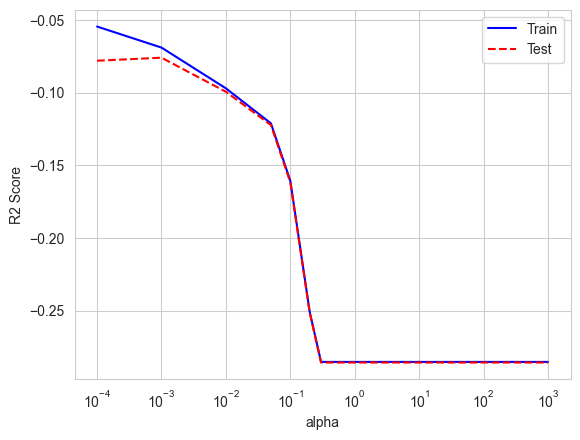

In [71]:
# Plotting R2 score vs alpha values for Lasso Regression:
# To plot R2 scores for the training set with a blue solid line:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train', color='blue', linestyle='-')

# To plot R2 scores for the test set with a red dashed line:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test', color='red', linestyle='--')

# To set plot labels and legend:
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.xscale('log')  # Using log scale for better visualization of alpha values.
plt.legend()

# To display the plot:
plt.show()

#### Observations: As alpha increases, there is a reduction in both training and test errors. However, once the error reaches around 0.05, it stops changing and stays constant.

### Models Comparison:

In [72]:
# To set the float display options in Pandas to show two decimal places:
pd.options.display.float_format = "{:,.2f}".format

In [73]:
# Creating a table which contains all the metrics for Ridge and Lasso Regression:
# Defining the metrics and their corresponding values for Ridge and Lasso:
lr_table = {
    'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
               'MSE (Train)', 'MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
    'Ridge Regression': ridge_metrics,
    'Lasso Regression': lasso_metrics
}

# To create a DataFrame with the metrics table:
final_metric = pd.DataFrame(lr_table, columns=['Metric', 'Ridge Regression', 'Lasso Regression'])

# To set the index to 'Metric':
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.95              0.92
R2 Score (Test)               0.91              0.93
RSS (Train)                   7.05             11.29
RSS (Test)                    3.66              2.92
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.08              0.10
RMSE (Test)                   0.11              0.10

#### Observations: For Ridge Regression and Lasso models, the R2 score on the test data is 0.91 and 0.93 respectively. R2 score on the test data in Lasso model is slightly more than Rigid and the gap between training and testing scores is  lower.

In [74]:
# To check the changes in coefficients after regularization:
# To create an empty DataFrame with all the independent variables as indices:
betas = pd.DataFrame(index=X.columns)
betas.index = X.columns

# Display the DataFrame
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [75]:
# Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients:
# To add Ridge coefficients to the 'Ridge' column:
betas['Ridge'] = ridge.coef_

# To add Lasso coefficients to the 'Lasso' column:
betas['Lasso'] = lasso.coef_

# To display the DataFrame with Ridge and Lasso coefficients:
betas

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.02   0.03
MasVnrArea             -0.00  -0.00
BsmtFinSF1             -0.00   0.03
BsmtFinSF2             -0.01   0.00
BsmtUnfSF              -0.03  -0.00
TotalBsmtSF             0.06   0.04
1stFlrSF               -0.01  -0.00
2ndFlrSF                0.02   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.11   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.01
HalfBath                0.01   0.01
BedroomAbvGr            0.01   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd           -0.00  -0.00
Fireplaces              0.02   0.02
GarageCars              0.01   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
Age                    -0.06  -0.05
MSSubClass_30          -0.06  -0.00
MSSubClass_40           0.00   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50           0.01   0.00
MSSubClass_60          -0.00  -0.00
MSSubClass_70           0.03   0.03
MSSubClass_75           0.08   0.00
MSSubClass_80          -0.02   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.05  -0.02
MSSubClass_120         -0.00   0.00
MSSubClass_160         -0.05  -0.04
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.01  -0.00
MSZoning_FV             0.08   0.00
MSZoning_RH             0.06   0.00
MSZoning_RL             0.03   0.00
MSZoning_RM            -0.01  -0.04
Street_Pave            -0.03  -0.00
Alley_None             -0.01  -0.00
Alley_Pave              0.02   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LotShape_Reg            0.00  -0.00
LandContour_HLS         0.05   0.00
LandContour_Low         0.04   0.00
LandContour_Lvl         0.04  -0.00
Utilities_NoSeWa       -0.08  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.03  -0.00
LotConfig_FR3          -0.03  -0.00
LotConfig_Inside       -0.00   0.00
LandSlope_Mod          -0.01   0.00
LandSlope_Sev           0.09   0.00
Neighborhood_Blueste   -0.03  -0.00
Neighborhood_BrDale     0.02  -0.00
Neighborhood_BrkSide    0.05   0.03
Neighborhood_ClearCr    0.04   0.00
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Crawfor    0.10   0.09
Neighborhood_Edwards   -0.05  -0.03
Neighborhood_Gilbert   -0.00  -0.00
Neighborhood_IDOTRR     0.02   0.00
Neighborhood_MeadowV   -0.13  -0.03
Neighborhood_Mitchel   -0.04  -0.00
Neighborhood_NAmes     -0.04  -0.00
Neighborhood_NPkVill    0.02   0.00
Neighborhood_NWAmes    -0.03  -0.00
Neighborhood_NoRidge    0.02   0.00
Neighborhood_NridgHt    0.04   0.02
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.03   0.00
Neighborhood_Sawyer    -0.02  -0.00
Neighborhood_SawyerW   -0.03  -0.00
Neighborhood_Somerst    0.01   0.04
Neighborhood_StoneBr    0.07   0.01
Neighborhood_Timber     0.02   0.00
Neighborhood_Veenker    0.03   0.00
Condition1_Feedr        0.02  -0.00
Condition1_Norm         0.05   0.04
Condition1_PosA         0.03   0.00
Condition1_PosN         0.05   0.00
Condition1_RRAe        -0.04  -0.00
Condition1_RRAn         0.04   0.00
Condition1_RRNe         0.03   0.00
Condition1_RRNn         0.08   0.00
Condition2_Feedr        0.00  -0.00
Condition2_Norm         0.06   0.00
Condition2_PosA         0.19   0.00
Condition2_PosN        -0.11  -0.00
Condition2_RRAe        -0.02  -0.00
Condition2_RRAn        -0.05  -0.00
Condition2_RRNn         0.05   0.00
BldgType_2fmCon        -0.03  -0.00
BldgType_Duplex        -0.05  -0.03
BldgType_Twnhs         -0.05  -0.01
BldgType_TwnhsE        -0.02  -0.00
HouseStyle_1.5Unf       0.03   0.00
HouseStyle_1Story       0.05  -0.00
HouseStyle_2.5Fin      -0.0

In [76]:
# To check the features removed by Lasso:
# To extract and display the features removed by Lasso:
removed_features_lasso = betas[betas['Lasso'] == 0]
removed_features_lasso

Ridge  Lasso
MasVnrArea             -0.00  -0.00
BsmtUnfSF              -0.03  -0.00
1stFlrSF               -0.01  -0.00
LowQualFinSF            0.00   0.00
BsmtHalfBath           -0.00   0.00
BedroomAbvGr            0.01   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd           -0.00  -0.00
3SsnPorch               0.00   0.00
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MSSubClass_40           0.00   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50           0.01   0.00
MSSubClass_60          -0.00  -0.00
MSSubClass_75           0.08   0.00
MSSubClass_80          -0.02   0.00
MSSubClass_85           0.00   0.00
MSSubClass_120         -0.00   0.00
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.01  -0.00
MSZoning_RH             0.06   0.00
MSZoning_RL             0.03   0.00
Street_Pave            -0.03  -0.00
Alley_None             -0.01  -0.00
Alley_Pave              0.02   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LandContour_HLS         0.05   0.00
LandContour_Low         0.04   0.00
LandContour_Lvl         0.04  -0.00
Utilities_NoSeWa       -0.08  -0.00
LotConfig_FR2          -0.03  -0.00
LotConfig_FR3          -0.03  -0.00
LotConfig_Inside       -0.00   0.00
LandSlope_Mod          -0.01   0.00
LandSlope_Sev           0.09   0.00
Neighborhood_Blueste   -0.03  -0.00
Neighborhood_BrDale     0.02  -0.00
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Gilbert   -0.00  -0.00
Neighborhood_IDOTRR     0.02   0.00
Neighborhood_Mitchel   -0.04  -0.00
Neighborhood_NAmes     -0.04  -0.00
Neighborhood_NPkVill    0.02   0.00
Neighborhood_NWAmes    -0.03  -0.00
Neighborhood_NoRidge    0.02   0.00
Neighborhood_SWISU      0.03   0.00
Neighborhood_Sawyer    -0.02  -0.00
Neighborhood_SawyerW   -0.03  -0.00
Neighborhood_Timber     0.02   0.00
Neighborhood_Veenker    0.03   0.00
Condition1_Feedr        0.02  -0.00
Condition1_PosA         0.03   0.00
Condition1_PosN         0.05   0.00
Condition1_RRAe        -0.04  -0.00
Condition1_RRAn         0.04   0.00
Condition1_RRNe         0.03   0.00
Condition1_RRNn         0.08   0.00
Condition2_Feedr        0.00  -0.00
Condition2_Norm         0.06   0.00
Condition2_PosA         0.19   0.00
Condition2_PosN        -0.11  -0.00
Condition2_RRAe        -0.02  -0.00
Condition2_RRAn        -0.05  -0.00
Condition2_RRNn         0.05   0.00
BldgType_2fmCon        -0.03  -0.00
BldgType_TwnhsE        -0.02  -0.00
HouseStyle_1.5Unf       0.03   0.00
HouseStyle_1Story       0.05  -0.00
HouseStyle_2.5Fin      -0.00   0.00
HouseStyle_2.5Unf      -0.03   0.00
HouseStyle_SFoyer       0.04   0.00
HouseStyle_SLvl         0.06   0.00
OverallQual_2          -0.02  -0.00
OverallQual_6           0.00   0.00
OverallQual_10         -0.01  -0.00
OverallCond_2          -0.10  -0.00
OverallCond_6           0.04   0.00
RoofStyle_Gable        -0.04  -0.00
RoofStyle_Gambrel      -0.04   0.00
RoofStyle_Hip          -0.05  -0.00
RoofStyle_Mansard       0.03   0.00
RoofStyle_Shed         -0.01   0.00
RoofMatl_CompShg        0.08  -0.00
RoofMatl_Membran        0.00   0.00
RoofMatl_Metal         -0.01   0.00
RoofMatl_Roll           0.06   0.00
RoofMatl_Tar&Grv        0.10   0.00
RoofMatl_WdShake        0.05   0.00
RoofMatl_WdShngl        0.13   0.00
Exterior1st_AsphShn     0.00  -0.00
Exterior1st_BrkComm    -0.05  -0.00
Exterior1st_CBlock     -0.03  -0.00
Exterior1st_CemntBd    -0.03  -0.00
Exterior1st_HdBoard    -0.02  -0.00
Exterior1st_ImStucc    -0.02   0.00
Exterior1st_Plywood    -0.01  -0.00
Exterior1st_Stone       0.02   0.00
Exterior1st_Stucco      0.01   0.00
Exterior1st_VinylSd    -0.01   0.00
Exterior1st_Wd Sdng    -0.04  -0.00
Exterior1st_WdShing    -0.02  -0.00
Exterior2nd_AsphShn     0.00   0.00
Exterior2nd_Brk Cmn     0.00   0.00
Exterior2nd_BrkFace    -0.02   0.00
Exterior2nd_CBlock     -0.03  -0.00
Exterior2nd_CmentBd     0.03  -0.00
Exterior2nd_HdBoard    -0.01  -0.00
Exterior2nd_ImStucc     0.03  -0.00
Exterior2nd_MetalSd    -0.0

In [77]:
# Count the number of features removed by Lasso
removed_features_count = betas[betas['Lasso'] == 0].shape[0]

# Display the count of features removed
removed_features_count

306

#### Observations: Lasso has eliminated 306 out of the initial 384 features from X_train. Following are the features selected by Lasso:

In [78]:
# To display the features selected by Lasso:
selected_features_lasso = betas.loc[betas['Lasso'] != 0, 'Lasso']
selected_features_lasso

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
TotalBsmtSF              0.04
2ndFlrSF                 0.01
GrLivArea                0.11
BsmtFullBath             0.01
FullBath                 0.01
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.02
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
MoSold                  -0.00
Age                     -0.05
MSSubClass_30           -0.00
MSSubClass_70            0.03
MSSubClass_90           -0.02
MSSubClass_160          -0.04
MSZoning_FV              0.00
MSZoning_RM             -0.04
LotShape_Reg            -0.00
LotConfig_CulDSac        0.02
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.00
Neighborhood_Crawfor     0.09
Neighborhood_Edwards    -0.03
Neighborhood_MeadowV    -0.03
Neighborho

#### Next, let's examine the top 10 features that hold significance in predicting the value of a house, as identified by both the Ridge and Lasso models.

In [79]:
# Assuming 'betas' is a DataFrame containing coefficients from Ridge regression:
# To check the top 10 coefficients of Ridge regression in descending order:
top_10_ridge_coefficients = betas['Ridge'].sort_values(ascending=False)[:10]

# Print or use the result as needed
print("Top 10 Ridge Coefficients:")
print(top_10_ridge_coefficients)

Top 10 Ridge Coefficients:
SaleCondition_Alloca   0.20
Condition2_PosA        0.19
RoofMatl_WdShngl       0.13
OverallCond_9          0.12
GrLivArea              0.11
OverallQual_9          0.11
RoofMatl_Tar&Grv       0.10
Neighborhood_Crawfor   0.10
SaleType_Oth           0.09
LandSlope_Sev          0.09
Name: Ridge, dtype: float64


In [80]:
# Assuming 'betas' is a DataFrame containing coefficients from Ridge regression:
# To interpret the ridge coefficients in terms of the target, take the inverse log (e to the power) of betas:
ridge_coeffs_exp = np.exp(betas['Ridge'])

# To check the top 10 interpreted Ridge coefficients in descending order:
top_10_interpreted_ridge_coeffs = ridge_coeffs_exp.sort_values(ascending=False)[:10]

# To print or use the result as needed:
print("Top 10 Interpreted Ridge Coefficients:")
print(top_10_interpreted_ridge_coeffs)

Top 10 Interpreted Ridge Coefficients:
SaleCondition_Alloca   1.22
Condition2_PosA        1.21
RoofMatl_WdShngl       1.14
OverallCond_9          1.12
GrLivArea              1.11
OverallQual_9          1.11
RoofMatl_Tar&Grv       1.11
Neighborhood_Crawfor   1.10
SaleType_Oth           1.09
LandSlope_Sev          1.09
Name: Ridge, dtype: float64


In [81]:
# To display the top 10 coefficients of Lasso in descending order:
top_lasso_coefficients = betas['Lasso'].sort_values(ascending=False)[:10]

# To display the results:
print("Top 10 Lasso Coefficients:")
print(top_lasso_coefficients)

Top 10 Lasso Coefficients:
OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64


In [82]:
# To interpret the lasso coefficients in terms of the target, we need to take the inverse log (i.e., 10 to the power) of betas:
# To compute the exponential of Lasso coefficients:
lasso_coefficients_exp = np.exp(betas['Lasso'])

# To sort the coefficients in descending order and select the top 10:
top_lasso_coefficients_exp = lasso_coefficients_exp.sort_values(ascending=False)[:10]

# To display the results:
print("Top 10 Lasso Coefficients (interpreted in terms of target):")
print(top_lasso_coefficients_exp)

Top 10 Lasso Coefficients (interpreted in terms of target):
OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64


#### Observations: I select lasso regression for the final model prediction as its R2 score is slightly higher, and the gap between training and testing scores is lower.Additionally, lasso regression offers a simpler model with fewer variables compared to ridge regression.

### Key Findings:
#### The variables significant in predicting the price of a house (Lasso predictors) are: - 
 - OverallQual_9
 - GrLivArea
 - OverallQual_8
 - Neighborhood_Crawfor
 - Exterior1st_BrkFace
 - Functional_Typ
 - CentralAir_Y
 - Neighborhood_Somerst
 - TotalBsmtSF
 - Condition1_Norm        

#### How well those variables describe the price of a house?
We will dicuss only the top few variables here.
- OverallQual_9 & OverallQual_8: If the overall material and finish quality of the house is rated as Very Good or Excellent (scored 9 or 8), the house price is increase.
- GrLivArea: For every additional square foot of above-ground house area, the price is expected to increase.
- Neighborhood_Crawfor: Presence in the Crawford neighborhood is associated with a potential increase in house price.
- Functional_Typ: If the home functionality is deemed typical, the house price is projected to increase.
- Exterior1st_BrkFace: If the exterior covering of the house is Brick Face, it is expected increase in house price.
- Similarly, we can infer the extent to which each variable explains the price of a house.

#### The optimal value of lambda for Ridge Regression is 10 and the optimal value of lambda for Lasso is 0.001.

### Assignment Part-II

### Code to answer the subjective questions:

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer:
#### What is the optimal value of alpha for ridge and lasso regression?
<p style='text-align: justify;'>Lambda discussed here is indicated by alpha in scikit-learn package.
In ridge and lasso regression, lambda (λ) is a regularization parameter that controls the strength of the regularization applied to the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, discouraging overly complex models. The optimal value of lambda for our models are mentioned below:</p>

- The optimal value of lambda for Ridge Regression is 10
- The optimal value of lambda for Lasso is 0.001

#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [83]:
# To build the Ridge regression model with double the value of alpha (alpha = 20):
ridge = Ridge(alpha=20)

# To fit the Ridge model on the training data:
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [84]:
## Making predictions:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [85]:
## Checking metrics:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
Residual Sum of Squares (Train) = 9.37
Residual Sum of Squares (Test) = 2.82
Mean Squared Error (Train) = 0.01
Mean Squared Error (Test) = 0.01
Root Mean Squared Error (Train) = 0.09
Root Mean Squared Error (Test) = 0.10


In [86]:
# Now we will build the lasso model with double value of alpha i.e. 0.002:
lasso = Lasso(alpha=0.002)

# To fit the model on training data:
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [87]:
# Making predictions:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [88]:
## Checking metrics:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
Residual Sum of Squares (Train) = 13.49
Residual Sum of Squares (Test) = 3.45
Mean Squared Error (Train) = 0.01
Mean Squared Error (Test) = 0.01
Root Mean Squared Error (Train) = 0.11
Root Mean Squared Error (Test) = 0.11


In [89]:
# Once more creating a table which contain all the metrics:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.93              0.91
R2 Score (Test)               0.93              0.91
RSS (Train)                   9.37             13.49
RSS (Test)                    2.82              3.45
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.11
RMSE (Test)                   0.10              0.11

#### Changes in Ridge Regression metrics:
- R2 score of train set changed from 0.95 to 0.93
- R2 score of test set changed from 0.91 to 0.93

#### Changes in Lasso Regression metrics:
- R2 score of train set changed from 0.92 to 0.91
- R2 score of test set changed from 0.93 to 0.91

In [90]:
# To check the changes in coefficients after regularization:
# To create an empty dataframe with all the independent variables as indices:
betas = pd.DataFrame(index=X.columns)
# Display the empty dataframe
print("Empty DataFrame with Independent Variables as Indices:")
print(betas)

Empty DataFrame with Independent Variables as Indices:
Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_

In [91]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [92]:
# To display the betas/coefficients:
betas 

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.03   0.04
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.02   0.03
BsmtFinSF2              0.00   0.00
BsmtUnfSF              -0.01  -0.00
TotalBsmtSF             0.05   0.05
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.08   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.00
HalfBath                0.01   0.01
BedroomAbvGr            0.00  -0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd            0.00  -0.00
Fireplaces              0.02   0.03
GarageCars              0.02   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
Age                    -0.05  -0.05
MSSubClass_30          -0.03  -0.00
MSSubClass_40           0.00   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_70           0.04   0.01
MSSubClass_75           0.02   0.00
MSSubClass_80           0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.03  -0.00
MSSubClass_120          0.01   0.00
MSSubClass_160         -0.04  -0.01
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.02  -0.00
MSZoning_FV             0.03   0.00
MSZoning_RH             0.01  -0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.03  -0.03
Street_Pave            -0.00   0.00
Alley_None             -0.00  -0.00
Alley_Pave              0.01   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LotShape_Reg           -0.00  -0.00
LandContour_HLS         0.03   0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.01  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.02   0.00
LotConfig_FR2          -0.01  -0.00
LotConfig_FR3          -0.00   0.00
LotConfig_Inside        0.00   0.00
LandSlope_Mod          -0.00   0.00
LandSlope_Sev           0.02   0.00
Neighborhood_Blueste   -0.00  -0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_BrkSide    0.03   0.00
Neighborhood_ClearCr    0.02   0.00
Neighborhood_CollgCr   -0.01  -0.00
Neighborhood_Crawfor    0.06   0.07
Neighborhood_Edwards   -0.05  -0.03
Neighborhood_Gilbert   -0.01  -0.00
Neighborhood_IDOTRR     0.00   0.00
Neighborhood_MeadowV   -0.05  -0.00
Neighborhood_Mitchel   -0.03  -0.00
Neighborhood_NAmes     -0.02  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.00  -0.00
Neighborhood_NridgHt    0.03   0.00
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.00   0.00
Neighborhood_Sawyer    -0.01  -0.00
Neighborhood_SawyerW   -0.02  -0.00
Neighborhood_Somerst    0.03   0.02
Neighborhood_StoneBr    0.04   0.00
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.00
Condition1_Feedr       -0.01  -0.00
Condition1_Norm         0.03   0.03
Condition1_PosA         0.00   0.00
Condition1_PosN         0.01   0.00
Condition1_RRAe        -0.02  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.01   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.02   0.00
Condition2_PosA         0.02   0.00
Condition2_PosN        -0.02  -0.00
Condition2_RRAe        -0.00  -0.00
Condition2_RRAn        -0.00  -0.00
Condition2_RRNn         0.00   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_Duplex        -0.03  -0.02
BldgType_Twnhs         -0.03  -0.00
BldgType_TwnhsE        -0.01  -0.00
HouseStyle_1.5Unf      -0.00   0.00
HouseStyle_1Story       0.01  -0.00
HouseStyle_2.5Fin       0.0

#### Now, we look at the most important predictor variables after the change is implemented.

In [93]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
OverallQual_8          0.07
OverallQual_9          0.06
Neighborhood_Crawfor   0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.06
OverallCond_9          0.05
TotalBsmtSF            0.05
CentralAir_Y           0.05
OverallCond_7          0.04
Name: Ridge, dtype: float64

In [94]:
# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.08
OverallQual_8          1.07
OverallQual_9          1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Exterior1st_BrkFace    1.06
OverallCond_9          1.06
TotalBsmtSF            1.05
CentralAir_Y           1.05
OverallCond_7          1.04
Name: Ridge, dtype: float64

In [95]:
# To view the top 10 coefficients of Lasso in descending order:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.11
OverallQual_8          0.08
OverallQual_9          0.08
Functional_Typ         0.07
Neighborhood_Crawfor   0.07
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.04
CentralAir_Y           0.04
YearRemodAdd           0.04
Condition1_Norm        0.03
Name: Lasso, dtype: float64

In [96]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual_8          1.09
OverallQual_9          1.08
Functional_Typ         1.07
Neighborhood_Crawfor   1.07
TotalBsmtSF            1.05
Exterior1st_BrkFace    1.05
CentralAir_Y           1.04
YearRemodAdd           1.04
Condition1_Norm        1.03
Name: Lasso, dtype: float64

####  Hence, the most significant predictor variables after doubling the alpha values are:-
- GrLivArea
- OverallQual_8
- OverallQual_9
- Functional_Typ
- Neighborhood_Crawfor
- TotalBsmtSF
- Exterior1st_BrkFace
- YearRemodAdd
- Condition1_Norm 


### Question 2:

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Answer:

<p style='text-align: justify;'>The choice between Ridge and Lasso regression depends on the specific characteristics of our data and the goals of our analysis. Both Ridge and Lasso are regularization techniques used to address the issue of multicollinearity and overfitting in linear regression models by adding a penalty term to the objective function. 
However, they have some differences in terms of how they handle this regularization.

- Generally, if we have too many variables and one of our primary goal is feature selection, then we will use Lasso. 
- If we don't want to get too large coefficients and reduction of coefficient magnitude is one of our prime goals, then we will use Ridge Regression.

In our models, I select lasso regression for the final model prediction as its R2 score is slightly higher, and the gap between training and testing scores is lower. Additionally, lasso regression offers a simpler model with fewer variables compared to ridge regression.</p>


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Answer:

Here, we will drop these top 5 features in Lasso model and build the model again.

- OverallQual_9
- GrLivArea 
- OverallQual_8
- Neighborhood_Crawfor
- Exterior1st_BrkFace

In [97]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [98]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [99]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

#### Observations: we found optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [101]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [102]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [103]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [104]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
Residual Sum of Squares (Train) = 12.75
Residual Sum of Squares (Test) = 3.02
Mean Squared Error (Train) = 0.01
Mean Squared Error (Test) = 0.01
Root Mean Squared Error (Train) = 0.10
Root Mean Squared Error (Test) = 0.10


#### Now, we will find the top 5 predictors:

In [105]:
# Creating a table which contains all the metrics

# Define the metrics and their corresponding values for Lasso Regression
lr_table = {
    'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
               'MSE (Train)', 'MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
    'Lasso Regression': lasso_metrics
}

# Create a DataFrame using the metrics table
final_metric = pd.DataFrame(lr_table, columns=['Metric', 'Lasso Regression'])

# Set 'Metric' column as the index
final_metric.set_index('Metric', inplace=True)

# Display the final metric table
print("Final Metric Table:")
print(final_metric)


Final Metric Table:
                  Lasso Regression
Metric                            
R2 Score (Train)              0.91
R2 Score (Test)               0.92
RSS (Train)                  12.75
RSS (Test)                    3.02
MSE (Train)                   0.01
MSE (Test)                    0.01
RMSE (Train)                  0.10
RMSE (Test)                   0.10


In [106]:
# Now we see the changes in coefficients after regularization

# First, create an empty dataframe with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)

# Alternatively, you can use `betas.index` instead of `betas.rows` to set the index
# betas.index = X_train_dropped.columns

# Display the empty dataframe
print("Empty DataFrame with Independent Variables as Indices:")
print(betas)


Empty DataFrame with Independent Variables as Indices:
Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Nei

In [107]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
# betas['Lasso'] = lasso.coef_

In [108]:
## View the betas/coefficients
betas 

Lasso
LotFrontage             0.00
LotArea                 0.02
YearRemodAdd            0.03
MasVnrArea             -0.00
BsmtFinSF1              0.03
BsmtFinSF2              0.00
BsmtUnfSF              -0.00
TotalBsmtSF             0.05
1stFlrSF                0.07
2ndFlrSF                0.10
LowQualFinSF            0.00
BsmtFullBath            0.01
BsmtHalfBath            0.00
FullBath                0.01
HalfBath                0.01
BedroomAbvGr            0.00
KitchenAbvGr            0.00
TotRmsAbvGrd            0.00
Fireplaces              0.03
GarageCars              0.02
GarageArea              0.02
WoodDeckSF              0.01
OpenPorchSF             0.01
EnclosedPorch           0.00
3SsnPorch               0.00
ScreenPorch             0.01
PoolArea                0.00
MiscVal                 0.00
MoSold                  0.00
Age                    -0.04
MSSubClass_30          -0.00
MSSubClass_40           0.00
MSSubClass_45           0.00
MSSubClass_50           0.00
MSSubClass_60          -0.00
MSSubClass_70           0.06
MSSubClass_75           0.00
MSSubClass_80           0.00
MSSubClass_85           0.00
MSSubClass_90          -0.02
MSSubClass_120          0.00
MSSubClass_160         -0.06
MSSubClass_180         -0.00
MSSubClass_190         -0.00
MSZoning_FV             0.00
MSZoning_RH             0.00
MSZoning_RL             0.00
MSZoning_RM            -0.04
Street_Pave             0.00
Alley_None             -0.00
Alley_Pave              0.00
LotShape_IR2            0.00
LotShape_IR3           -0.00
LotShape_Reg           -0.00
LandContour_HLS         0.03
LandContour_Low         0.00
LandContour_Lvl        -0.00
Utilities_NoSeWa       -0.00
LotConfig_CulDSac       0.02
LotConfig_FR2          -0.00
LotConfig_FR3          -0.00
LotConfig_Inside        0.00
LandSlope_Mod           0.00
LandSlope_Sev           0.00
Neighborhood_Blueste   -0.00
Neighborhood_BrDale    -0.00
Neighborhood_BrkSide    0.01
Neighborhood_ClearCr    0.00
Neighborhood_CollgCr   -0.00
Neighborhood_Edwards   -0.05
Neighborhood_Gilbert   -0.00
Neighborhood_IDOTRR    -0.00
Neighborhood_MeadowV   -0.01
Neighborhood_Mitchel   -0.00
Neighborhood_NAmes     -0.00
Neighborhood_NPkVill    0.00
Neighborhood_NWAmes    -0.00
Neighborhood_NoRidge    0.00
Neighborhood_NridgHt    0.04
Neighborhood_OldTown   -0.02
Neighborhood_SWISU      0.00
Neighborhood_Sawyer    -0.00
Neighborhood_SawyerW   -0.00
Neighborhood_Somerst    0.06
Neighborhood_StoneBr    0.04
Neighborhood_Timber     0.00
Neighborhood_Veenker    0.00
Condition1_Feedr       -0.00
Condition1_Norm         0.04
Condition1_PosA         0.00
Condition1_PosN         0.00
Condition1_RRAe        -0.00
Condition1_RRAn         0.00
Condition1_RRNe         0.00
Condition1_RRNn         0.00
Condition2_Feedr       -0.00
Condition2_Norm         0.00
Condition2_PosA         0.00
Condition2_PosN        -0.00
Condition2_RRAe        -0.00
Condition2_RRAn        -0.00
Condition2_RRNn         0.00
BldgType_2fmCon        -0.00
BldgType_Duplex        -0.03
BldgType_Twnhs         -0.01
BldgType_TwnhsE        -0.00
HouseStyle_1.5Unf       0.00
HouseStyle_1Story      -0.00
HouseStyle_2.5Fin       0.00
HouseStyle_2.5Unf      -0.00
HouseStyle_2Story      -0.02
HouseStyle_SFoyer       0.00
HouseStyle_SLvl         0.00
OverallQual_2          -0.00
OverallQual_3          -0.07
OverallQual_4          -0.10
OverallQual_5          -0.08
OverallQual_6          -0.05
OverallQual_7          -0.01
OverallQual_10         -0.00
OverallCond_2          -0.00
OverallCond_3          -0.08
OverallCond_4          -0.07
OverallCond_5          -0.04
OverallCond_6           0.00
OverallCond_7           0.03
OverallCond_8           0.02
OverallCond_9           0.03
RoofStyle_Gable        -0.00
RoofStyle_Gambrel       0.00
RoofStyle_Hip           0.00
RoofStyle_Mansard       0.00
RoofStyle_Shed         -0.00
RoofMatl_CompShg       -0.00
RoofMatl_Membran        0.00
RoofMatl_Metal          0.00
RoofMatl_Roll           0.00
RoofMatl_Tar&Grv     

#### Next, we will examine the top 5 features that hold significance in forecasting the value of a house based on the updated lasso model.

In [109]:
# To check the top 5 coefficients of Lasso in descending order:
top_5_lasso_coefficients = betas['Lasso'].sort_values(ascending=False)[:5]

# Display the results
print("Top 5 Lasso Coefficients:")
print(top_5_lasso_coefficients)

Top 5 Lasso Coefficients:
2ndFlrSF               0.10
Functional_Typ         0.07
1stFlrSF               0.07
MSSubClass_70          0.06
Neighborhood_Somerst   0.06
Name: Lasso, dtype: float64


#### After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-

- 2ndFlrSF


- Functional_Typ


- 1stFlrSF


- MSSubClass_70


- Neighborhood_Somerst


### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Answer:

<p style='text-align: justify;'>Ensuring that a machine learning model is robust and generalizable is important for its performance in real-world scenarios. Robustness refers to the model's ability to handle variations in the input data, while generalizability refers to its capacity to perform well on unseen data.</p>

- A model is considered robust when its performance remains relatively unaffected by variations in the data.

- <p style='text-align: justify;'>A generalizable model demonstrates the ability to adapt effectively to new, previously unseen data originating from the same distribution used to create the model.</p>

<p style='text-align: justify;'>To ensure both robustness and generalizability, it is essential to prevent the model from overfitting. Overfitting occurs when a model exhibits excessive variance, making it highly sensitive to even the slightest alterations in the data. Such a model will identify all the patterns of a training data but fail to pick up the patterns in unseen test data. The model should not be too complex in order to be robust and generalizable.</p>

<p style='text-align: justify;'>A robust and generalizable model is likely to have better accuracy on new, unseen data. Overfitting may lead to high accuracy on training data but poor performance on new data.  It is important to strike a balance between model accuracy and complexity. Regularization helps balance model complexity, improving accuracy on new data.</p>


### Technologies Used:
- Python, version 3 
- NumPy for numerical computations
- Matplotlib and Seaborn for data visualization
- Pandas for data manipulation
- Seaborn for statistical data visualization
- Statsmodels for statistical modeling
- Sklearn for machine learning tasks
- Jupyter Notebook for interactive analysis

### Acknowledgements:
- I acknowledge and appreciate the valuable course materials from upGrad and IIIT-B which enhanced my understanding of data analysis and machine learning

### References:
- Python documentations
- Exploratory Data Analysis
- Stack Overflow

### Contact:
Created by: https://github.com/Erkhanal - feel free to contact!
#### *Msc, ML&AI*